# Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

#### Importing the libraries and the data

In [384]:
### Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ignoring libraries
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Sklearn libraries
from sklearn.model_selection import train_test_split


## Loading the data and doing cleanup

In [385]:
## Loading the Data for the first time

telecomData = pd.read_csv("train.csv")
#displaying the data
telecomData.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [386]:
#displaying the shape of the dataframe
telecomData.shape

(69999, 172)

In [387]:
## describe the data objects
telecomData.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

In [388]:
telecomData.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [389]:
## Displaying the columns with the missing data
round(100*(telecomData.isnull().sum()/len(telecomData.index)), 2)

id                   0.0
circle_id            0.0
loc_og_t2o_mou       1.0
std_og_t2o_mou       1.0
loc_ic_t2o_mou       1.0
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 172, dtype: float64

#### Displaying the Categorical and the numerical columns

In [390]:
## Displaying the columns which have object types 
categoricalList = []
for column in telecomData.columns:
    if telecomData[column].dtype == object:
        categoricalList.append(column)
print("List of categorical Columns are:", categoricalList)

List of categorical Columns are: ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [391]:
## Dropping columns which have more than 60% null values
null_percentages = telecomData.isnull().mean() *100
columns_to_drop = null_percentages[null_percentages > 40].index
telecomData.drop(columns=columns_to_drop, inplace=True)
print("Columns that are dropped are:", columns_to_drop)
## Dataframe after dropping the columns are
telecomData.shape

Columns that are dropped are: Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')


(69999, 142)

In [392]:
## Dropping columns which have a single value in it

unique_value_counts = telecomData.nunique()
columns_to_drop = unique_value_counts[unique_value_counts == 1].index
telecomData.drop(columns=columns_to_drop, inplace=True)
print("Columns which had a single value:", columns_to_drop)
telecomData.shape

Columns which had a single value: Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


(69999, 129)

In [393]:
## Removing columns which donot make any difference 
telecomData.head()
i = 0
for columns in telecomData.columns:
    print("Columns:", i, columns)
    i += 1

Columns: 0 id
Columns: 1 arpu_6
Columns: 2 arpu_7
Columns: 3 arpu_8
Columns: 4 onnet_mou_6
Columns: 5 onnet_mou_7
Columns: 6 onnet_mou_8
Columns: 7 offnet_mou_6
Columns: 8 offnet_mou_7
Columns: 9 offnet_mou_8
Columns: 10 roam_ic_mou_6
Columns: 11 roam_ic_mou_7
Columns: 12 roam_ic_mou_8
Columns: 13 roam_og_mou_6
Columns: 14 roam_og_mou_7
Columns: 15 roam_og_mou_8
Columns: 16 loc_og_t2t_mou_6
Columns: 17 loc_og_t2t_mou_7
Columns: 18 loc_og_t2t_mou_8
Columns: 19 loc_og_t2m_mou_6
Columns: 20 loc_og_t2m_mou_7
Columns: 21 loc_og_t2m_mou_8
Columns: 22 loc_og_t2f_mou_6
Columns: 23 loc_og_t2f_mou_7
Columns: 24 loc_og_t2f_mou_8
Columns: 25 loc_og_t2c_mou_6
Columns: 26 loc_og_t2c_mou_7
Columns: 27 loc_og_t2c_mou_8
Columns: 28 loc_og_mou_6
Columns: 29 loc_og_mou_7
Columns: 30 loc_og_mou_8
Columns: 31 std_og_t2t_mou_6
Columns: 32 std_og_t2t_mou_7
Columns: 33 std_og_t2t_mou_8
Columns: 34 std_og_t2m_mou_6
Columns: 35 std_og_t2m_mou_7
Columns: 36 std_og_t2m_mou_8
Columns: 37 std_og_t2f_mou_6
Columns: 

## Data imputation 

In [394]:
## At start checking the columns which require data imputation

null_percentages = telecomData.isnull().mean() * 100
imputation_columns = null_percentages[null_percentages > 0].index
print("Columns that require Imputation are:", imputation_columns)
for columns in imputation_columns:
    print("Column name %s has the data type %s" %(columns, telecomData[columns].dtype))

Columns that require Imputation are: Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_m

In [395]:
## For all the columns which have data type as float we will fill zeroes

notFilled_numerical_columns = telecomData.select_dtypes(include=['float']).columns
telecomData[notFilled_numerical_columns] = telecomData[notFilled_numerical_columns].fillna(0)

## Again checking the columns which have null values remaining
null_percentages = telecomData.isnull().mean() * 100
imputation_columns = null_percentages[null_percentages > 0].index
print("Columns that require Imputation are:", imputation_columns)
for columns in imputation_columns:
    print("Column name %s has the data type %s" %(columns, telecomData[columns].dtype))

Columns that require Imputation are: Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')
Column name date_of_last_rech_6 has the data type object
Column name date_of_last_rech_7 has the data type object
Column name date_of_last_rech_8 has the data type object


In [396]:
notFilled_obj_columns = telecomData.select_dtypes(include=['object']).columns
telecomData[notFilled_obj_columns] = telecomData[notFilled_obj_columns].fillna(value='NA')

## Again checking the columns which have null values remaining
null_percentages = telecomData.isnull().mean() * 100
imputation_columns = null_percentages[null_percentages > 0].index
print("Columns that require Imputation are:", imputation_columns)
for columns in imputation_columns:
    print("Column name %s has the data type %s" %(columns, telecomData[columns].dtype))

Columns that require Imputation are: Index([], dtype='object')


## Data Visualization and EDA

In [397]:
## Current Dataframe analysis
telecomData.shape

(69999, 129)

churn_probability
0    89.811283
1    10.188717
Name: count, dtype: float64


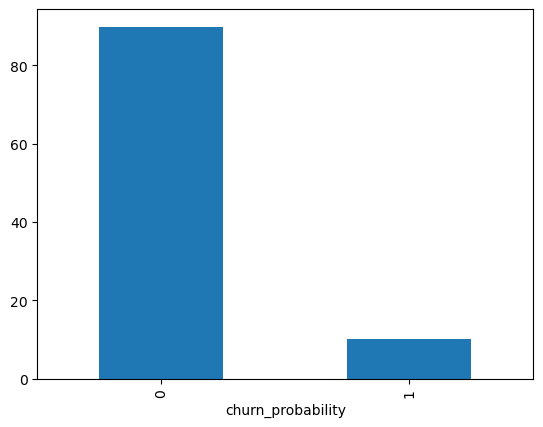

In [398]:
## Visualizing the Churn to Non Churn ratio
print((telecomData['churn_probability'].value_counts()/ len(telecomData)) * 100)
((telecomData['churn_probability'].value_counts()/len(telecomData))*100).plot(kind='bar')
plt.show()

#### EDA based on the numerical columns

In [399]:
## Extract numerical columns
df_num = telecomData.select_dtypes(include=['int64', 'float64'])
df_num.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  monthly_3g_7  monthly_3g_8  \
0         32.24         96.68          2.33  ...             0             0   
1          0.00         25.99         30.89  ...             1             0   
2         53.99         82.05          0.00  ...             0             0   
3         68.76         78.48         50.23  ...             0             0   
4         56.99         38.11          9.63  ...             0             0   

   sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  \
0            0            0            0  1958         0.0         0.0   
1            0            0            0   710         0.0         0.0   
2            0            0            0   882         0.0         0.0   
3            0            0            0   982         0.0         0.0   
4            0            1            0   647         0.0         0.0   

   jun_vbc_3g  churn_probability  
0         0.0                  0  
1         0.0                  0  
2         0.0                  0  
3         0.0                  0  
4         0.0                  0  

[5 rows x 126 columns]

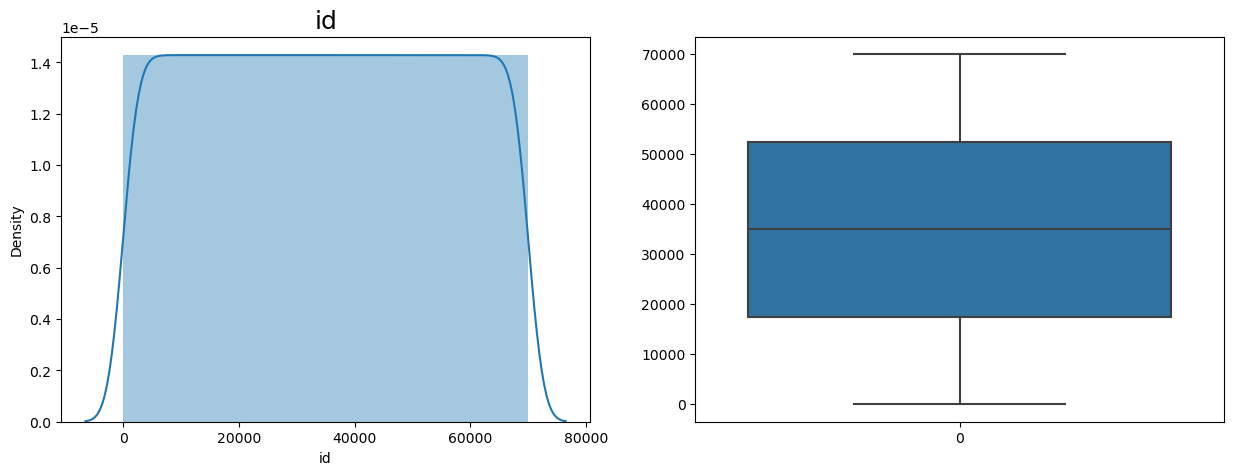

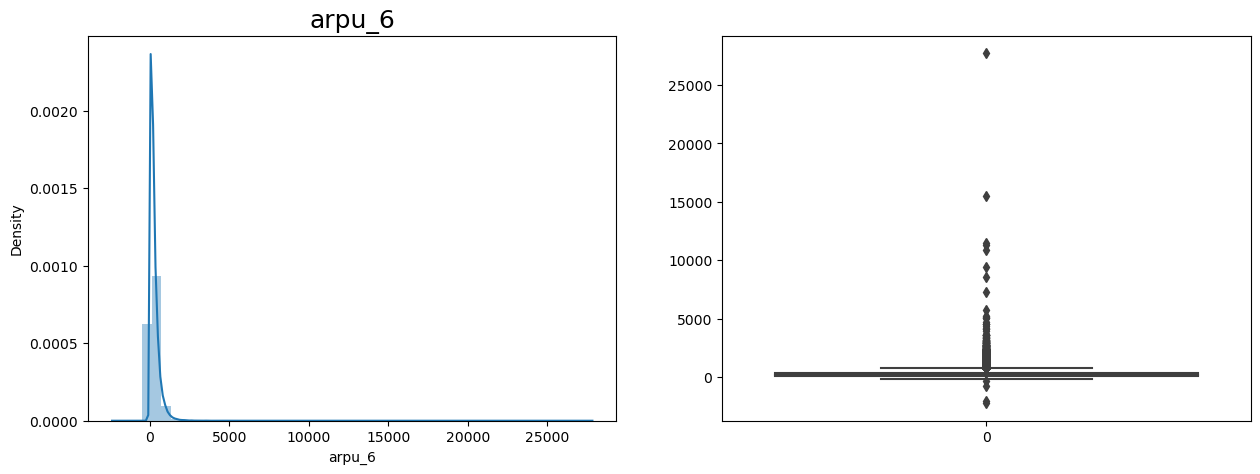

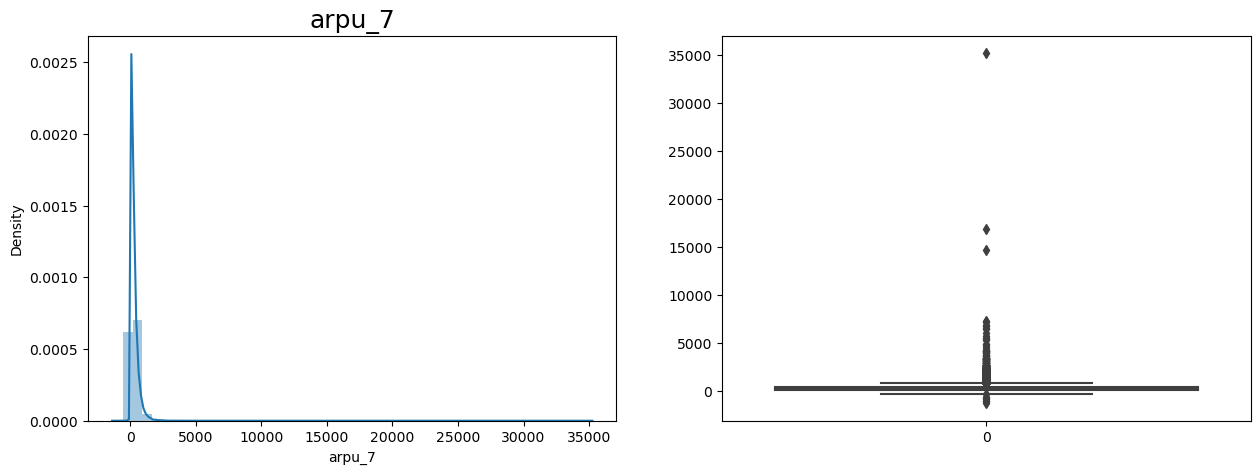

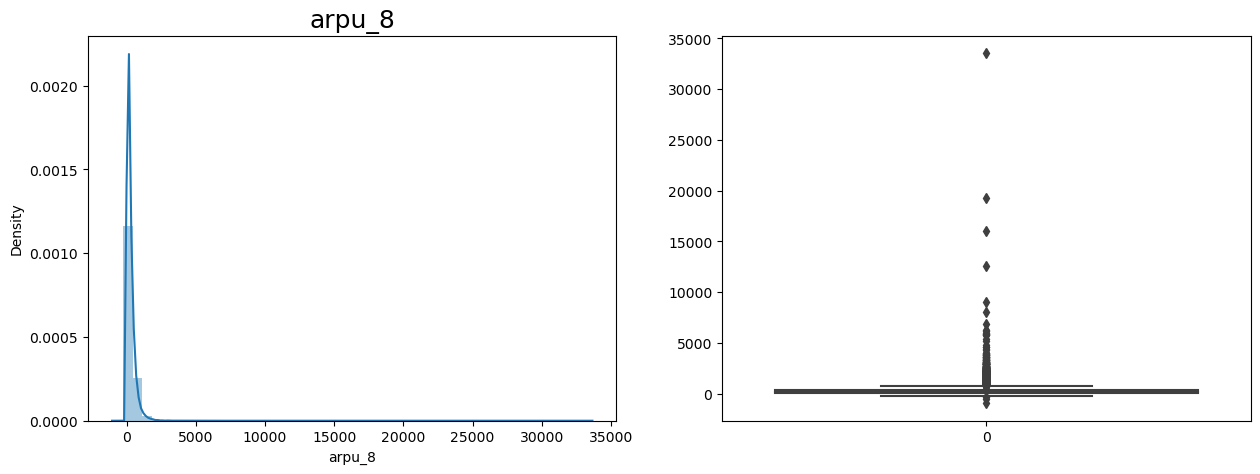

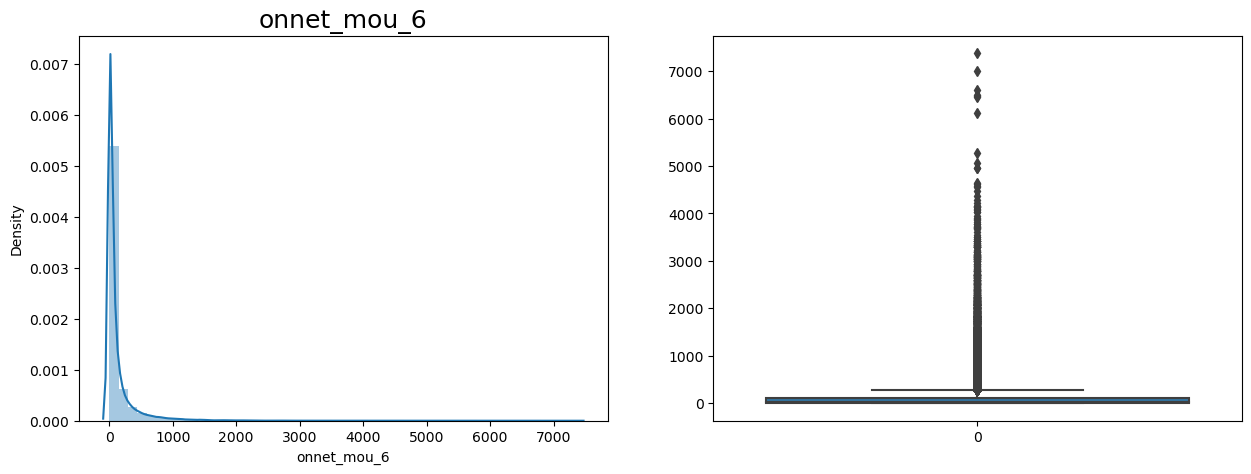

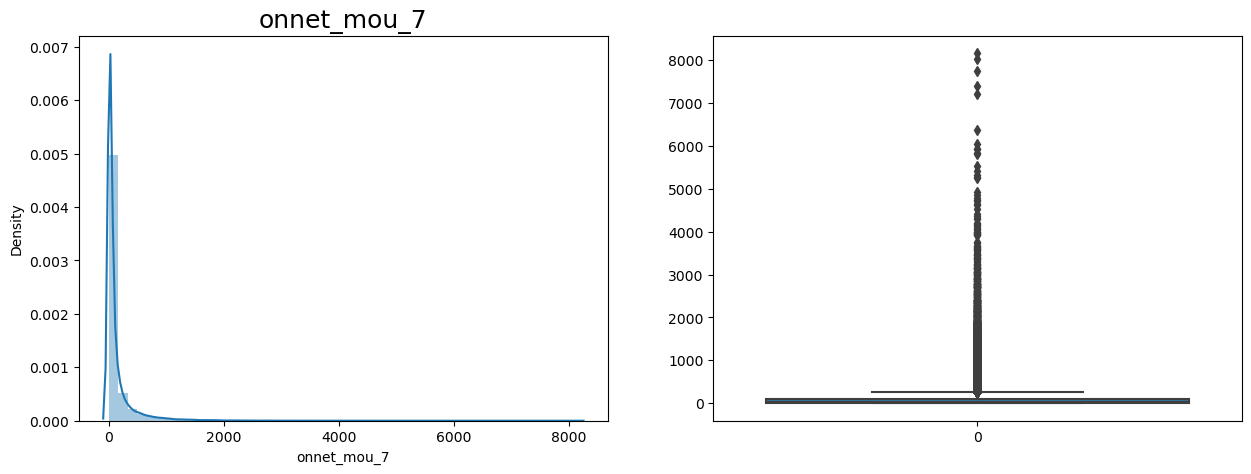

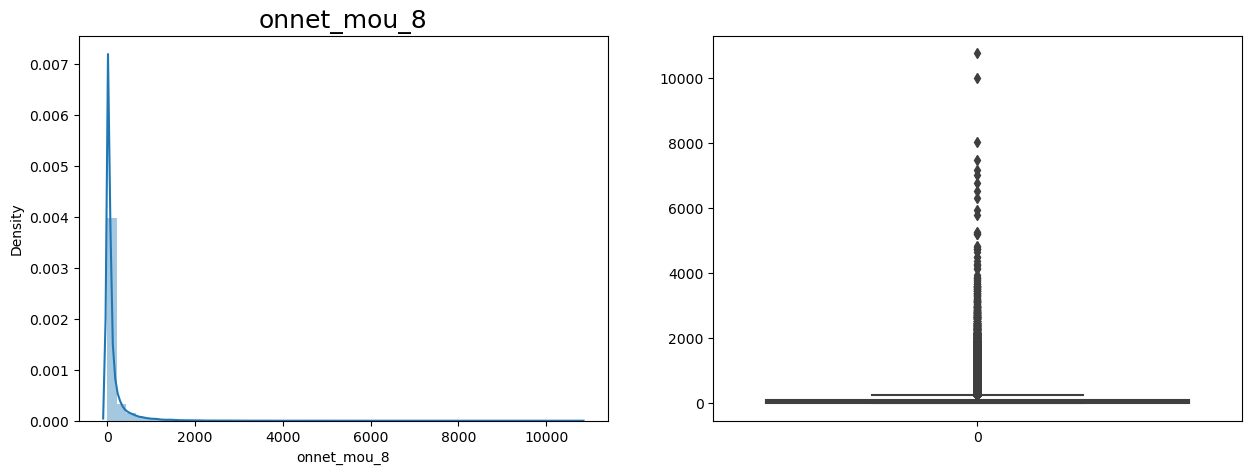

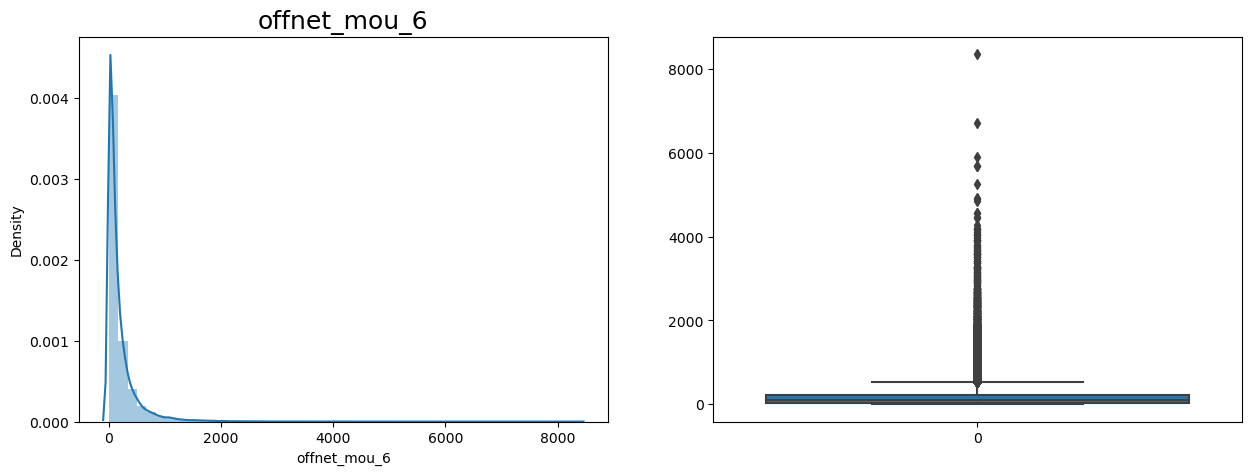

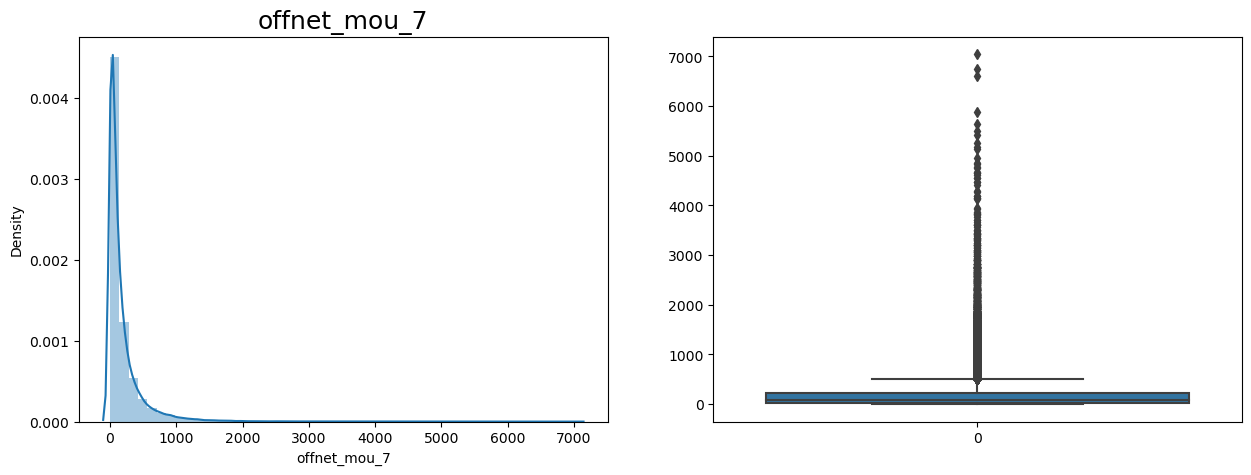

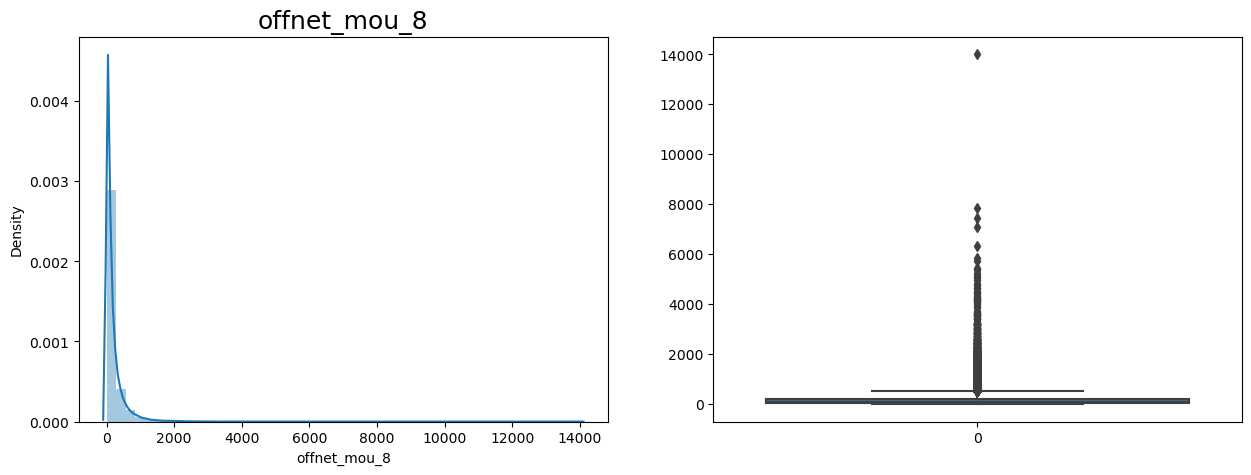

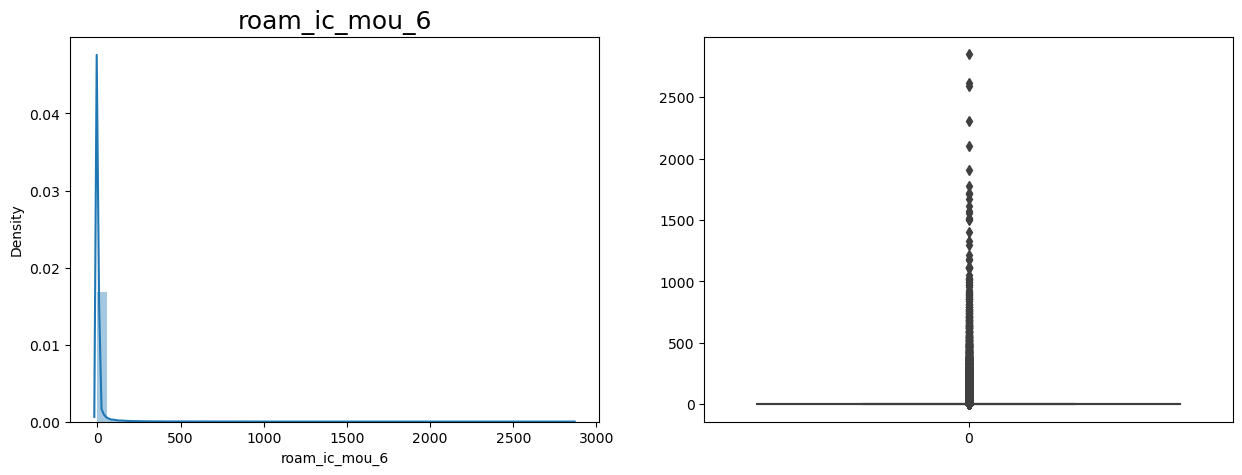

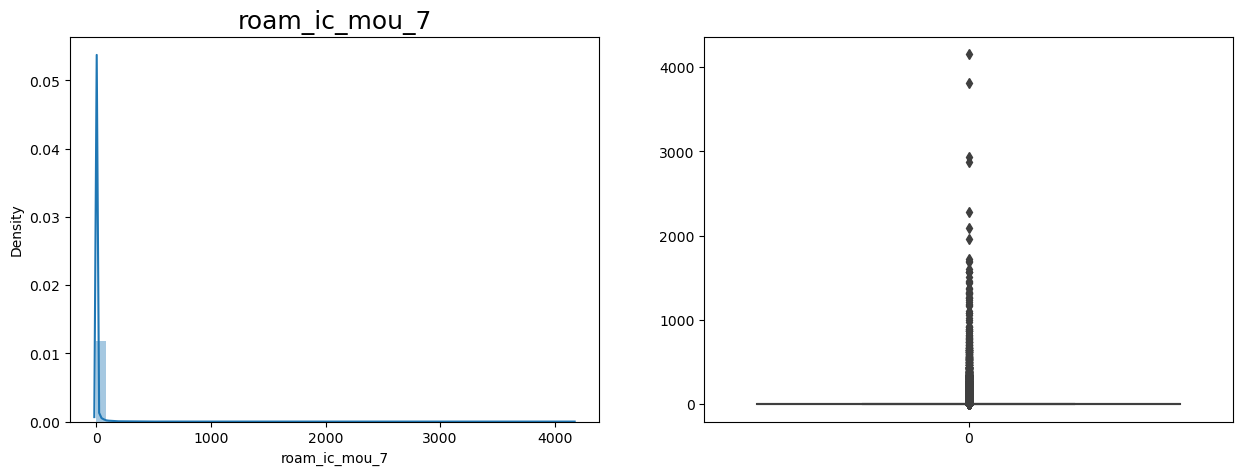

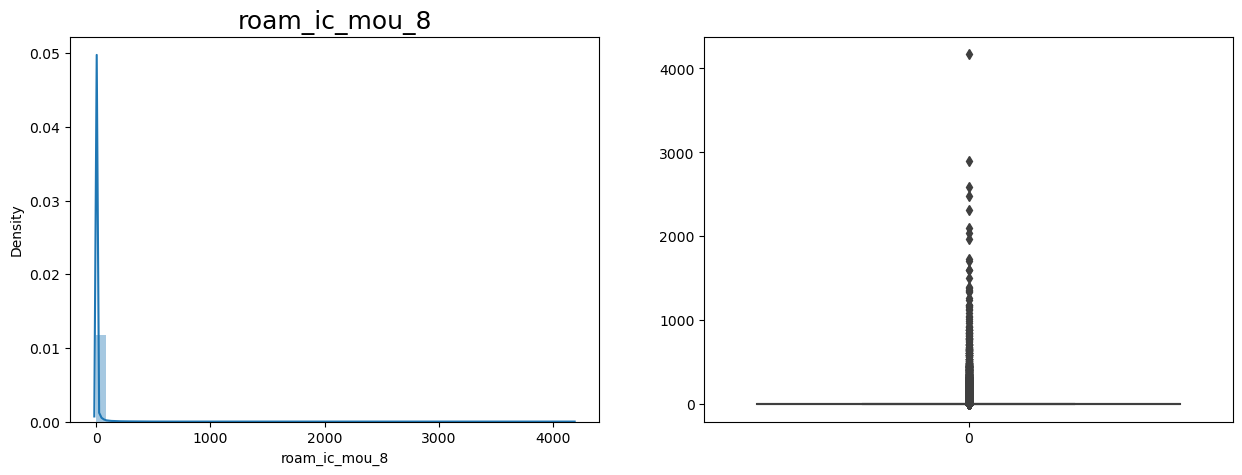

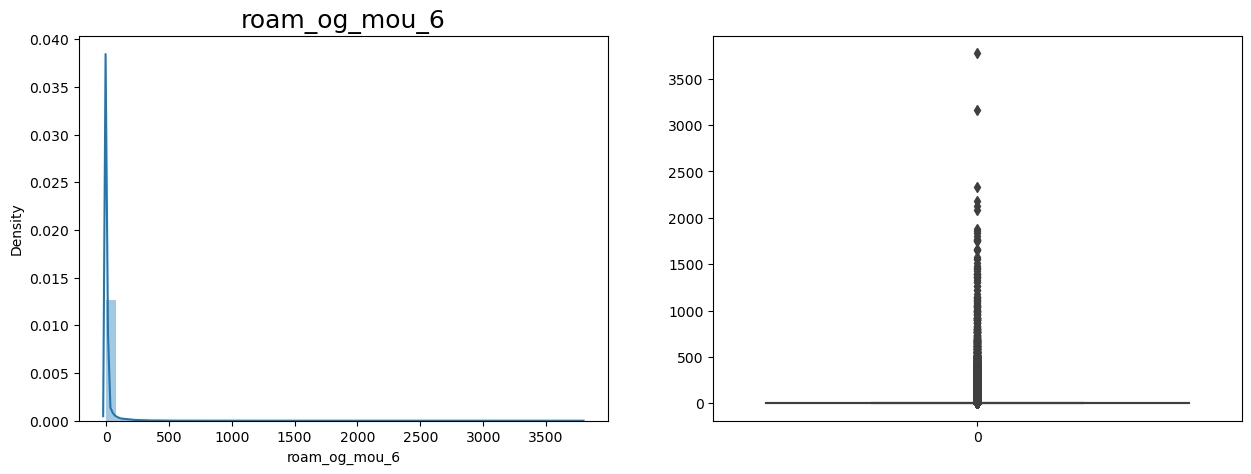

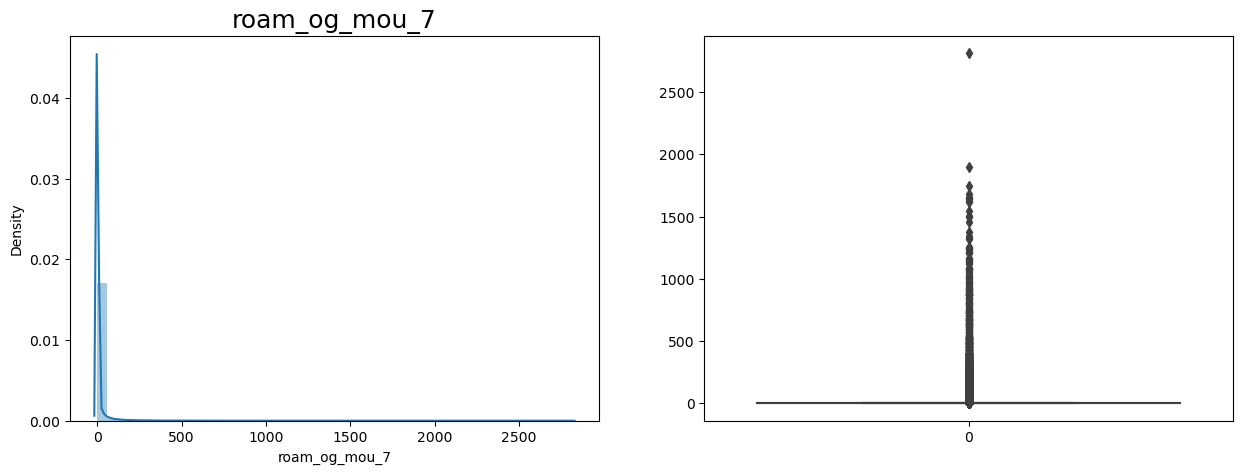

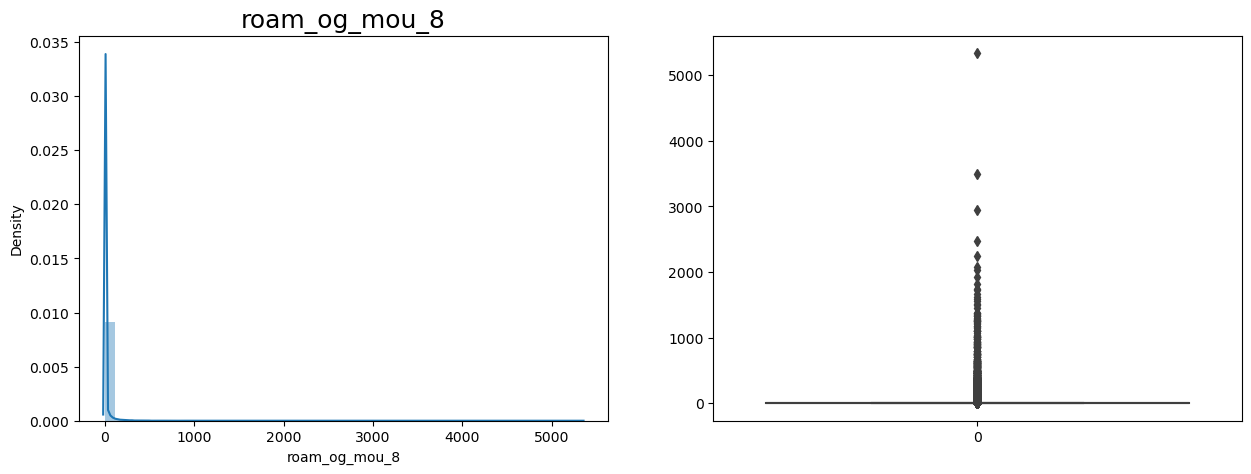

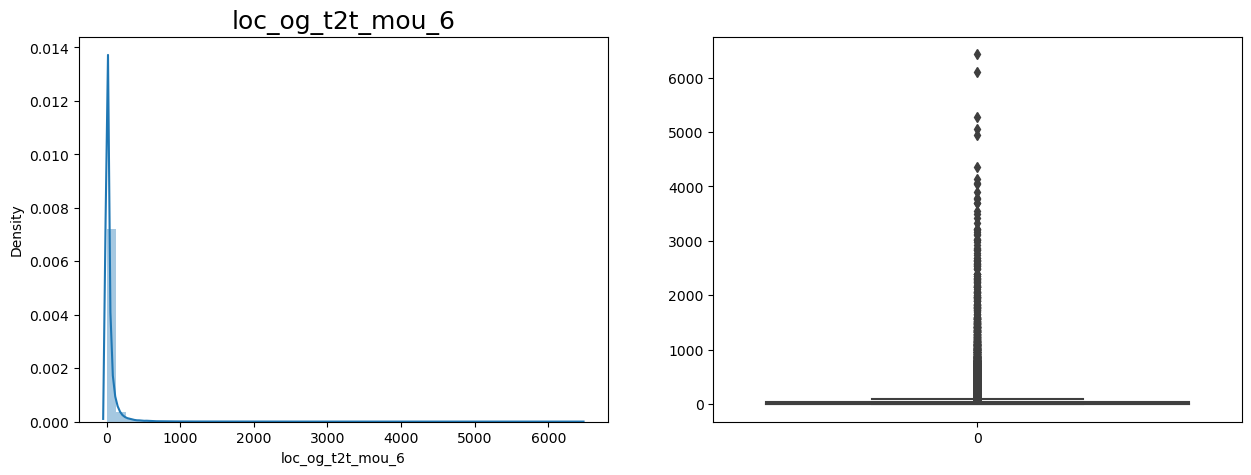

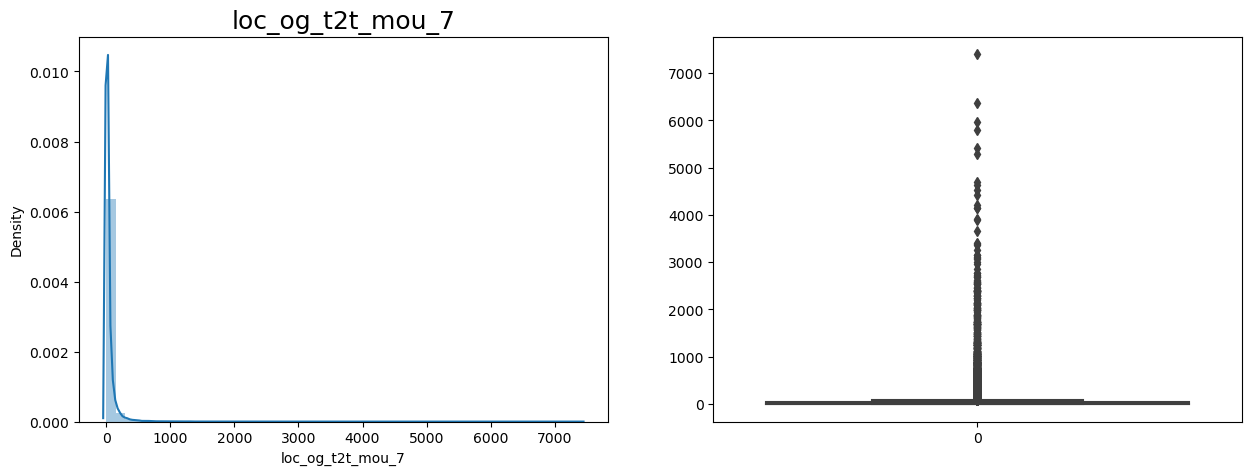

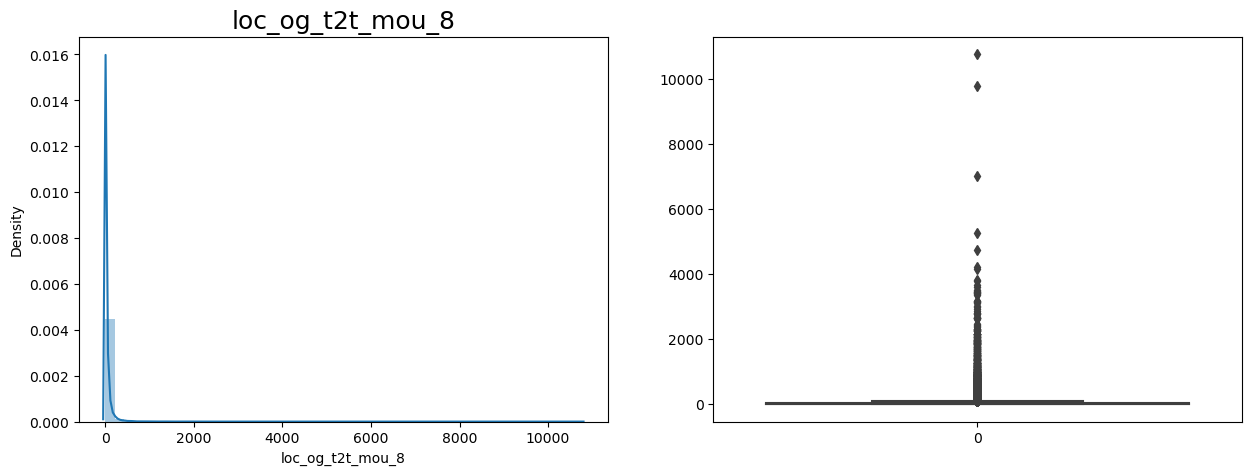

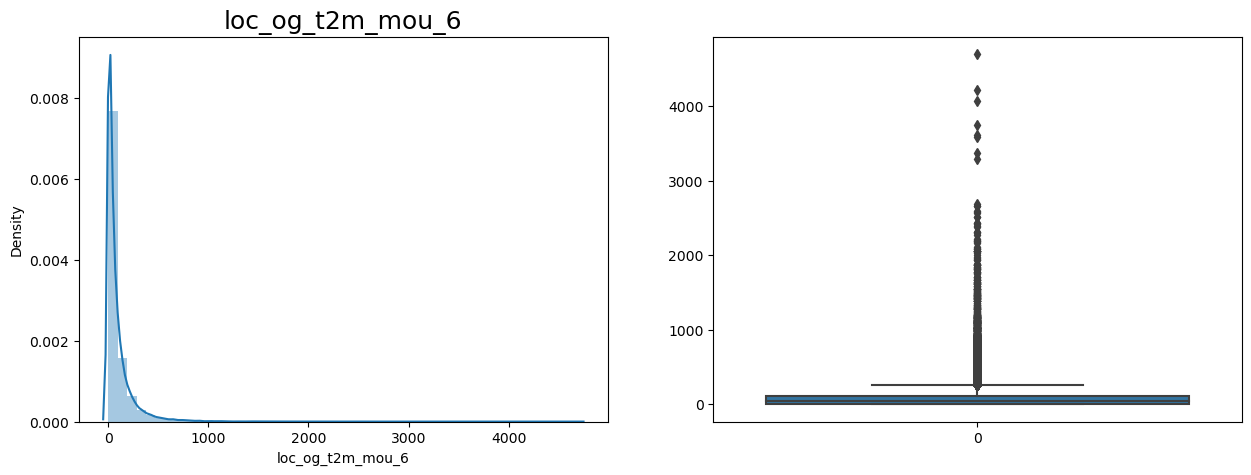

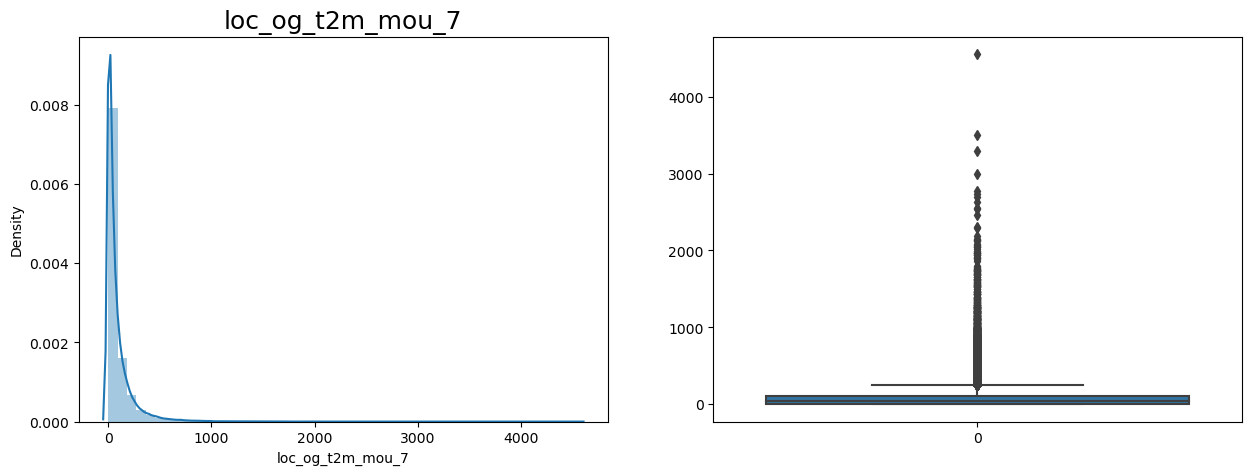

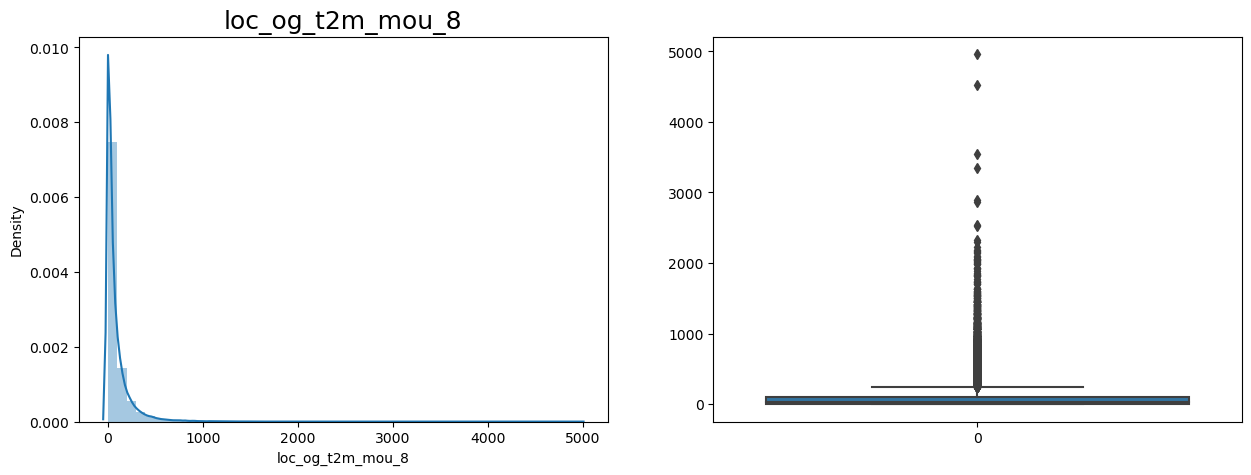

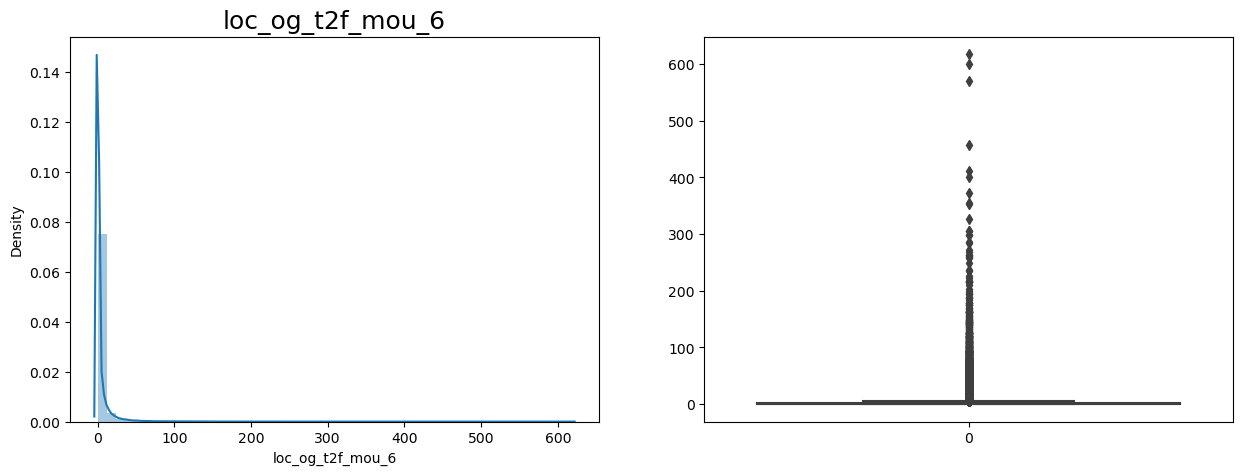

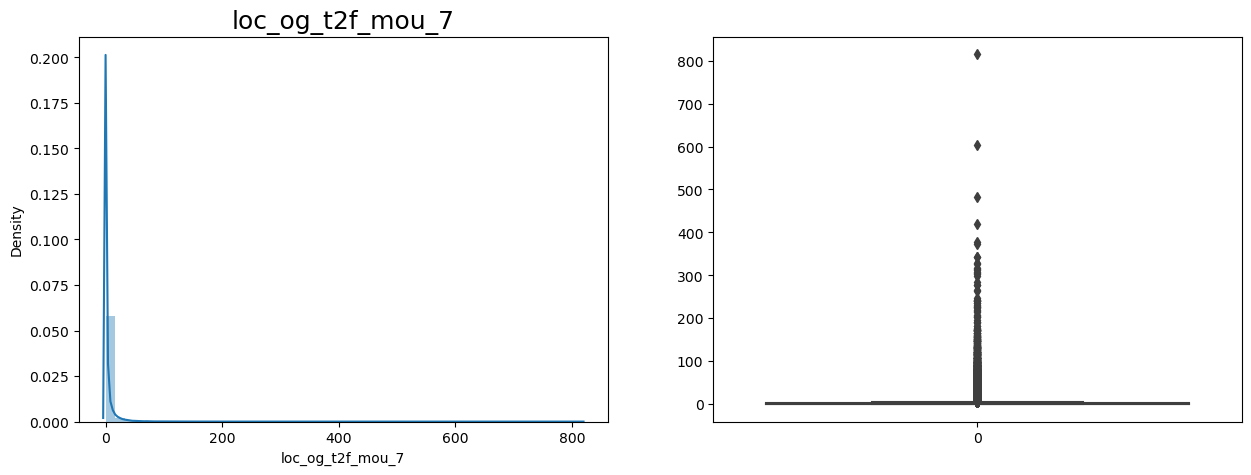

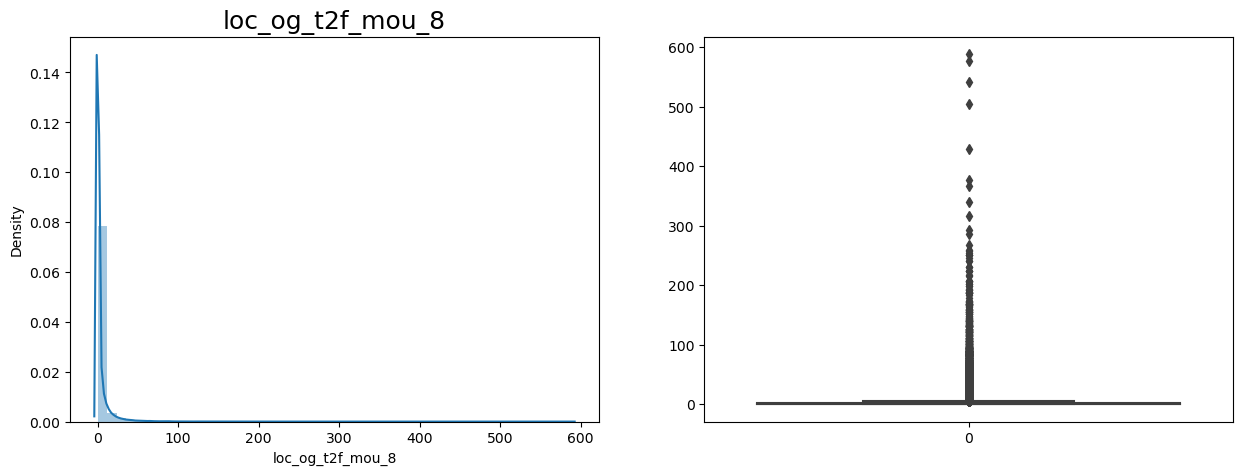

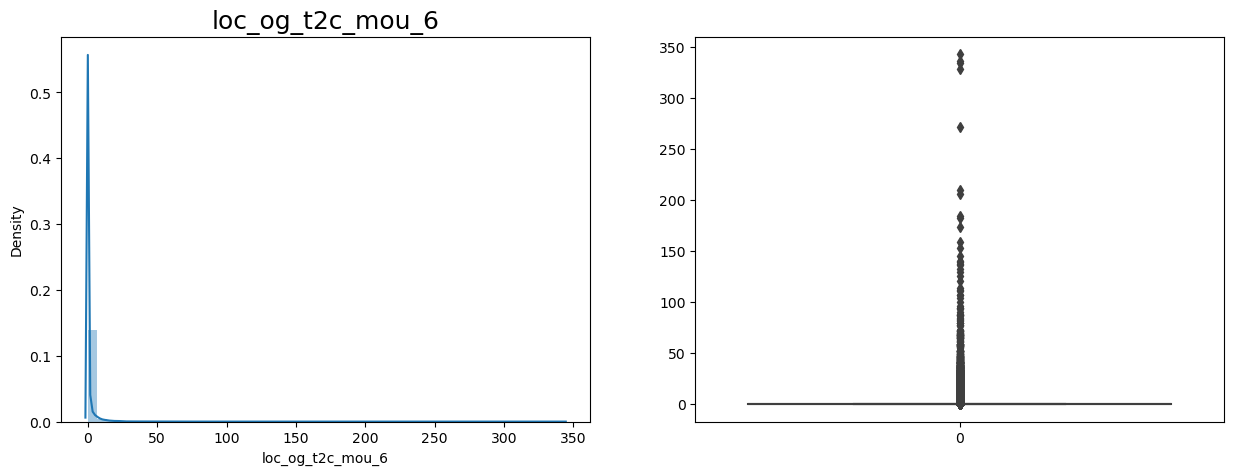

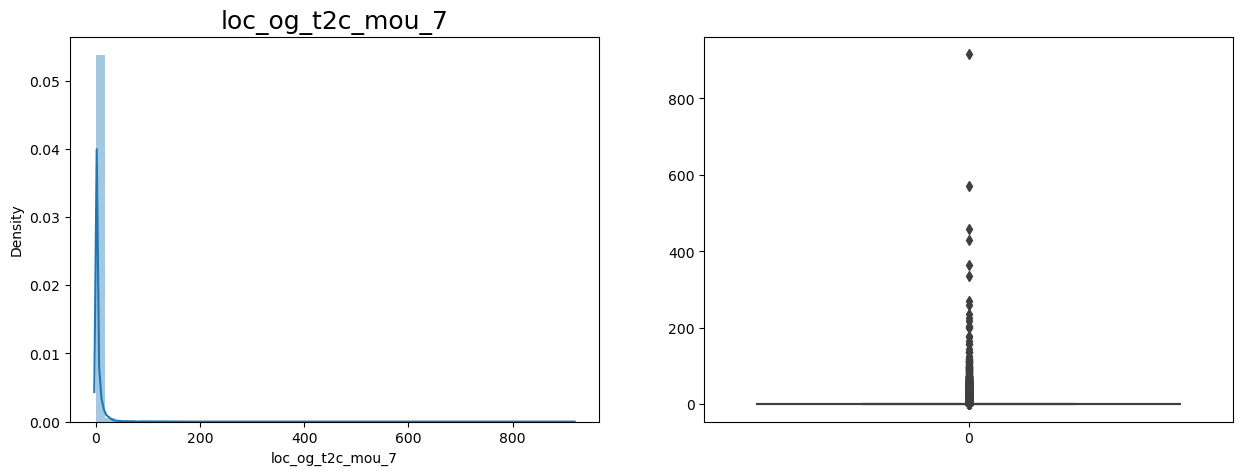

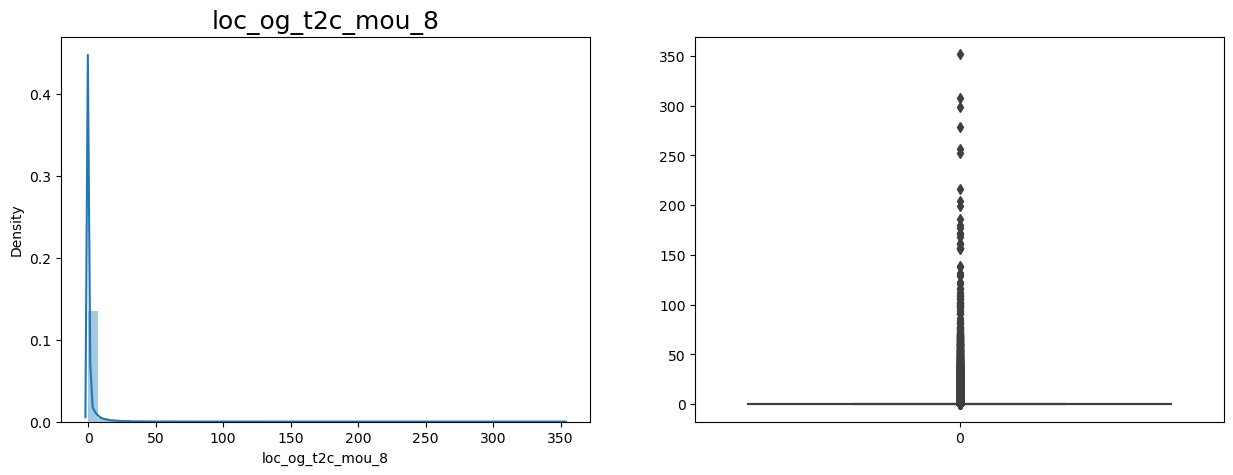

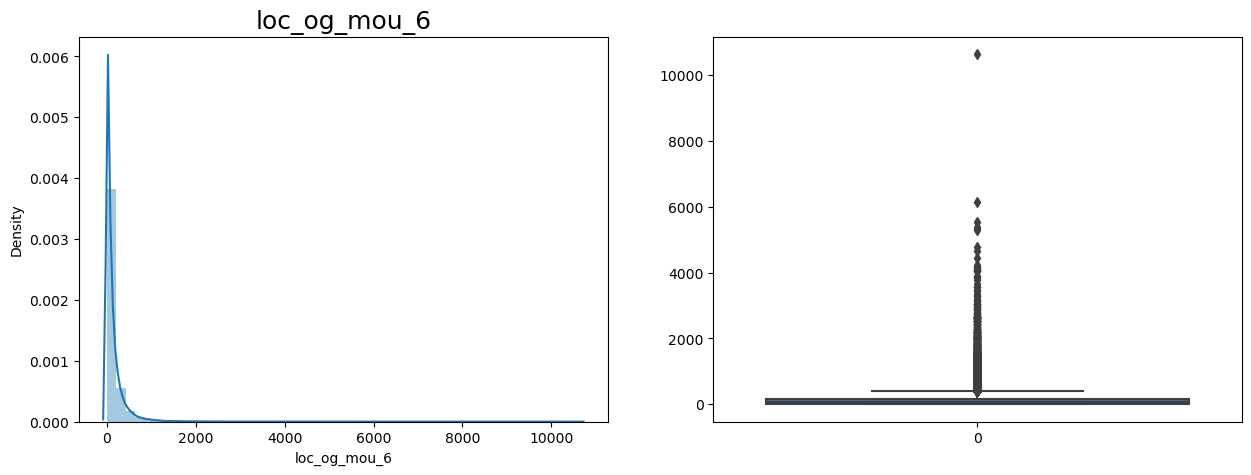

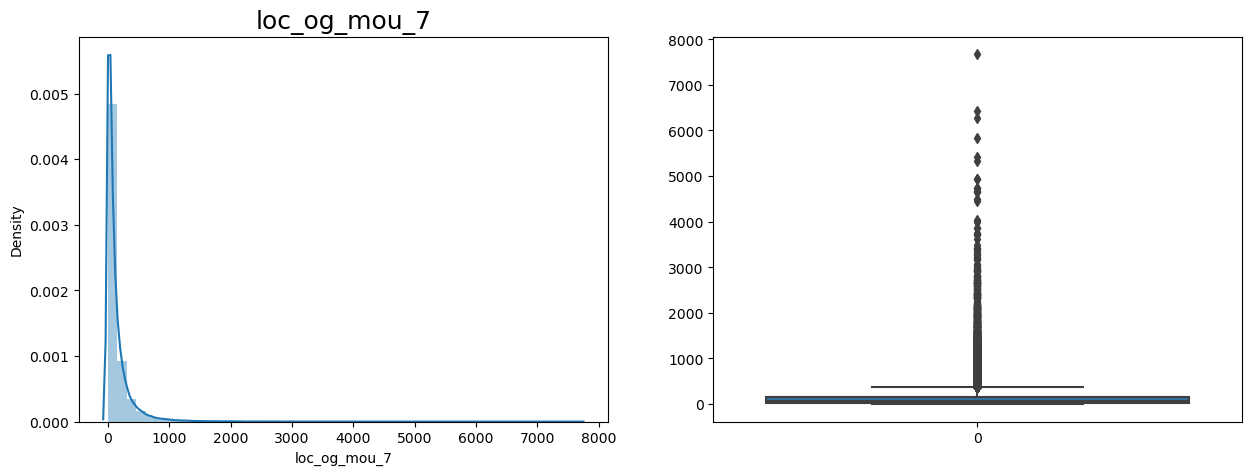

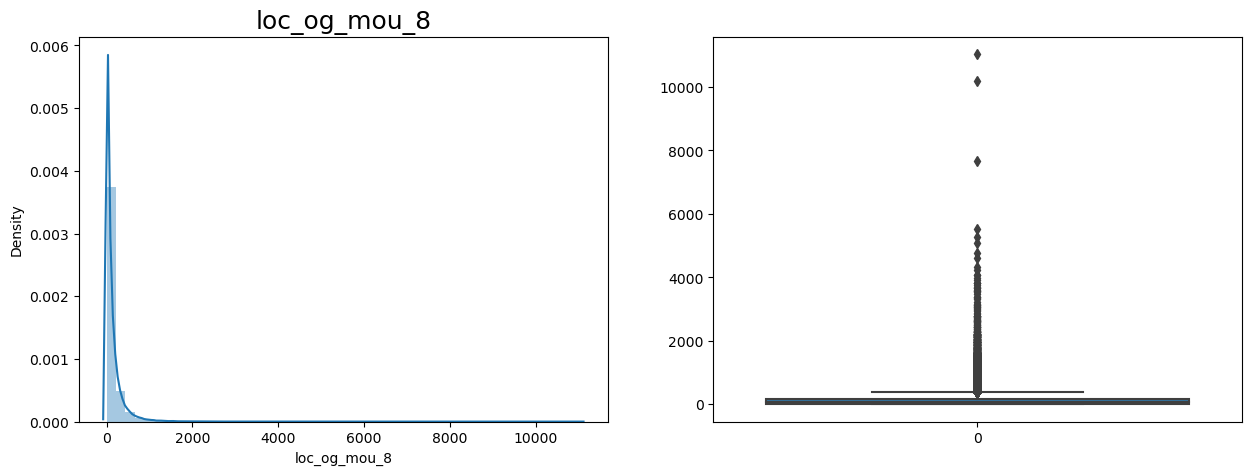

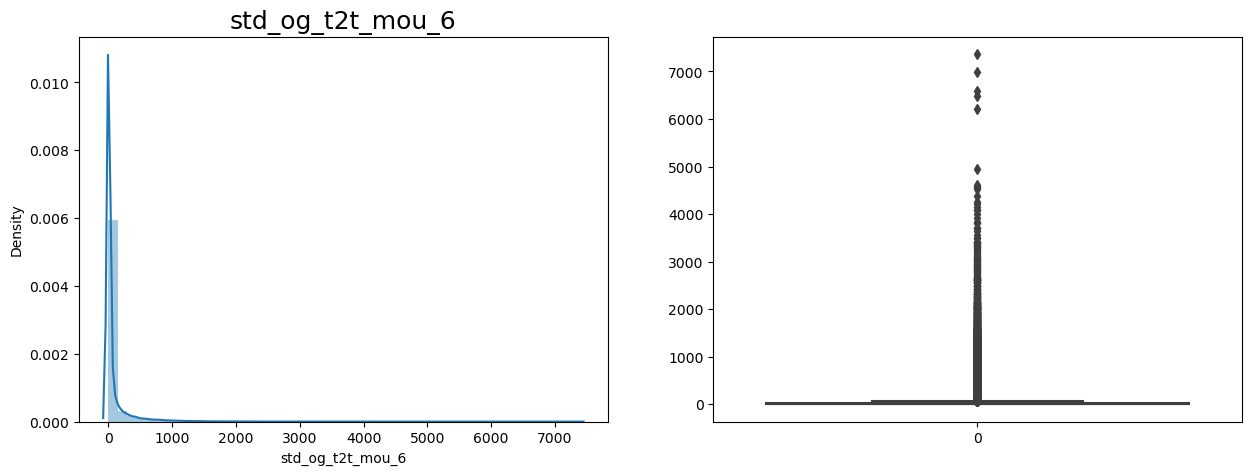

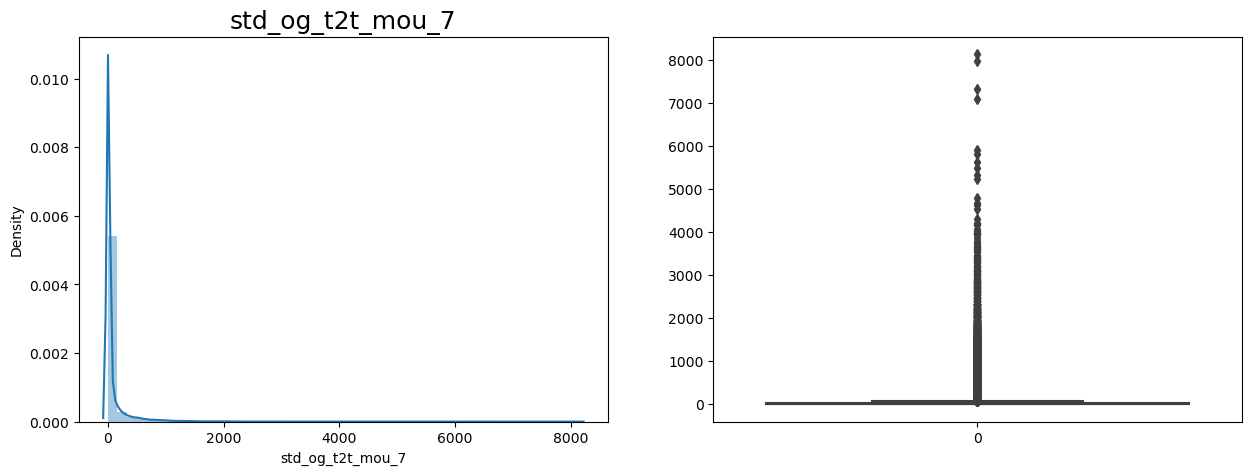

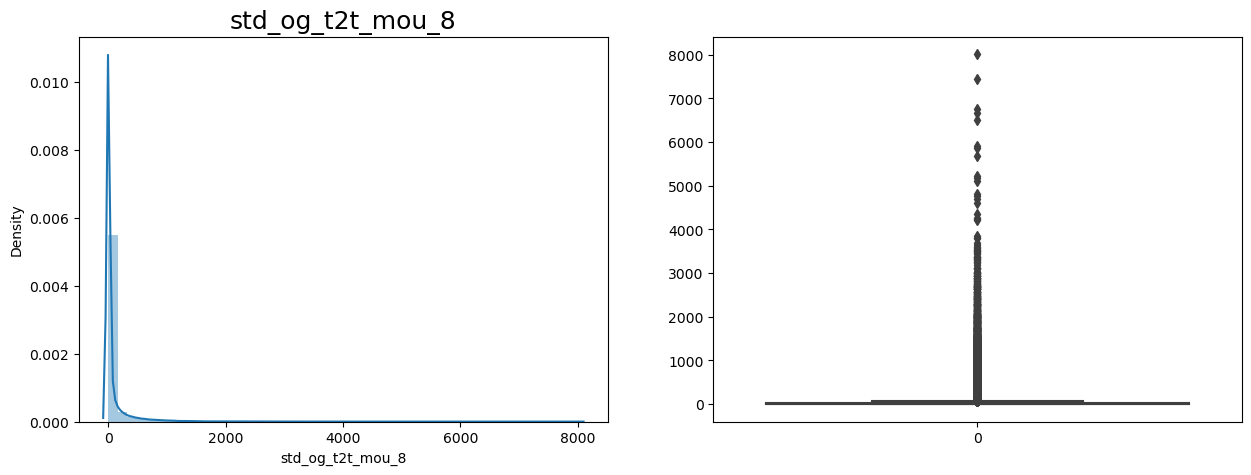

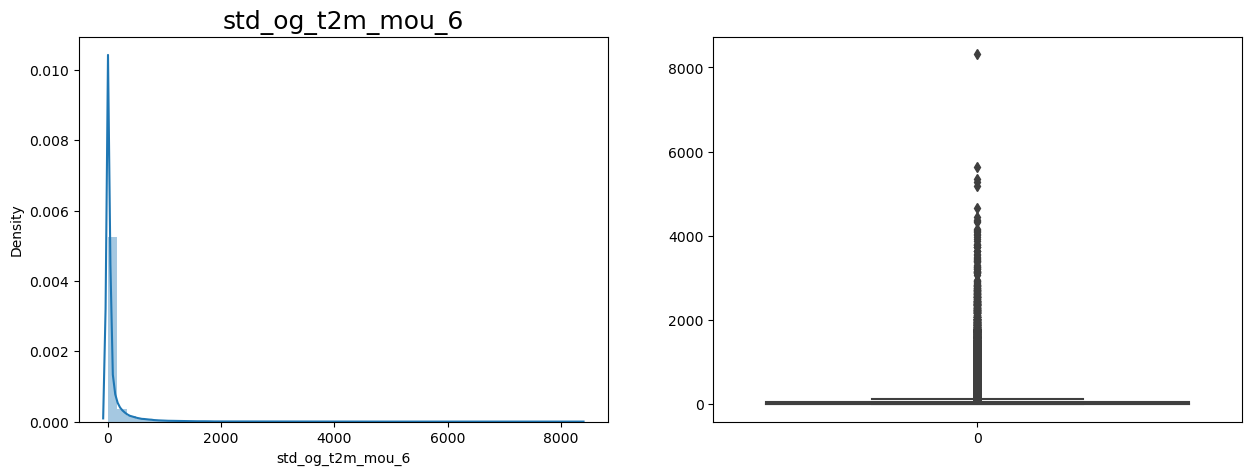

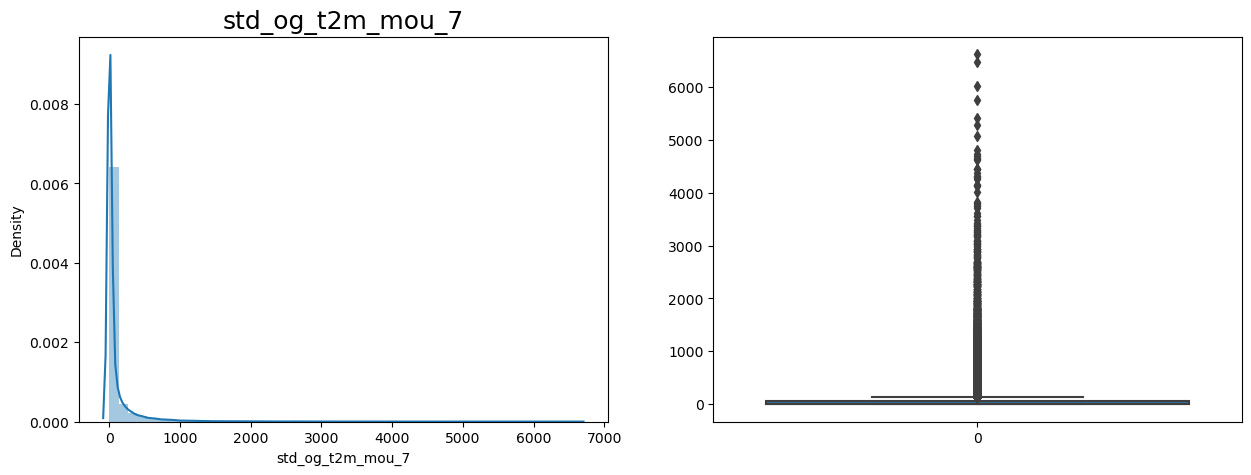

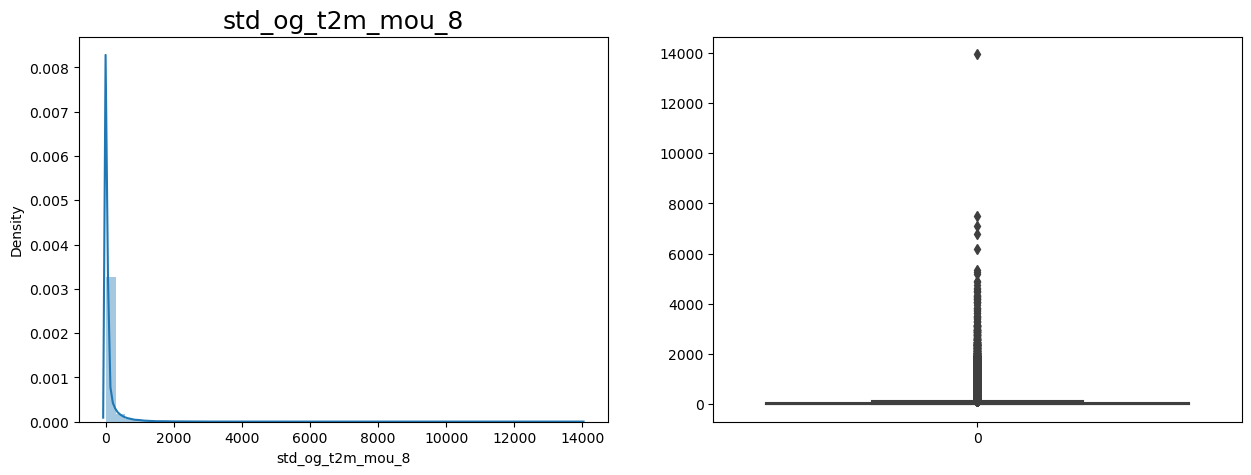

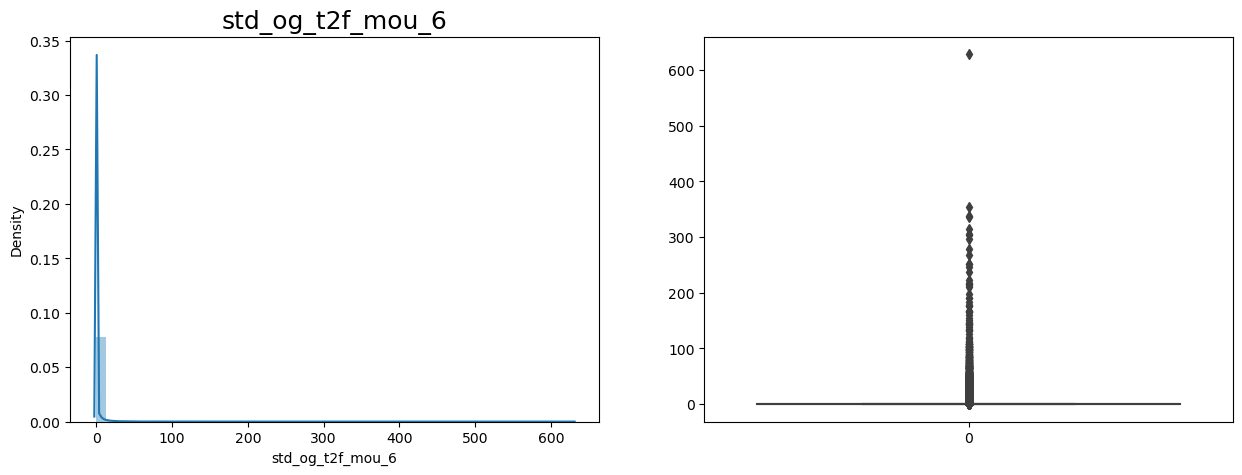

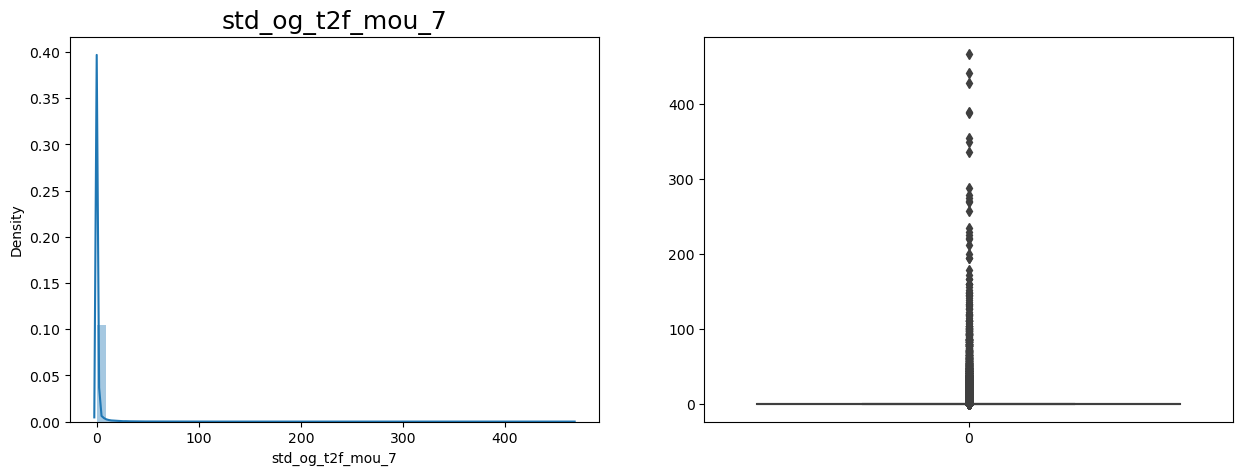

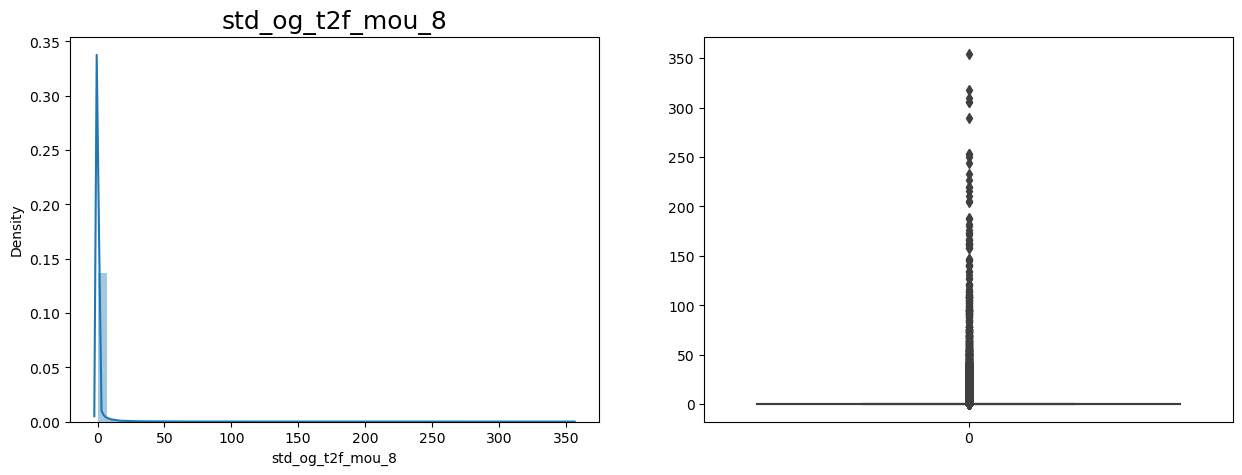

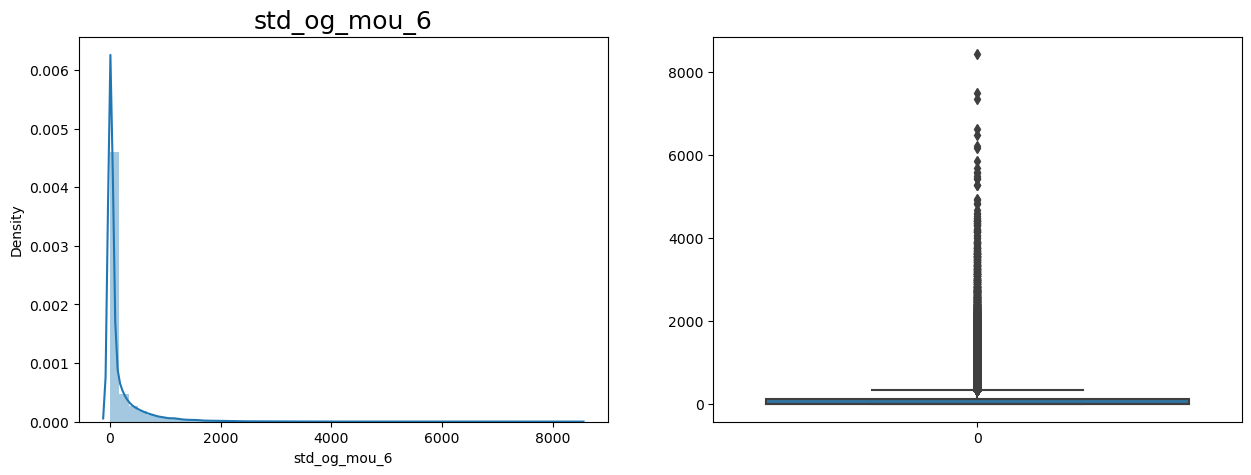

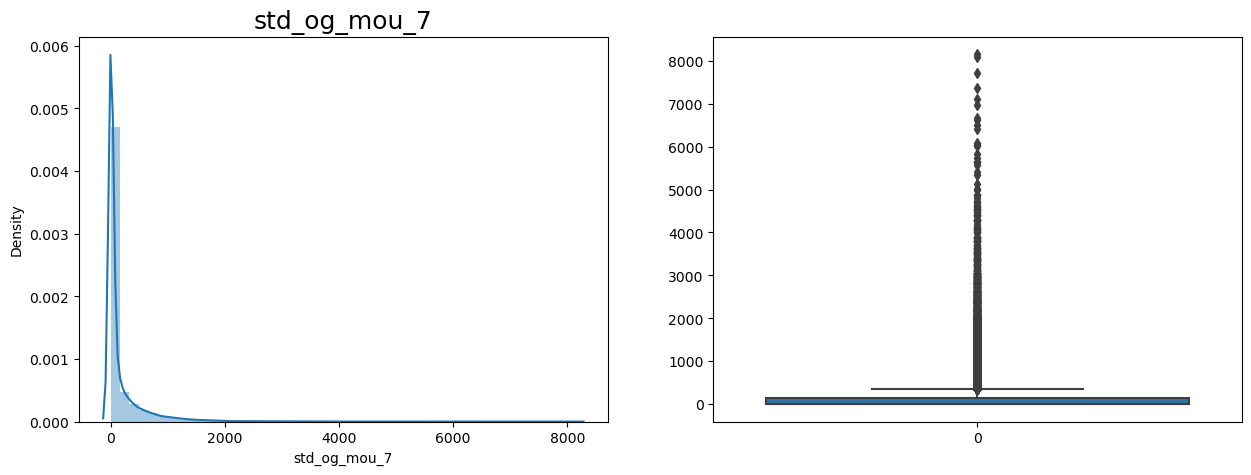

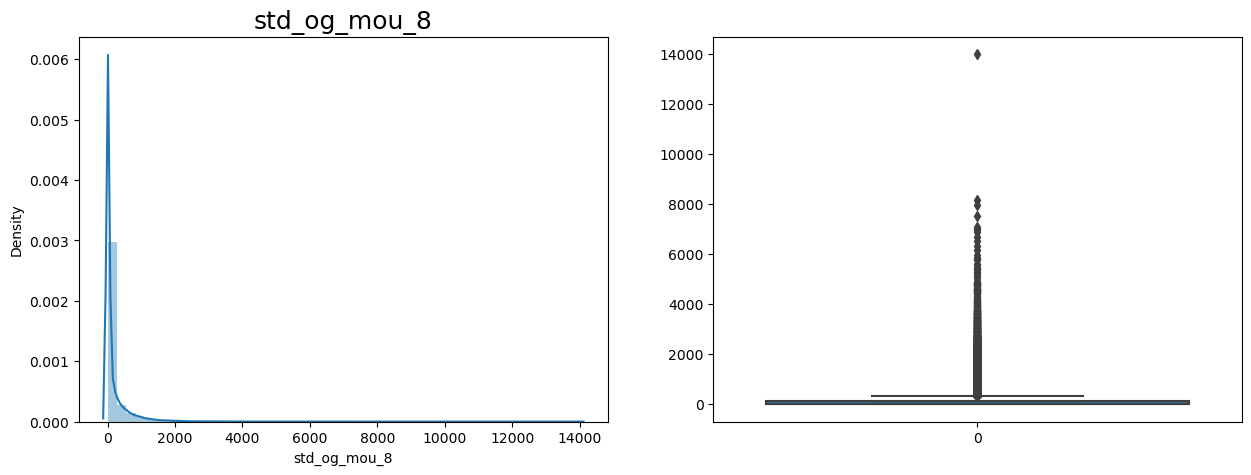

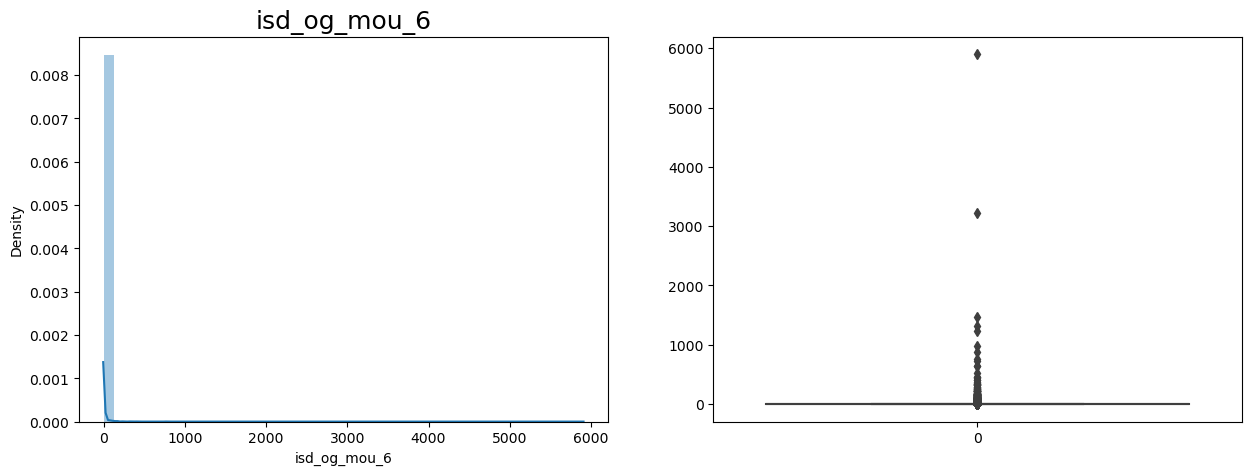

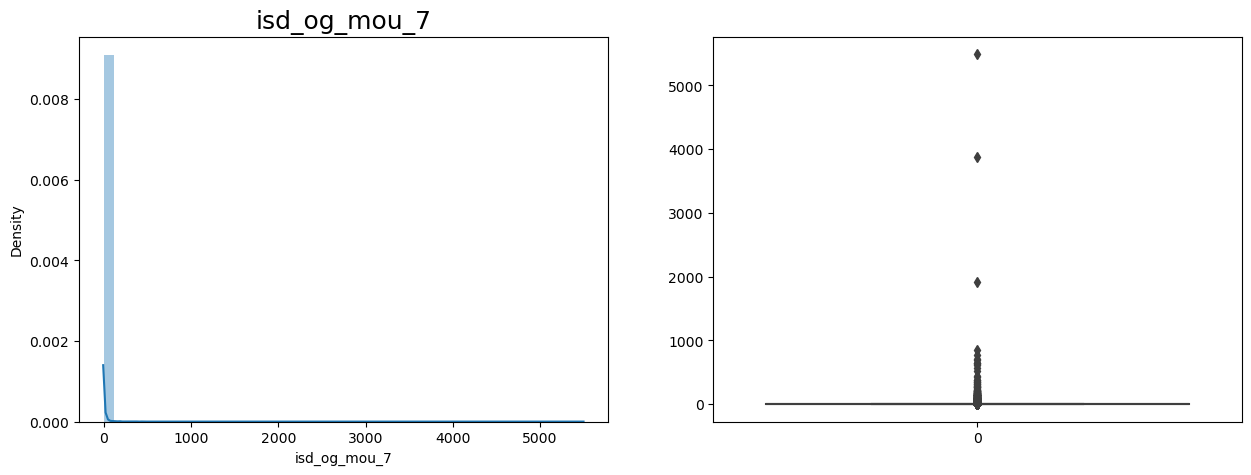

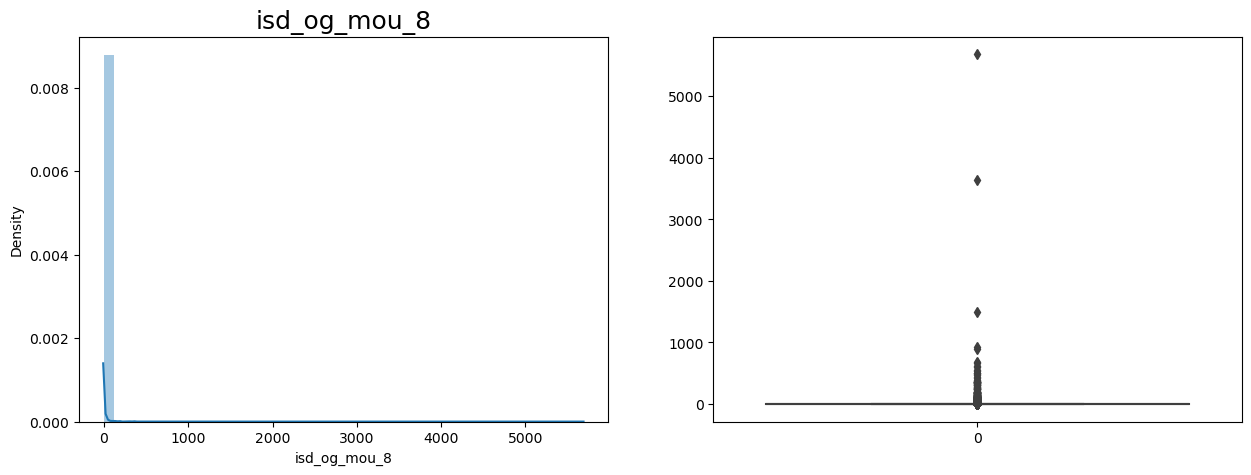

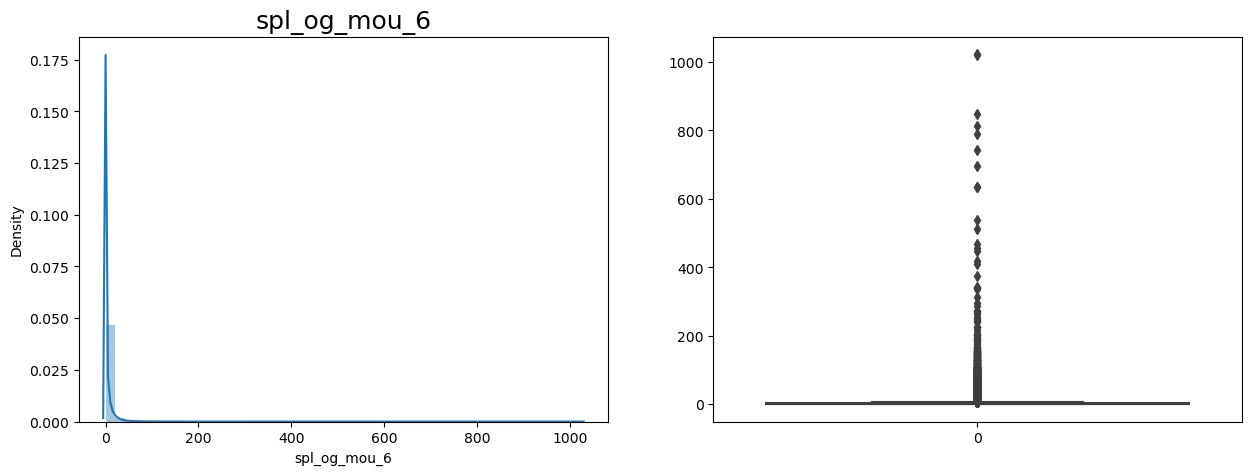

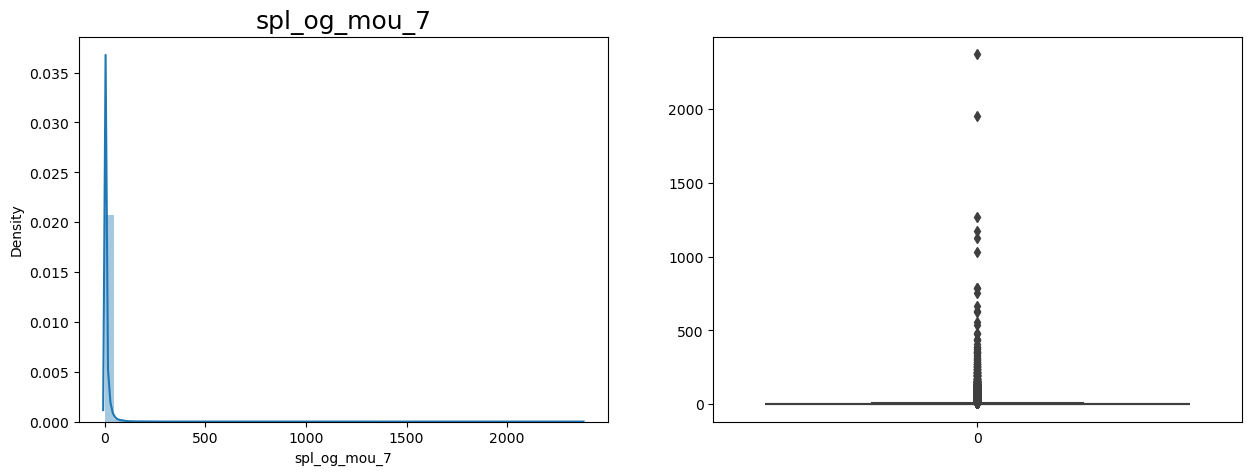

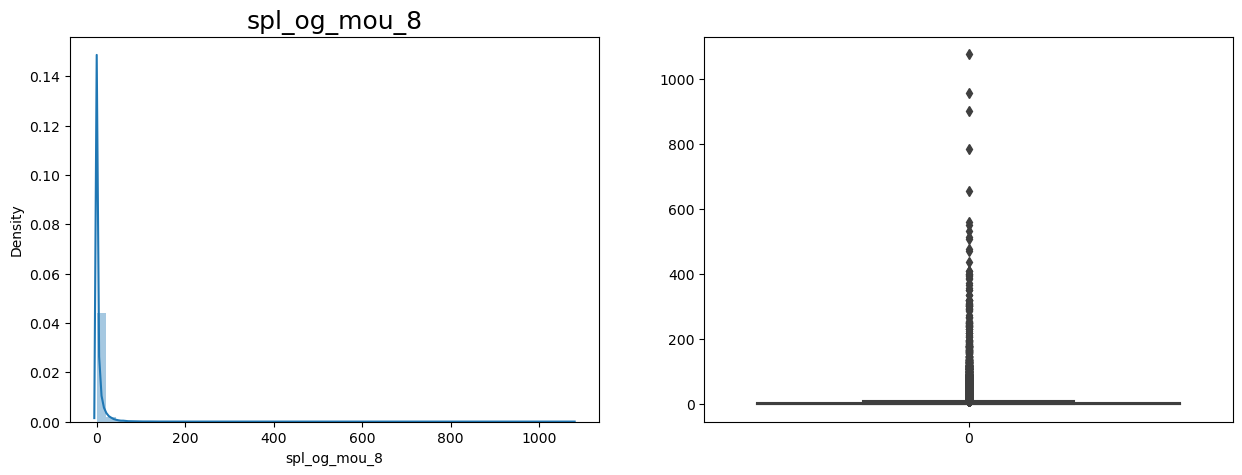

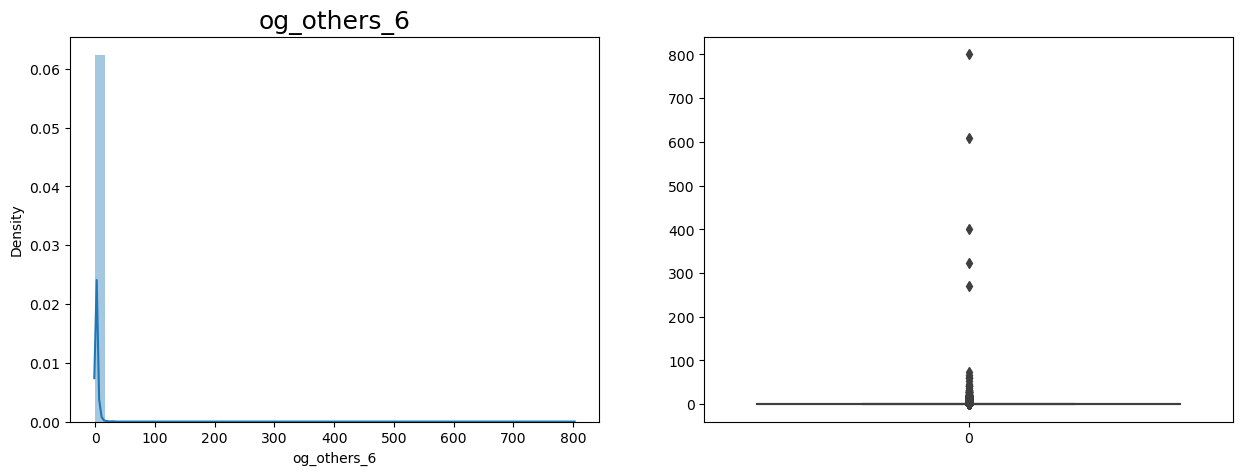

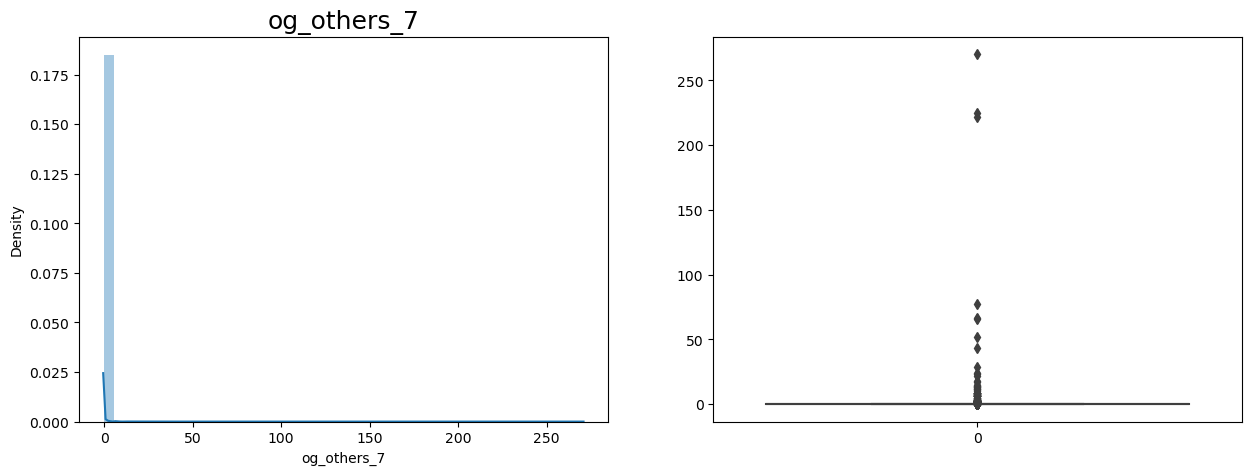

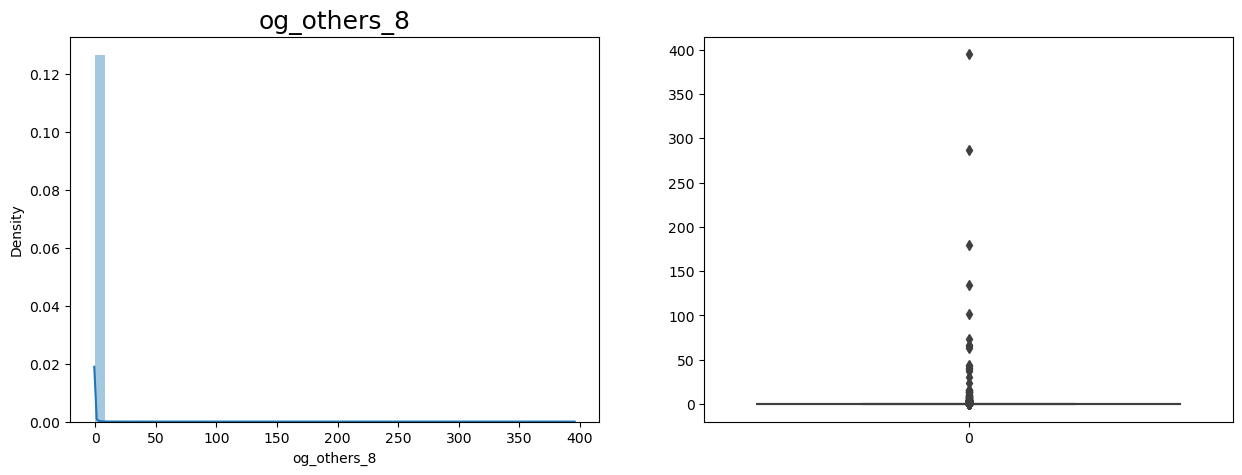

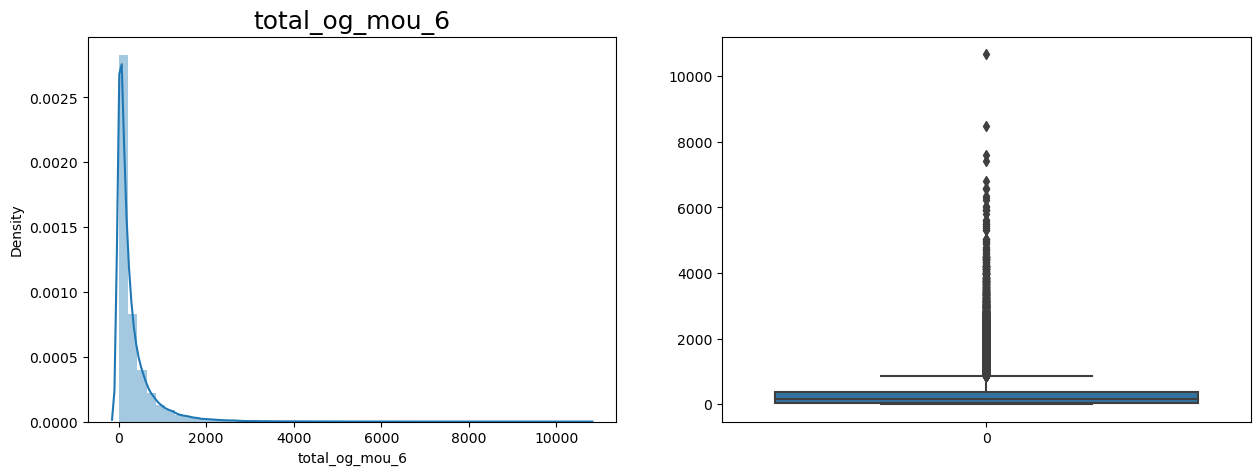

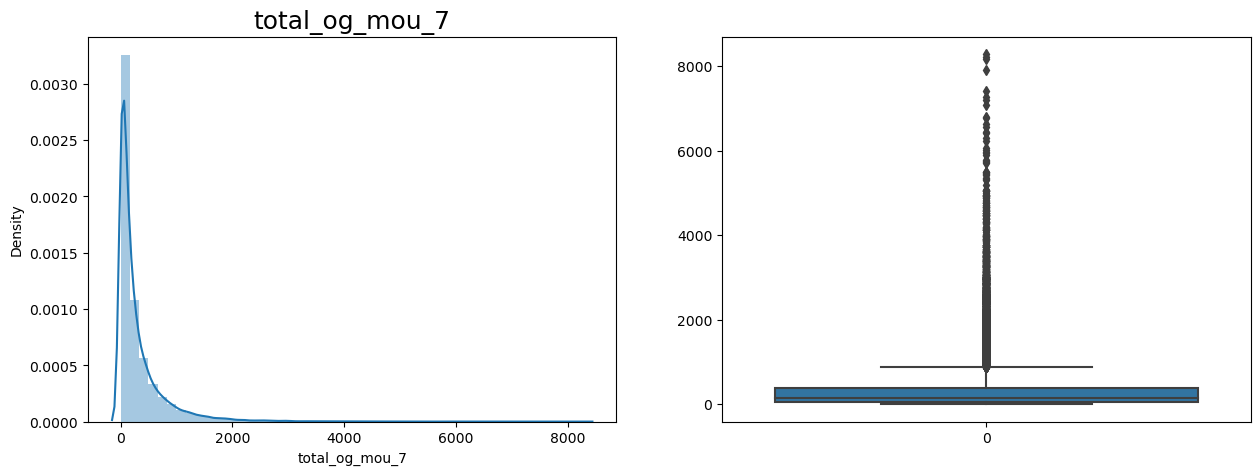

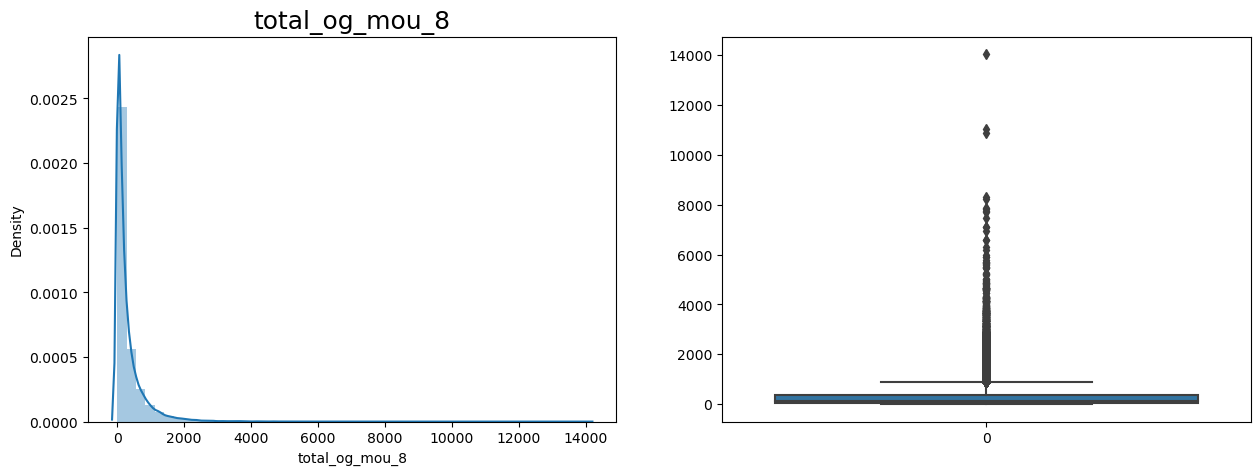

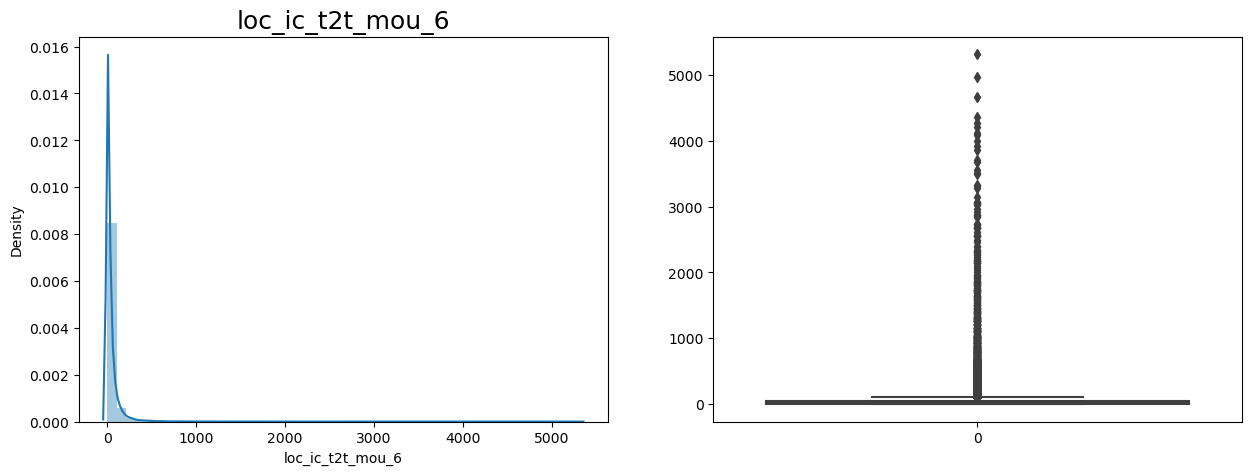

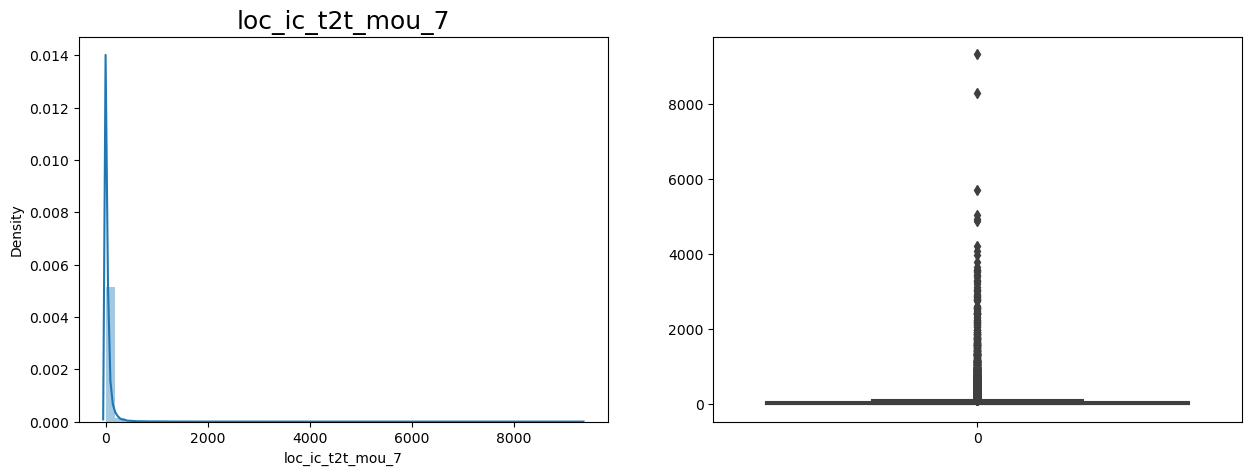

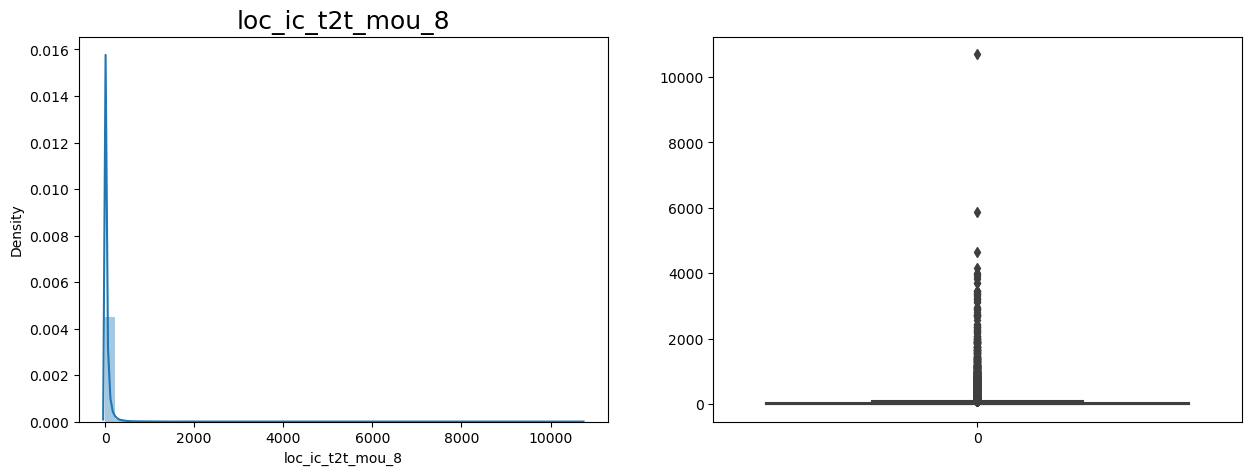

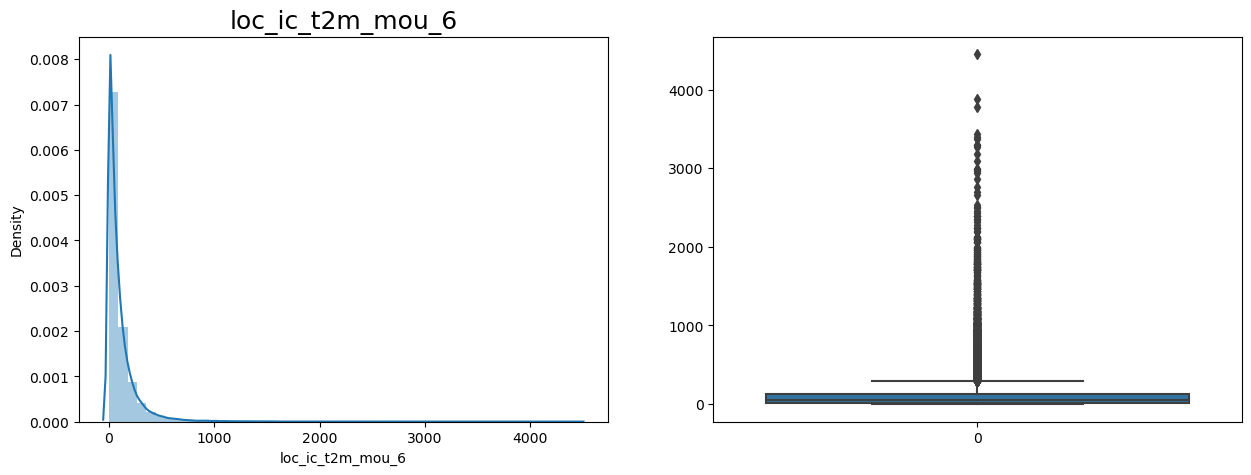

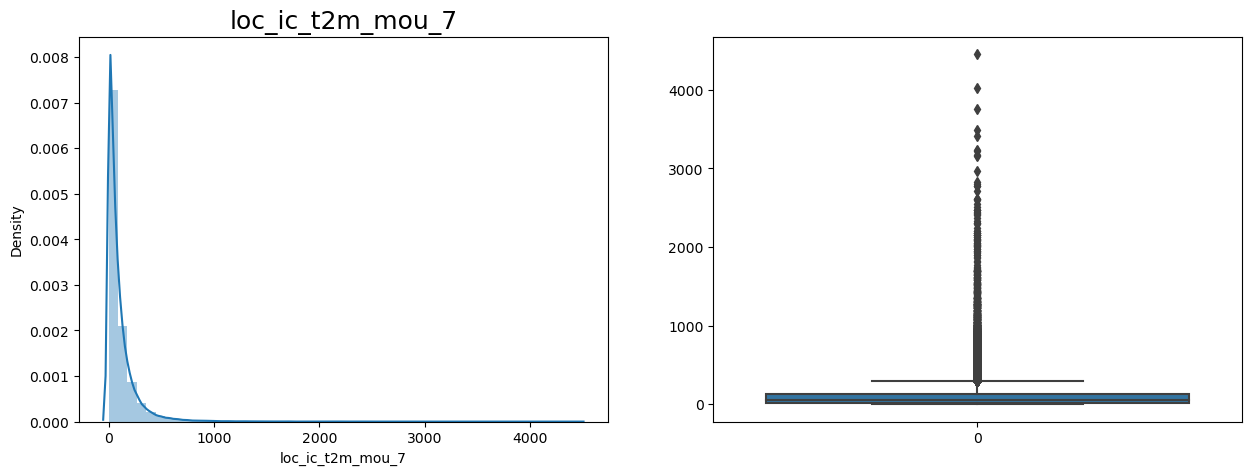

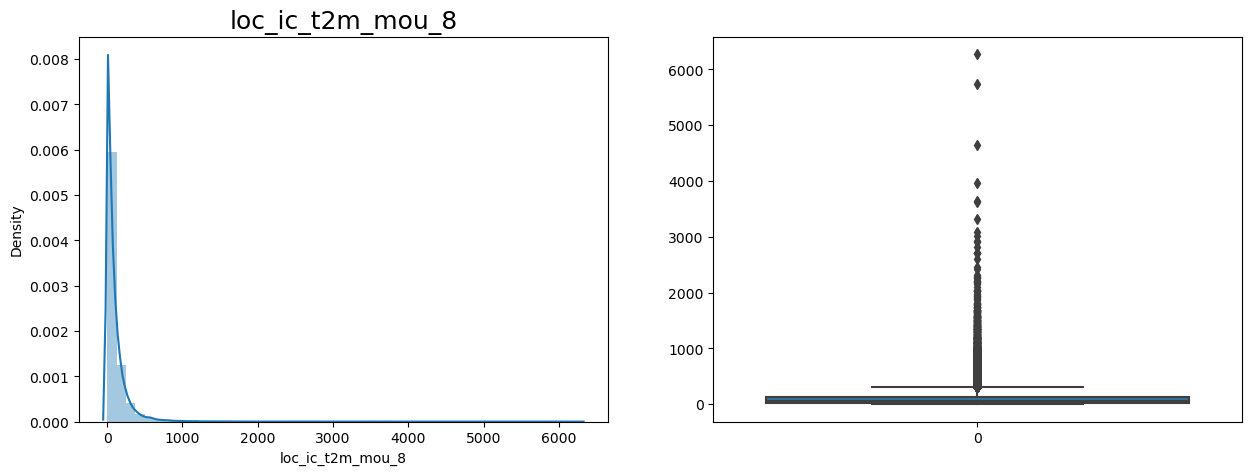

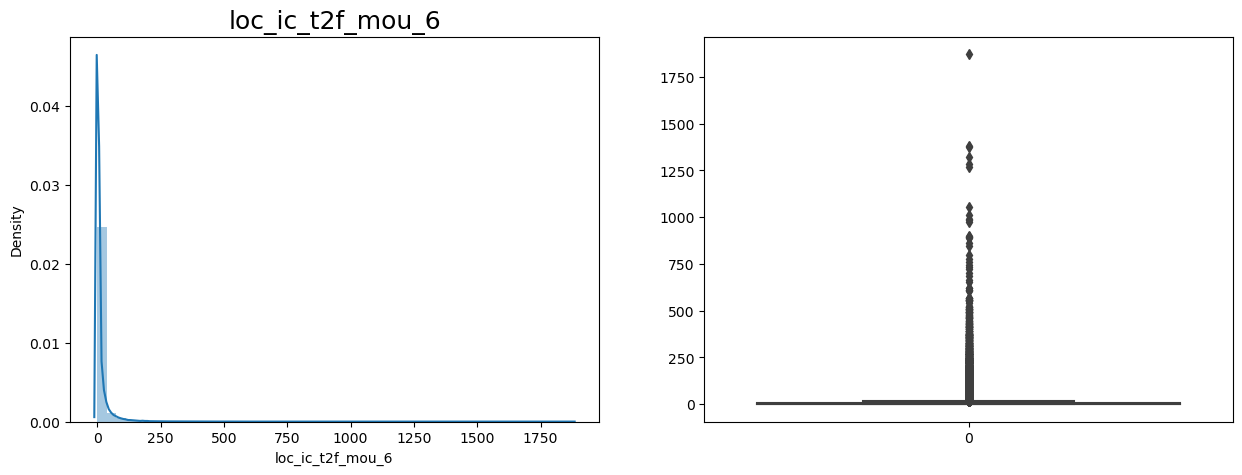

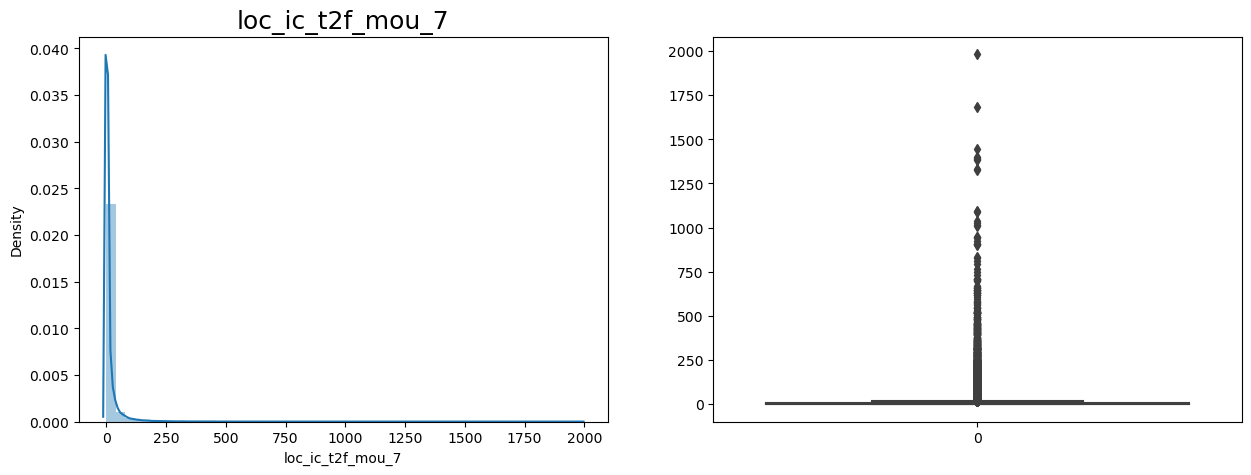

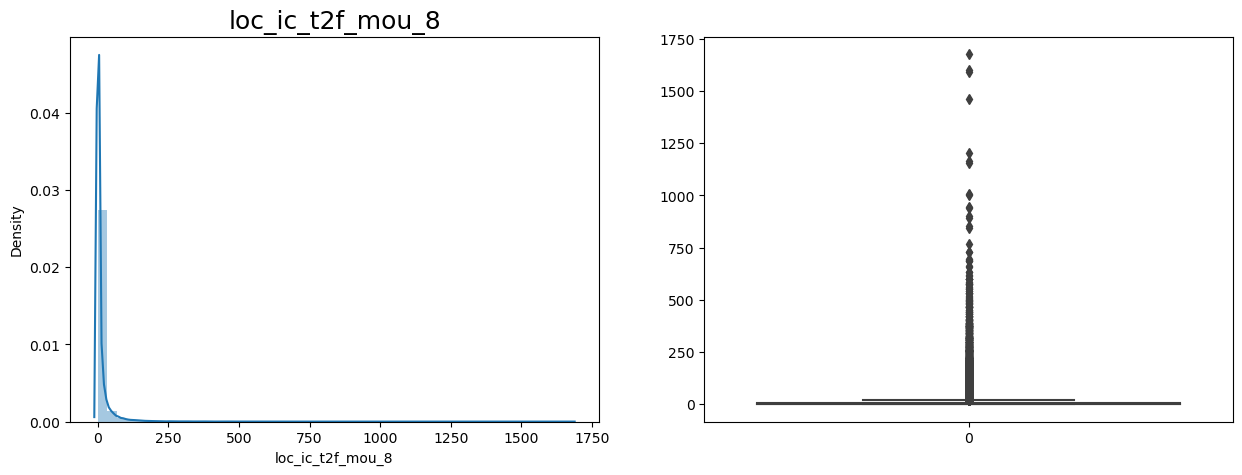

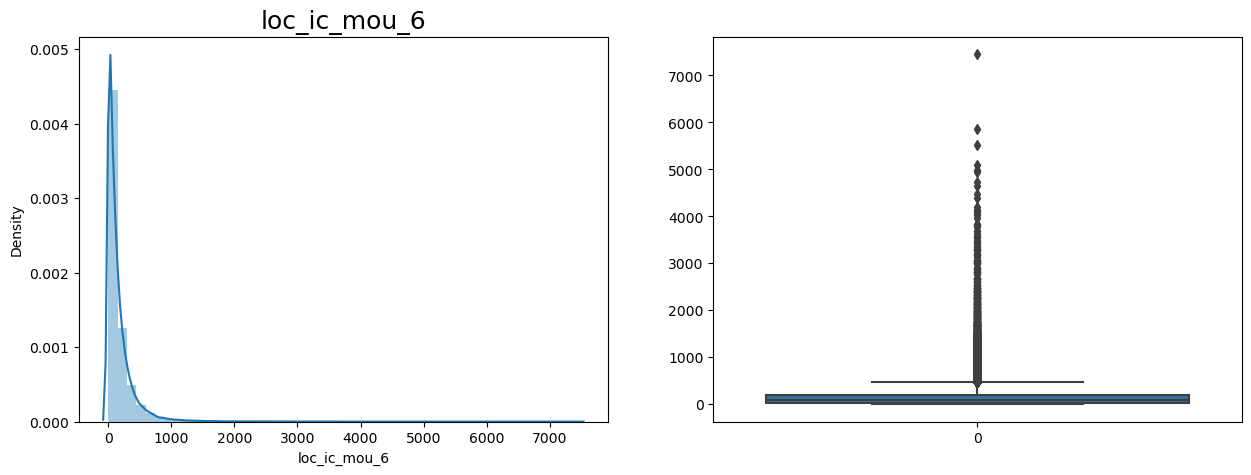

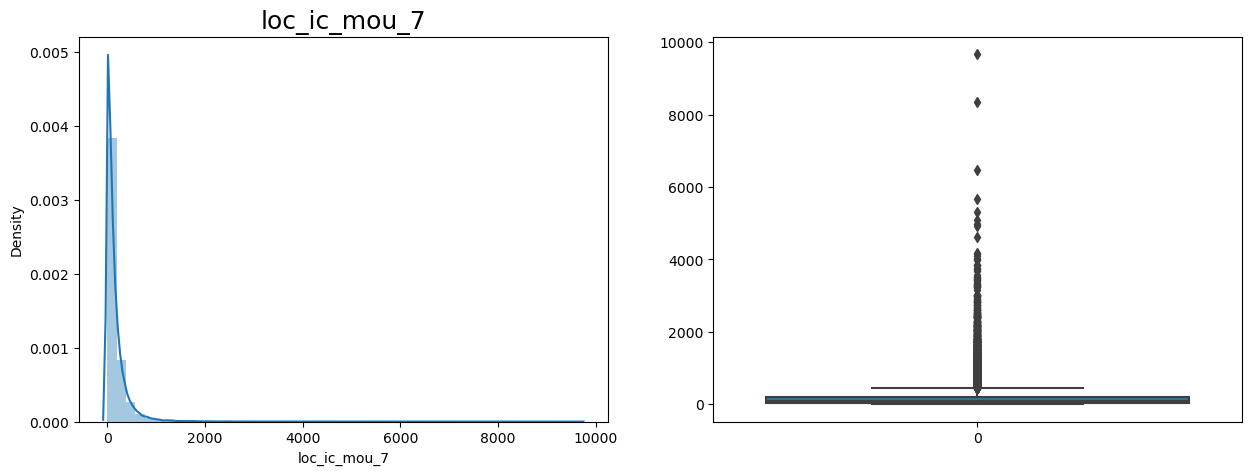

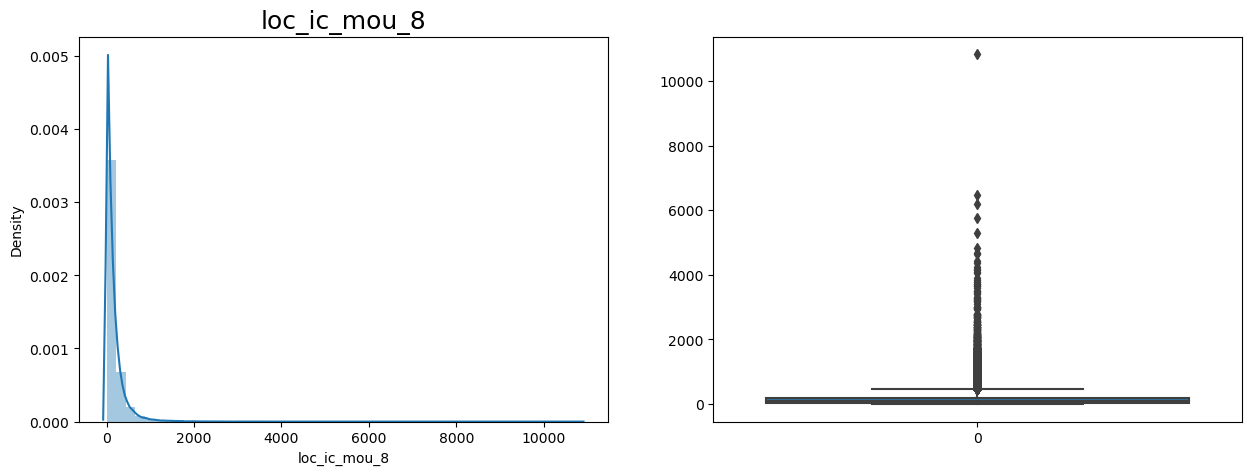

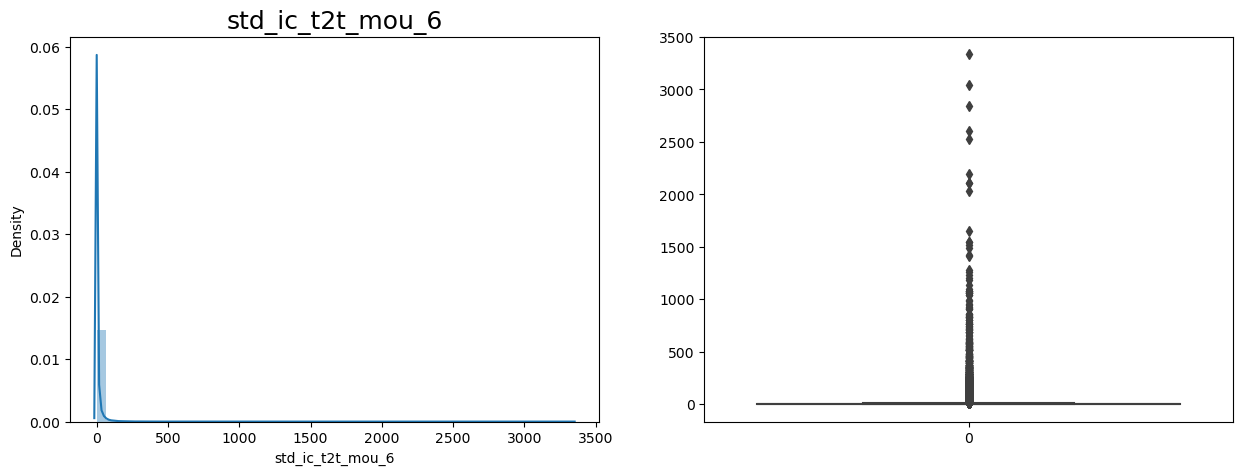

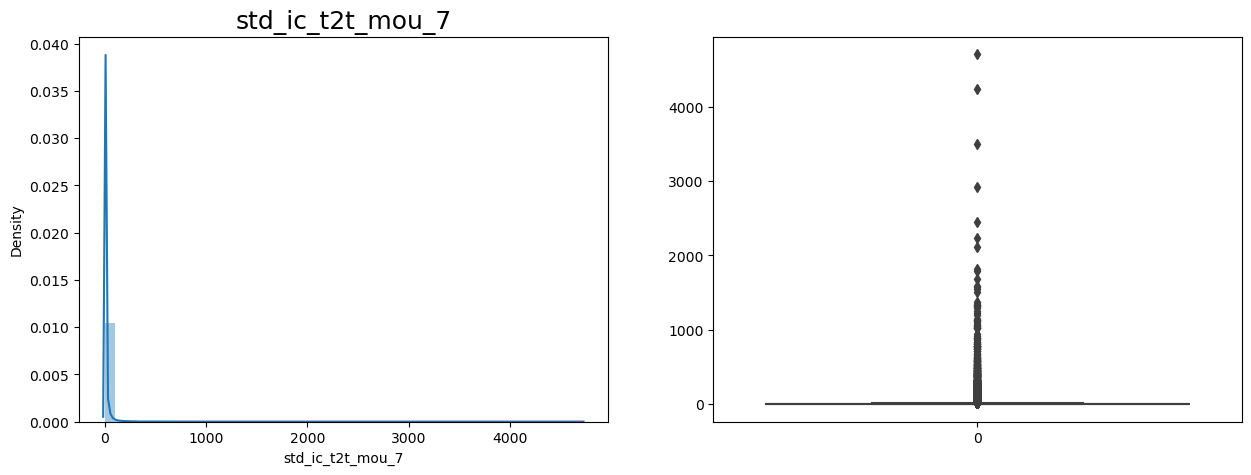

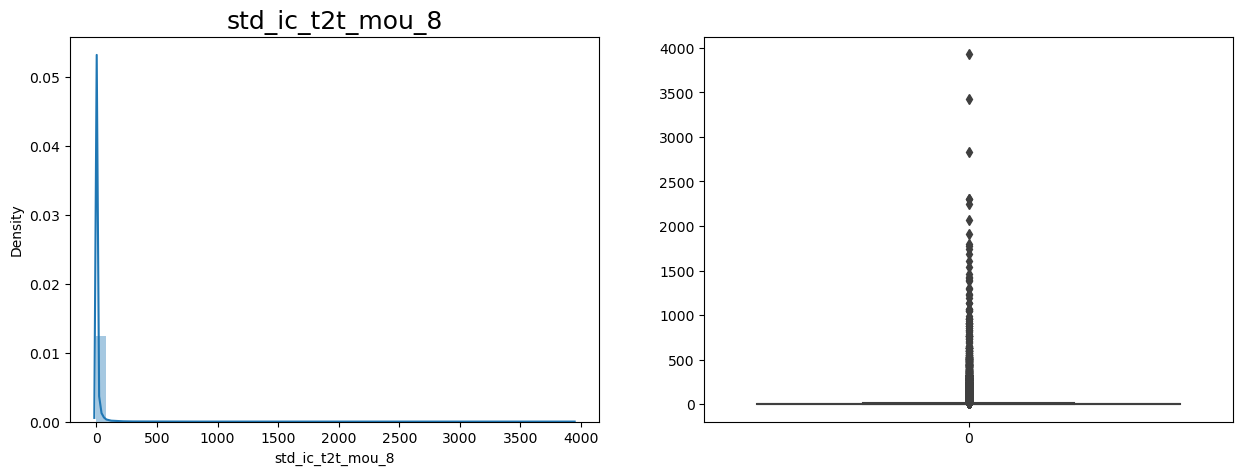

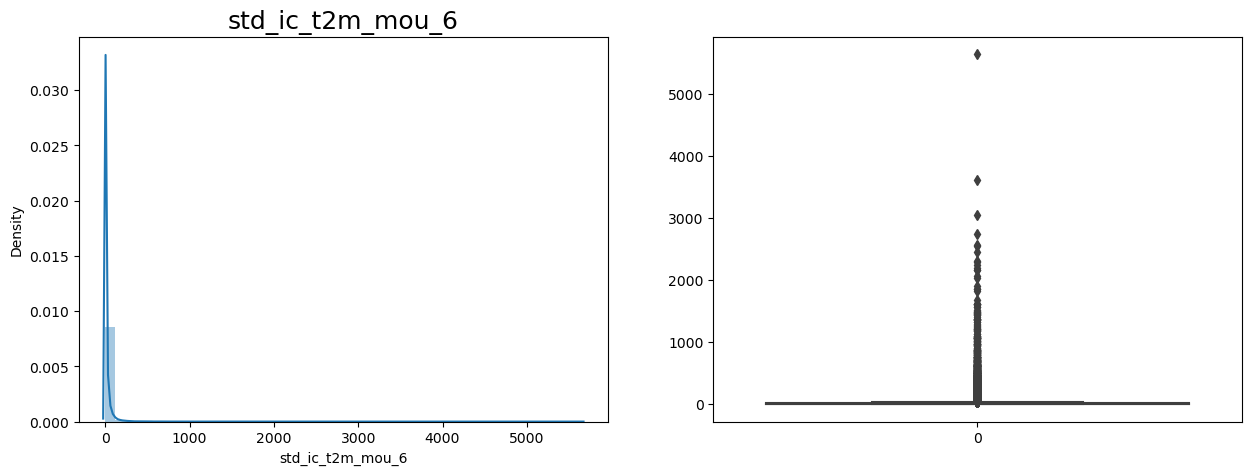

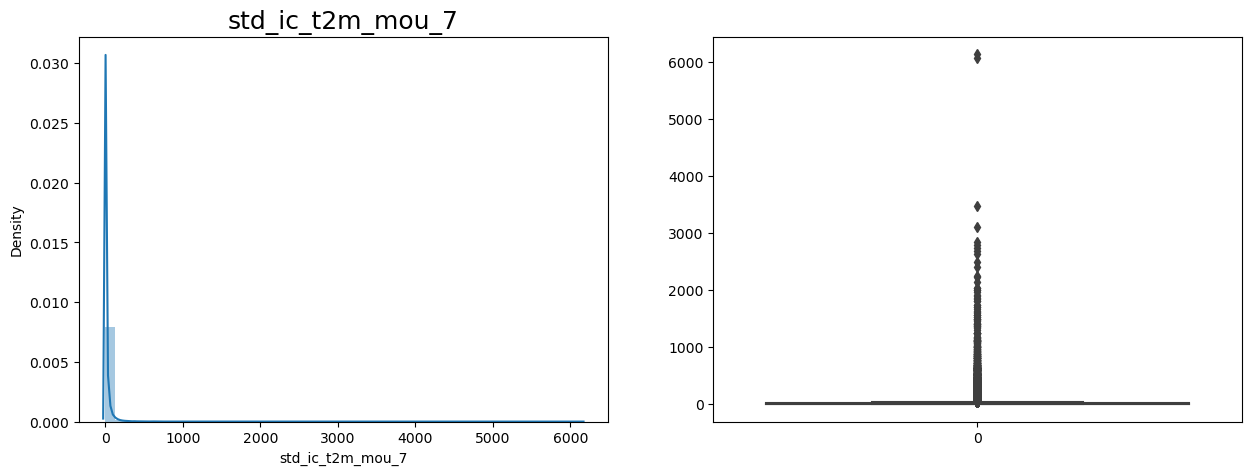

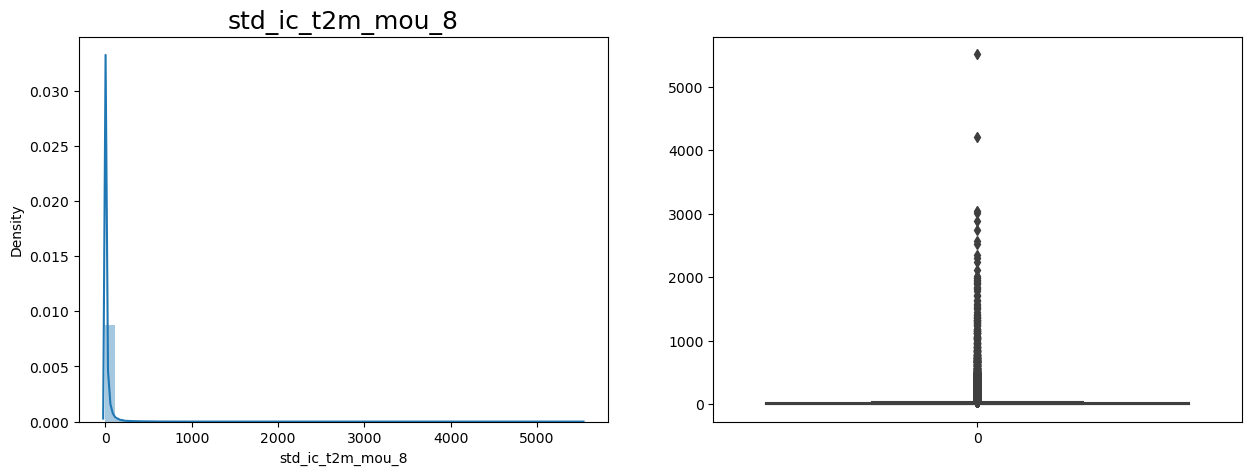

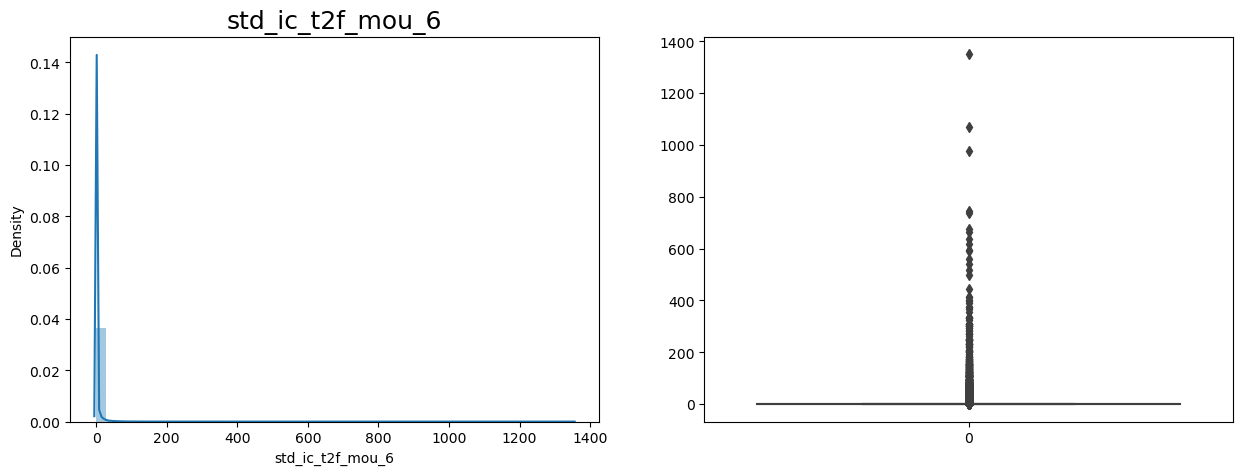

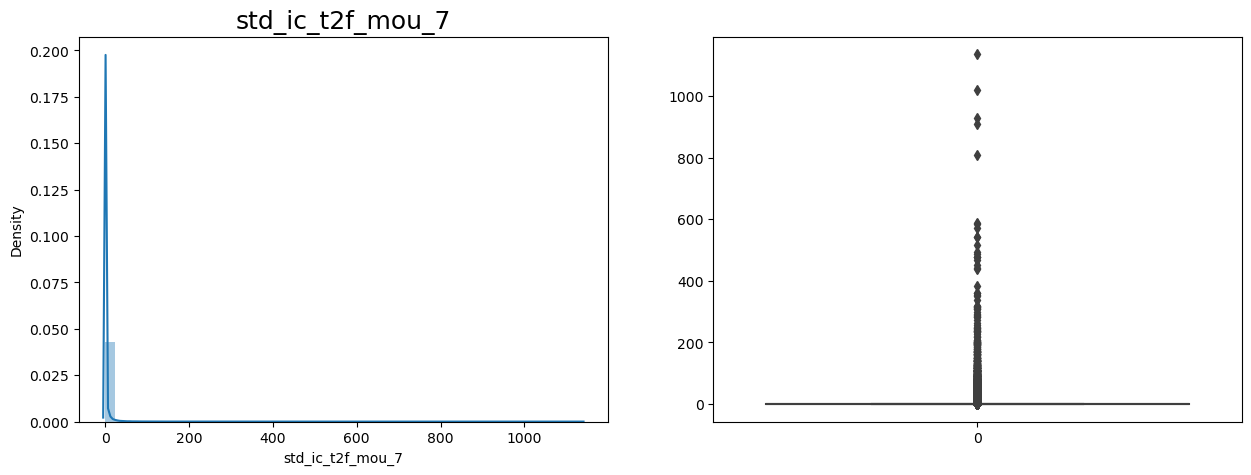

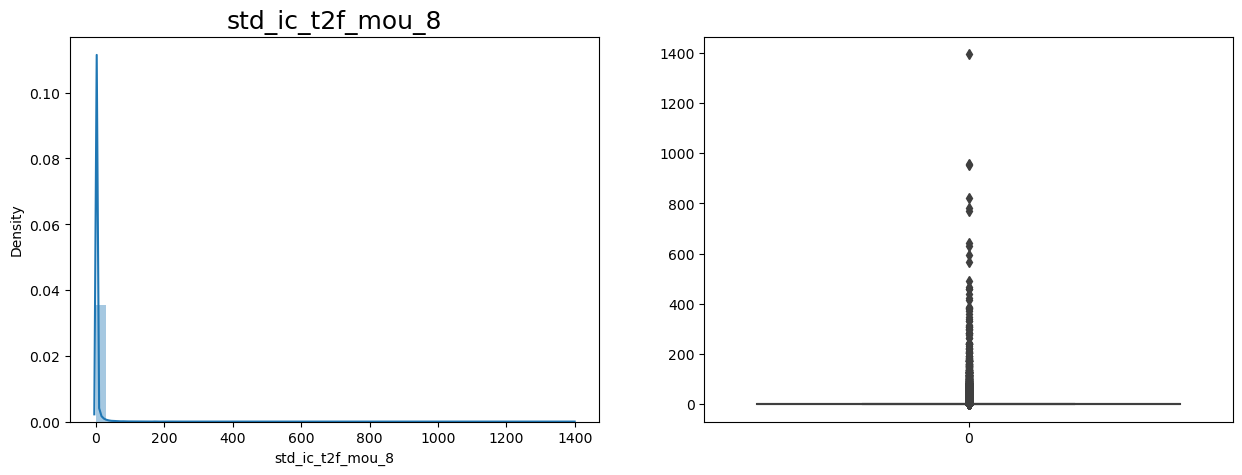

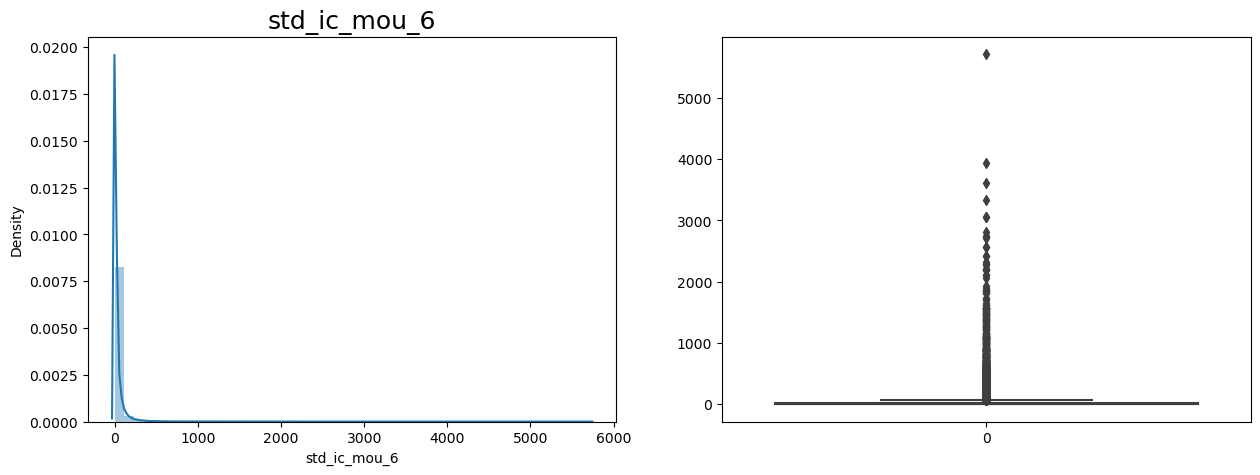

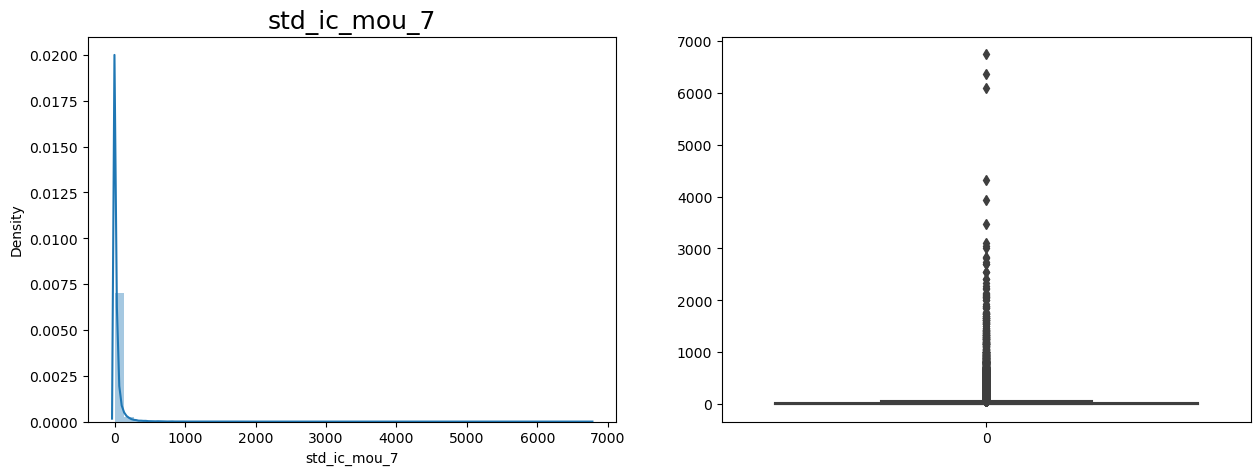

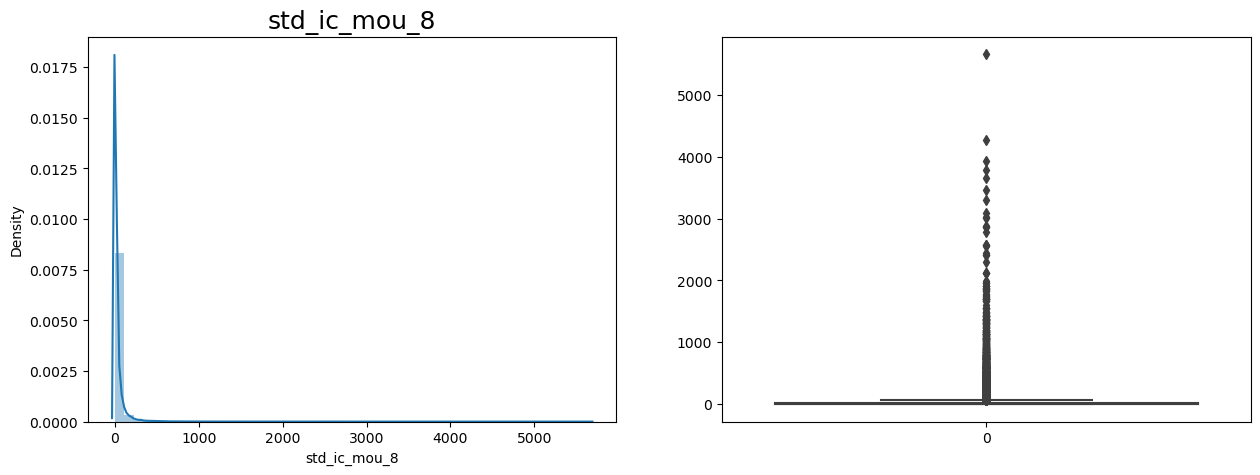

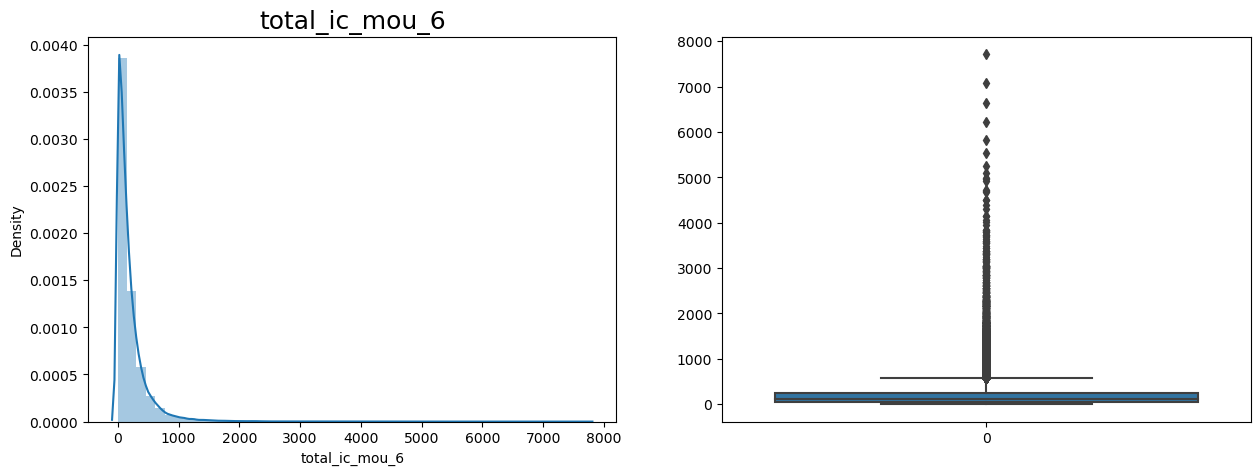

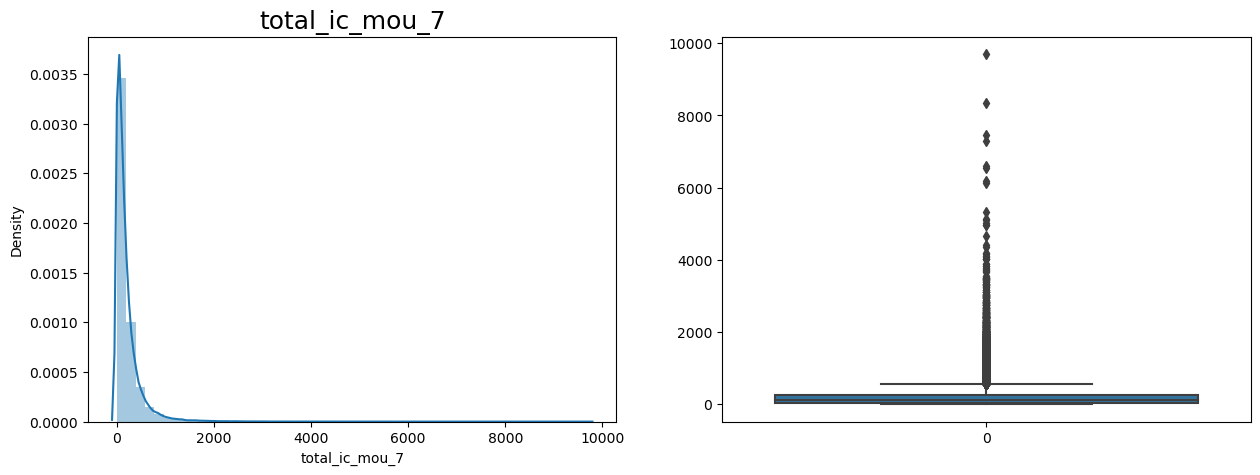

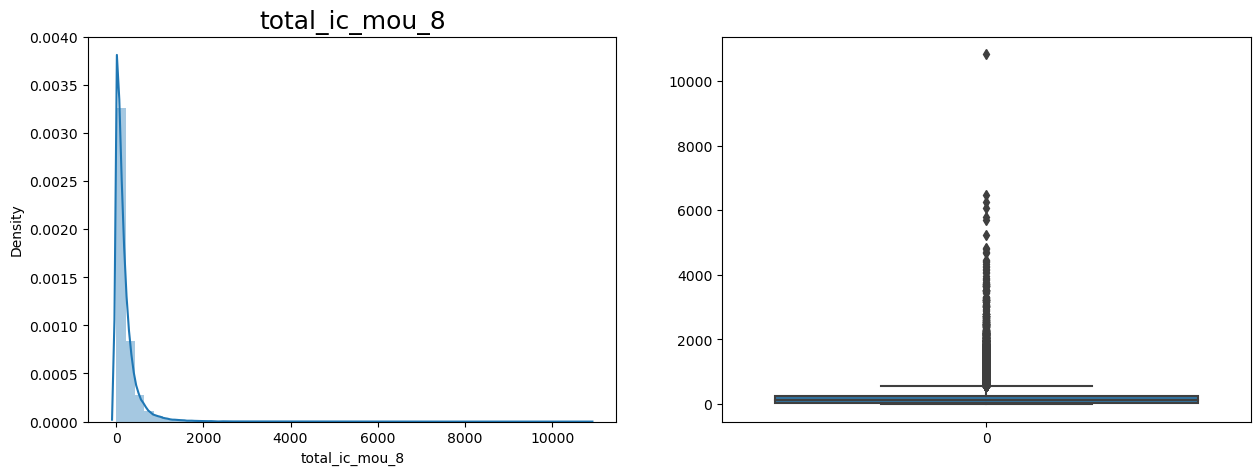

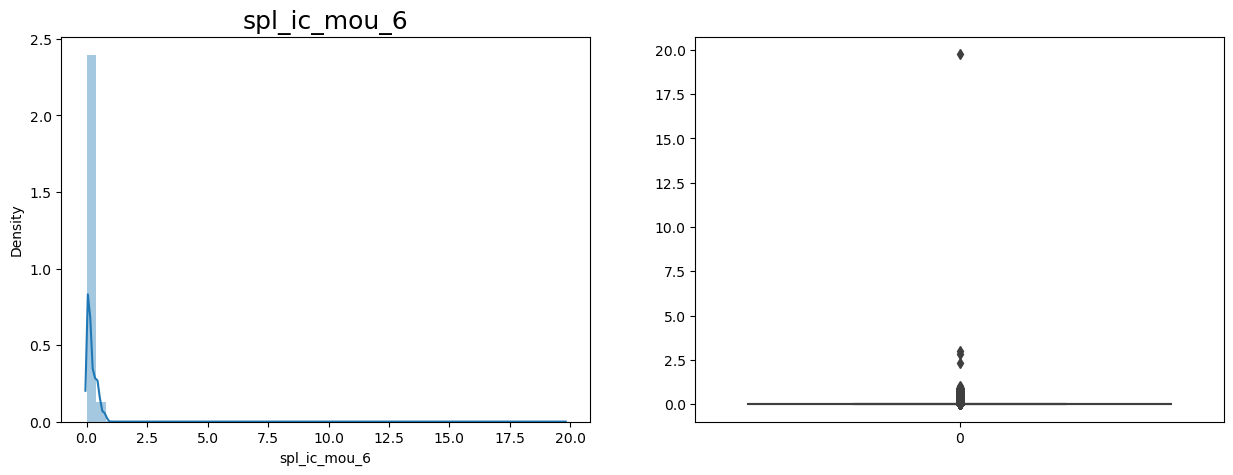

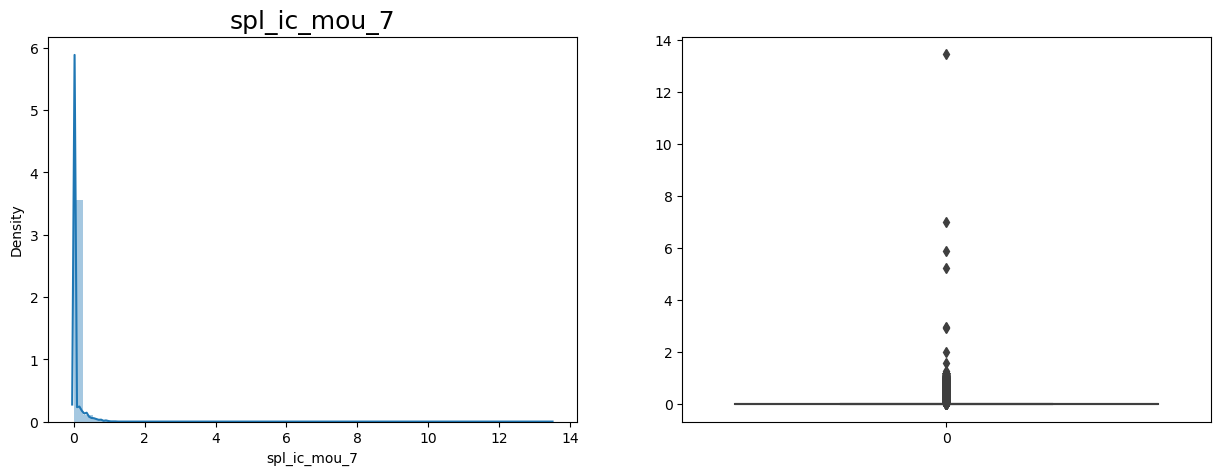

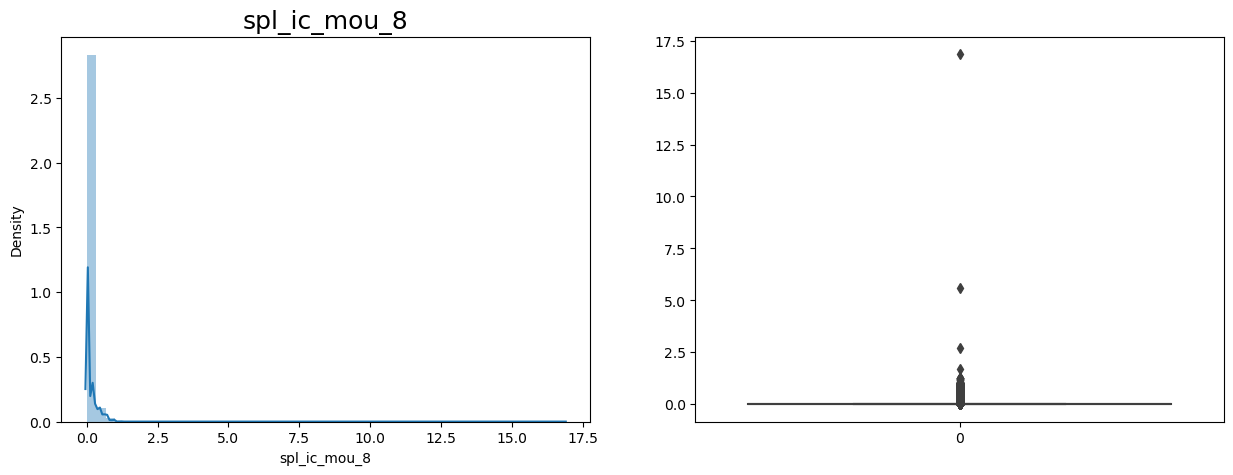

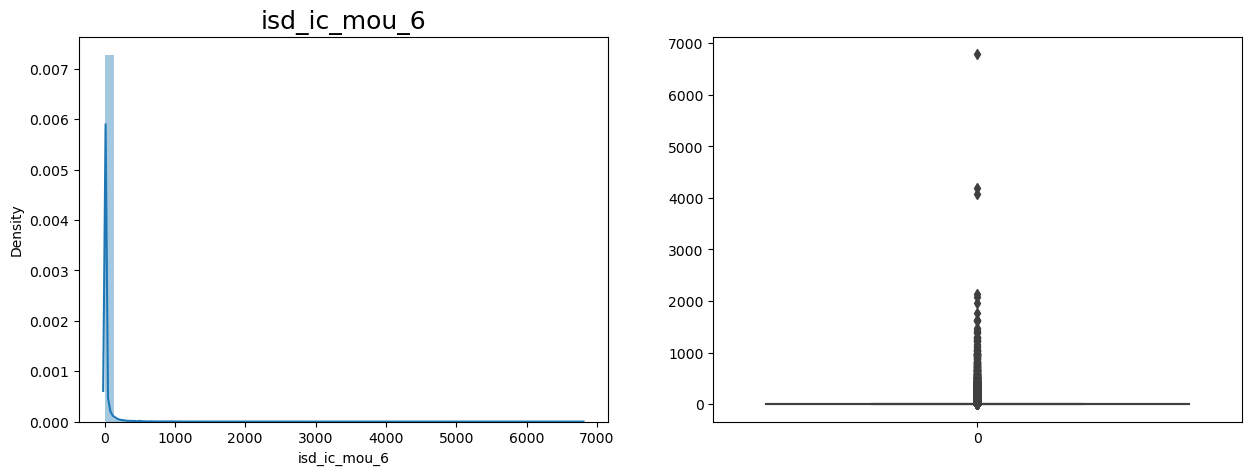

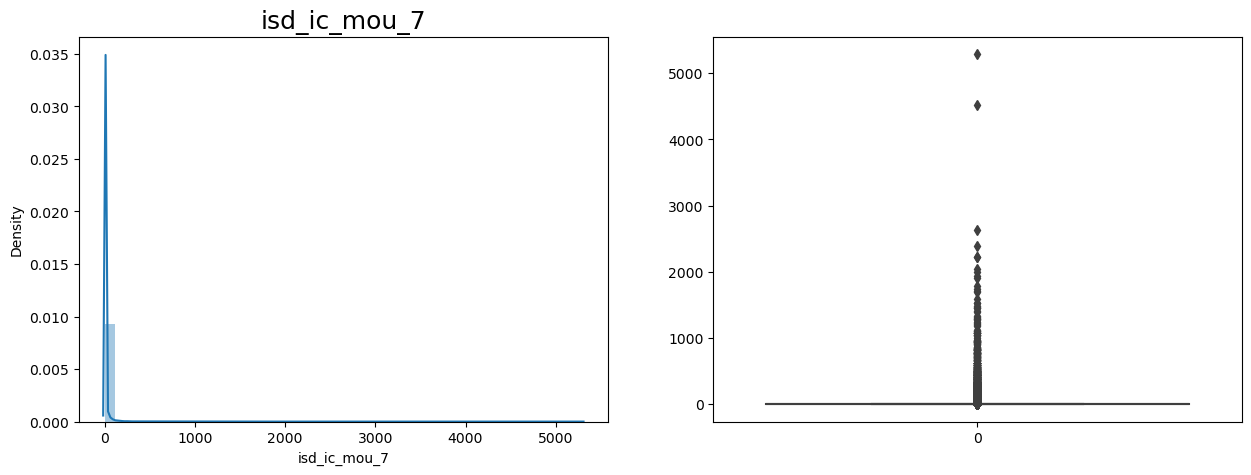

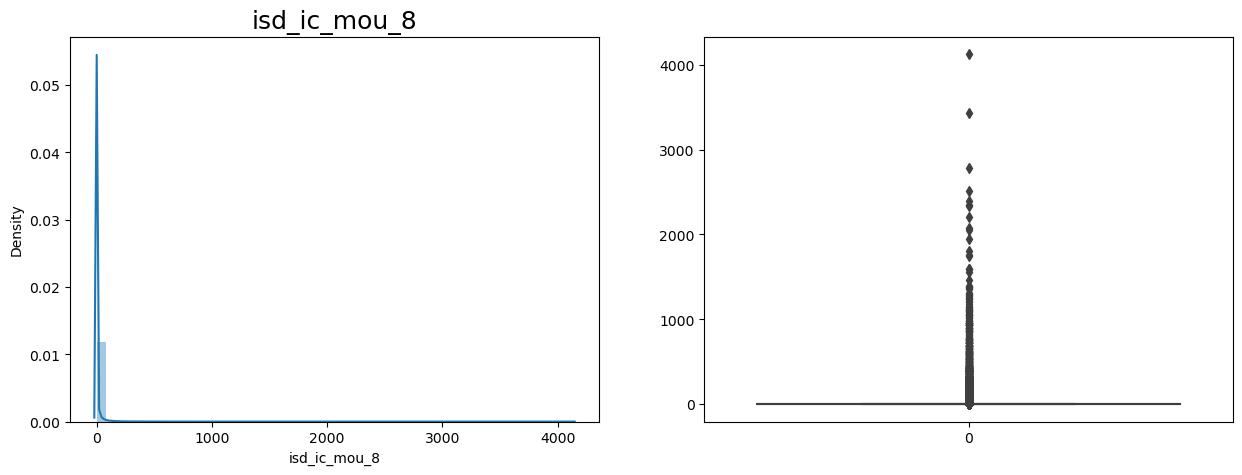

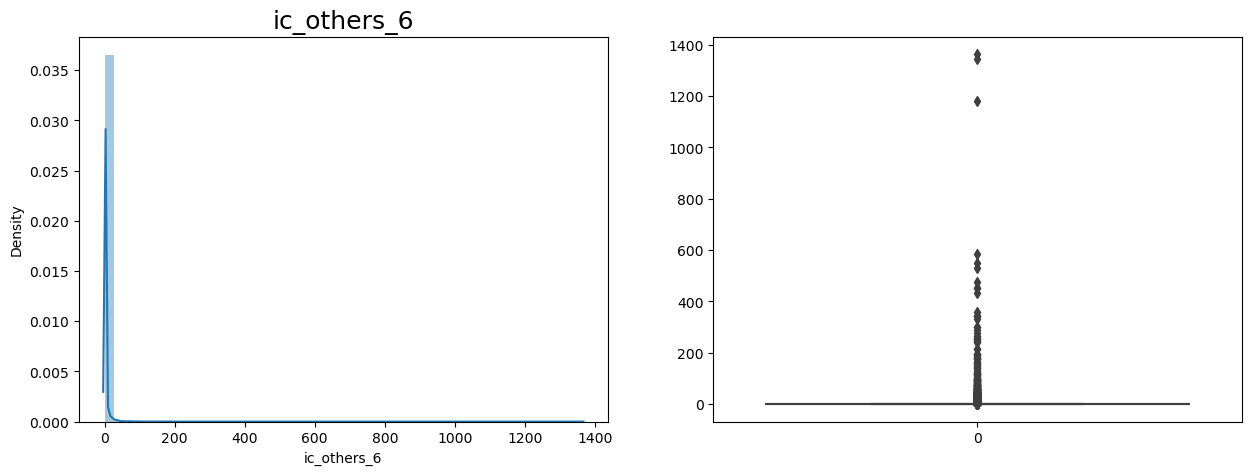

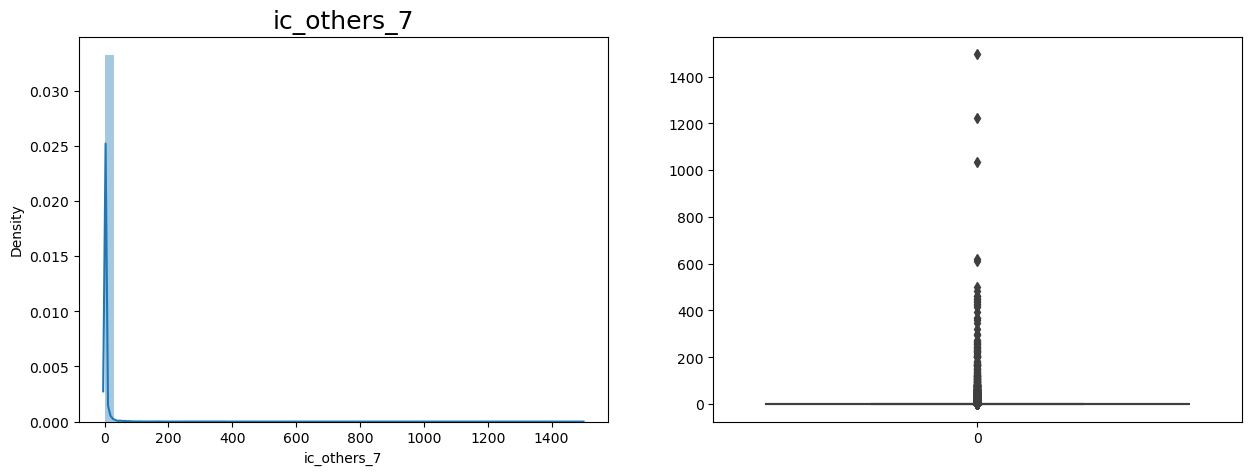

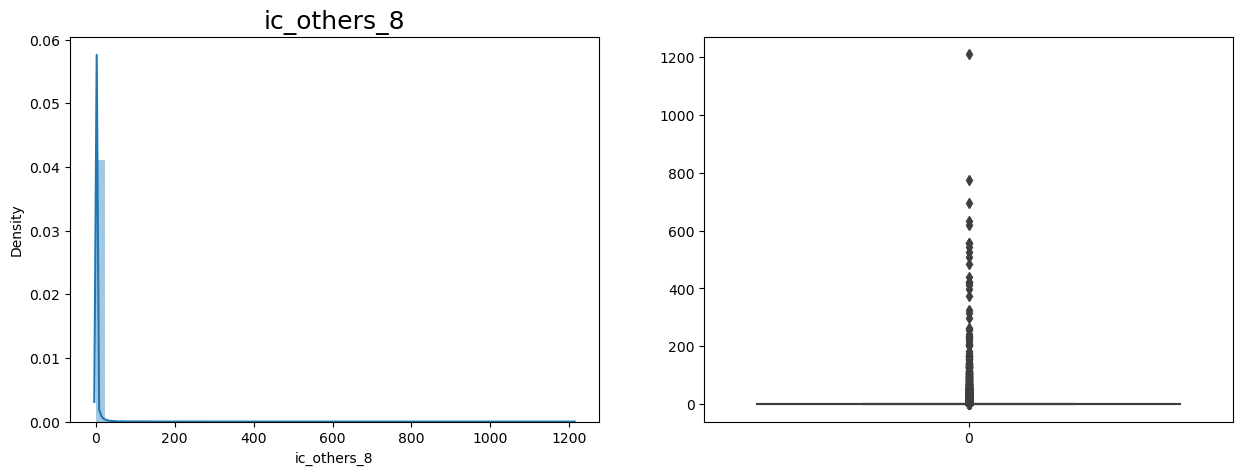

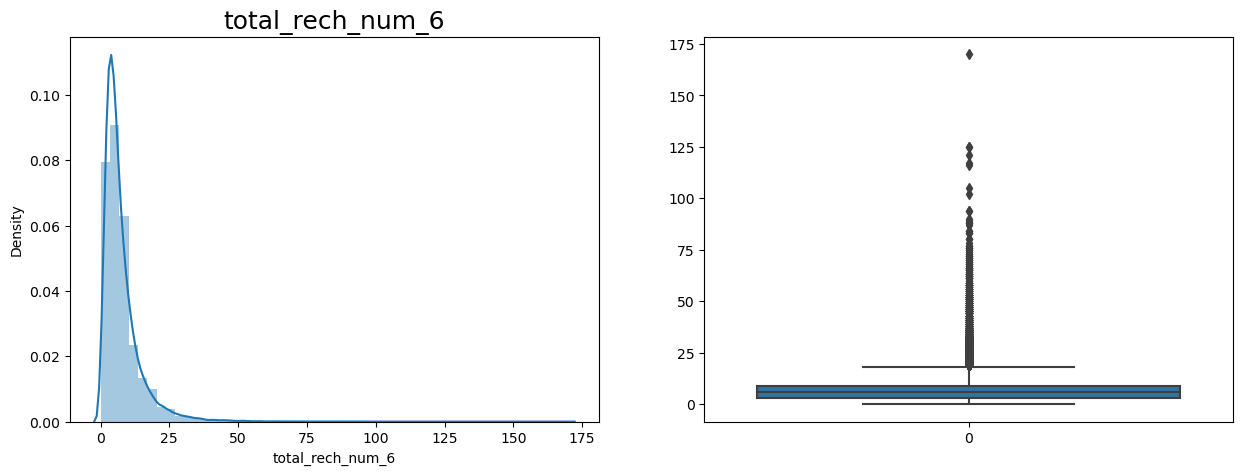

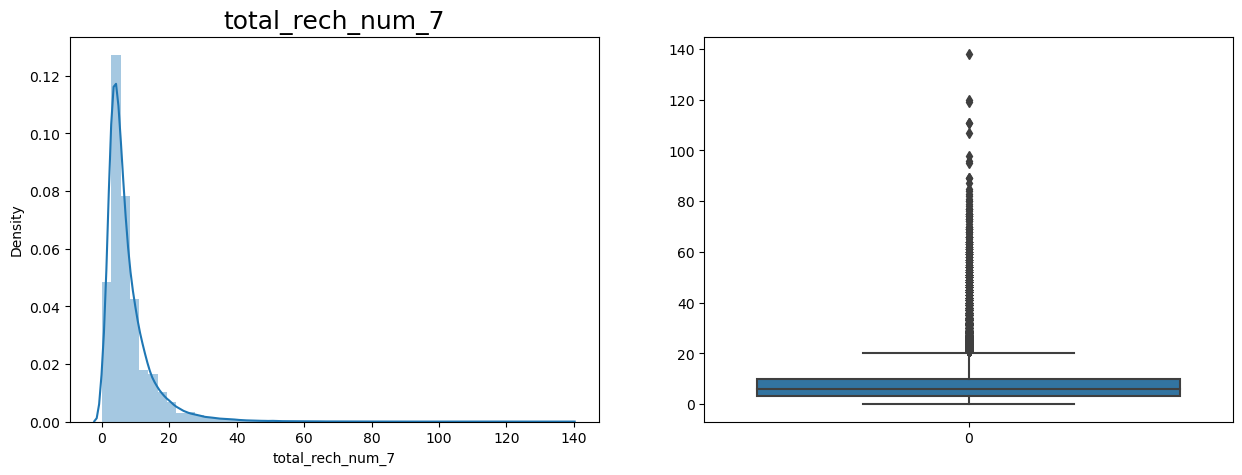

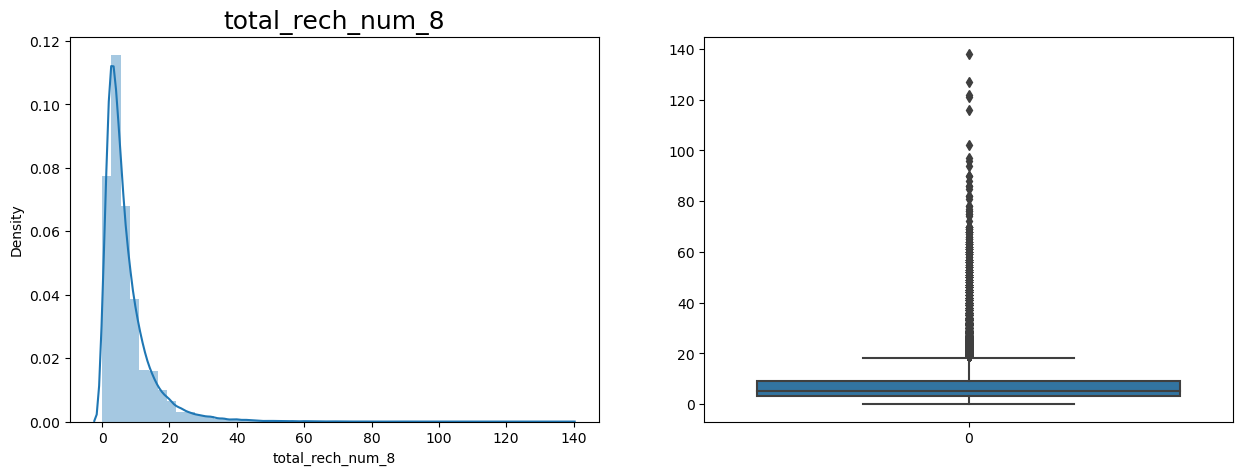

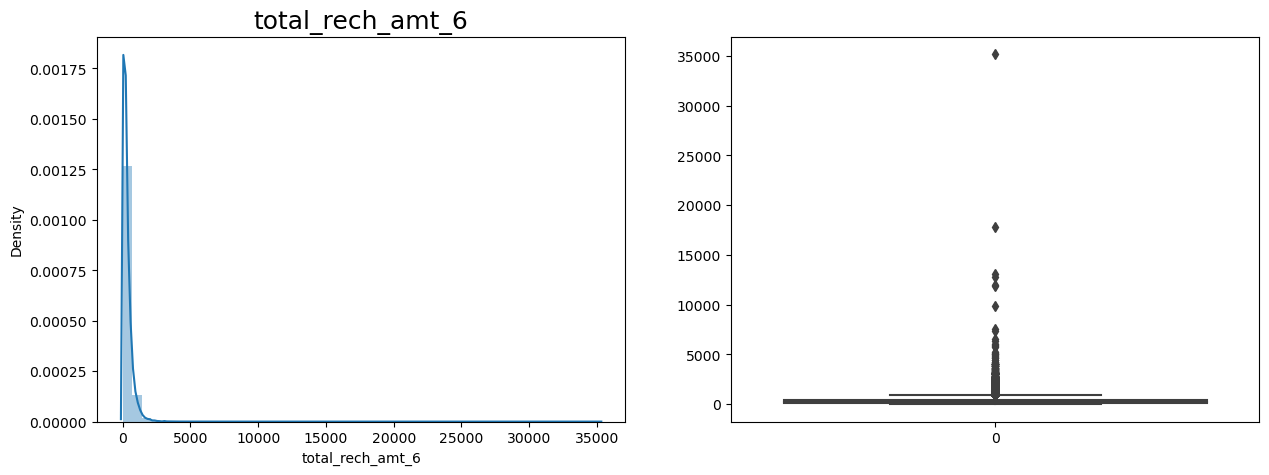

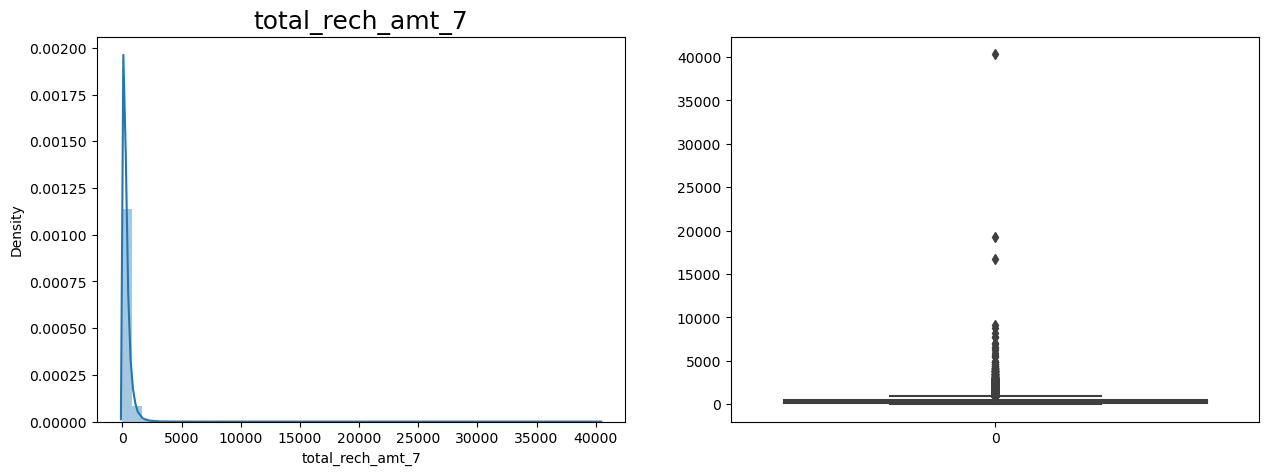

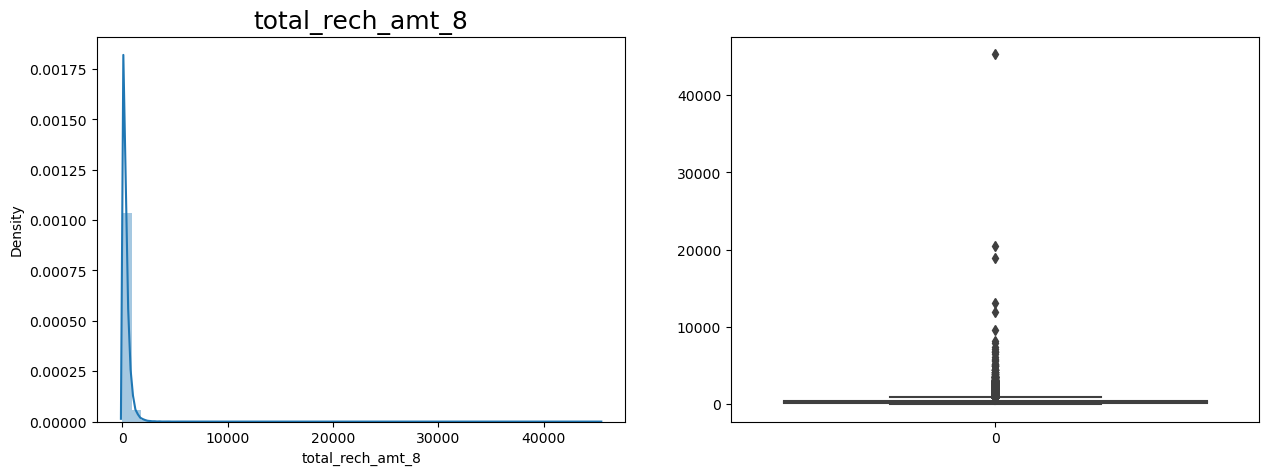

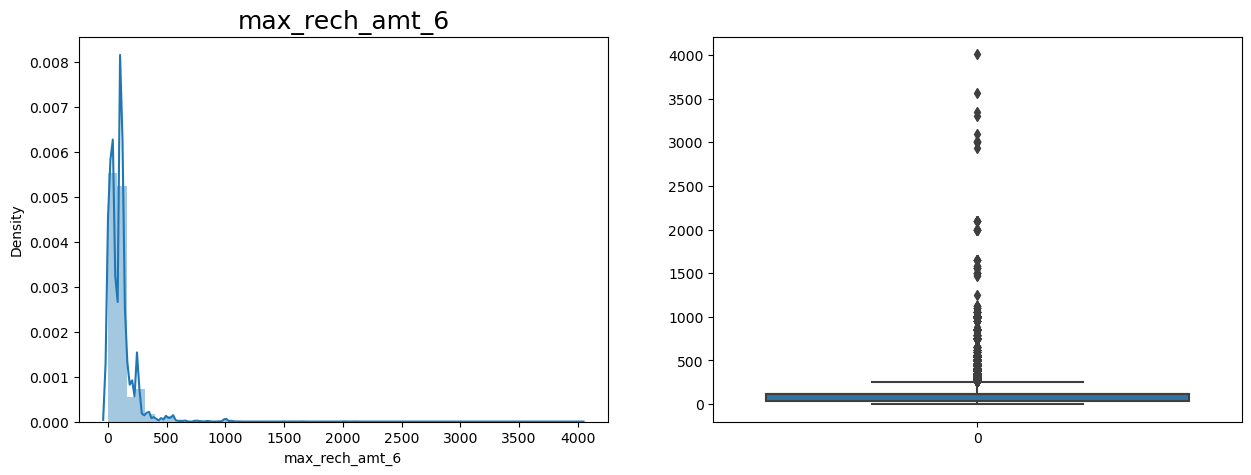

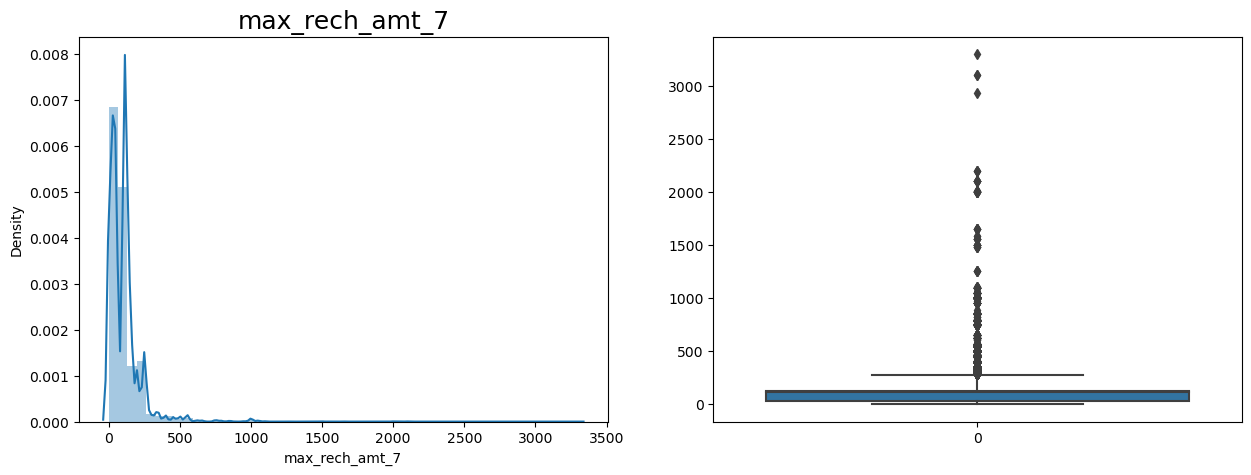

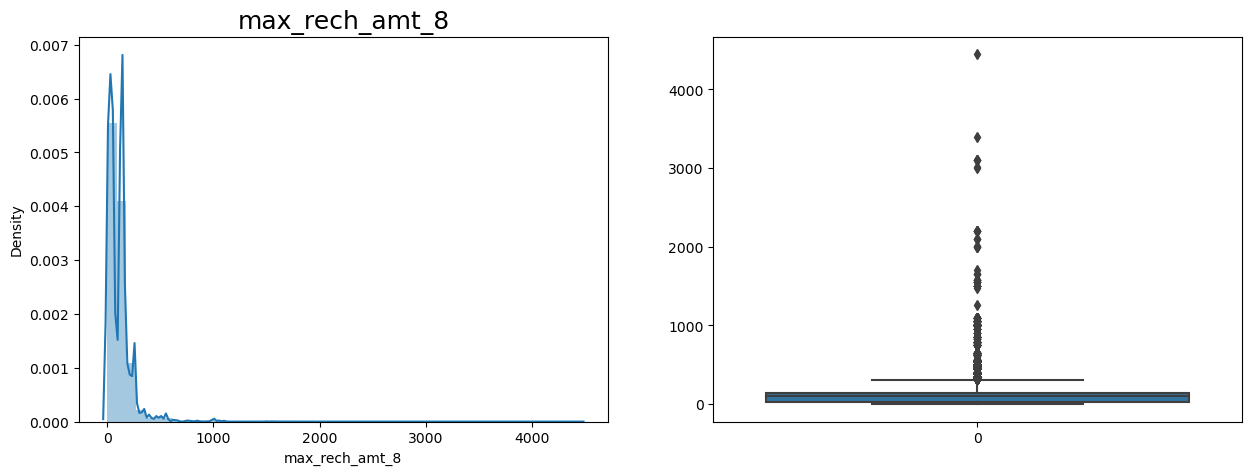

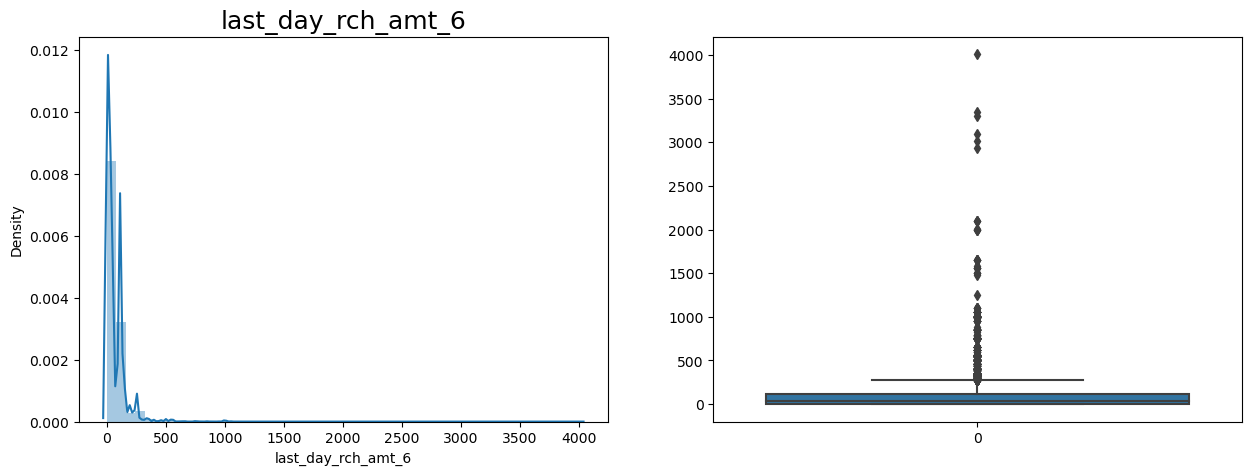

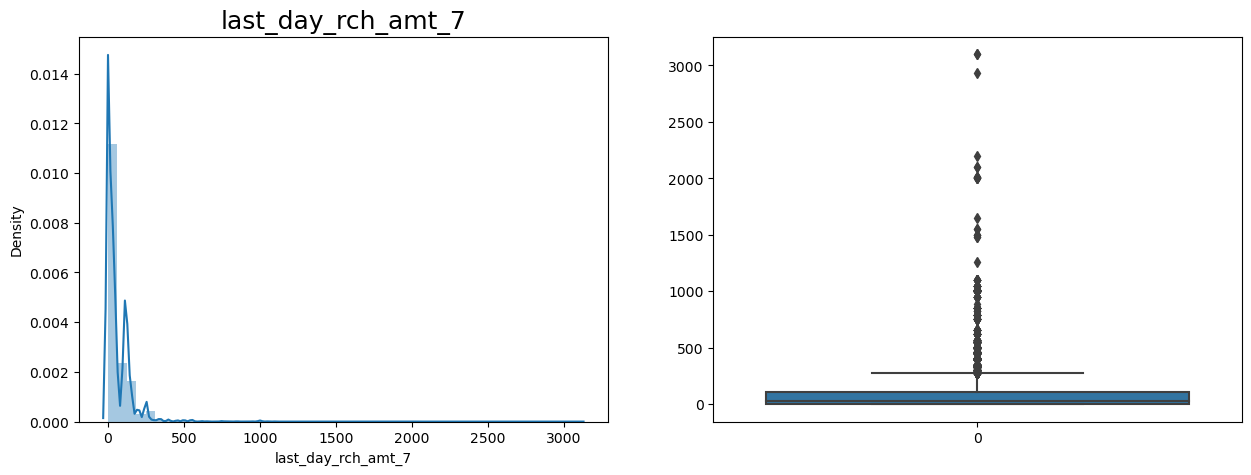

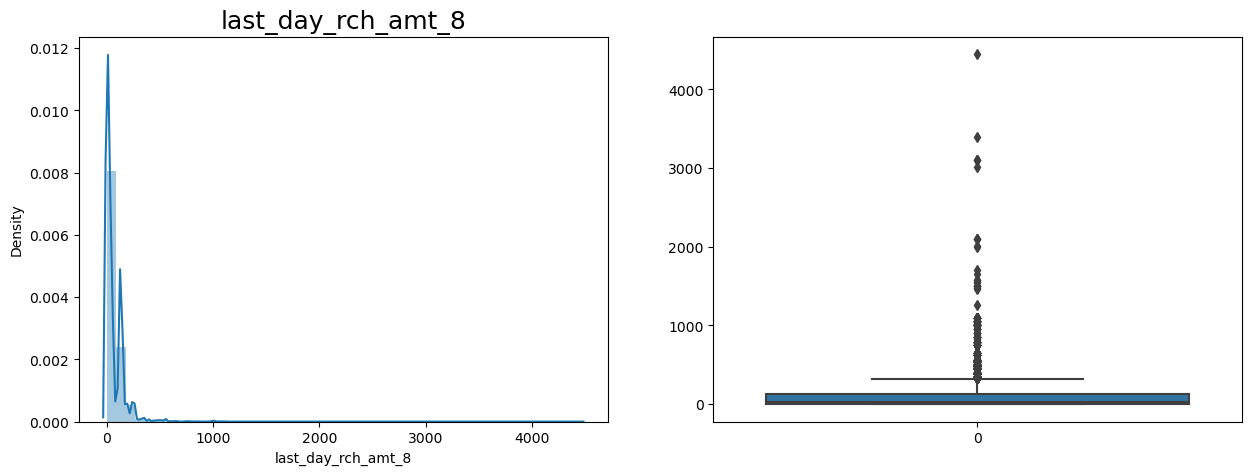

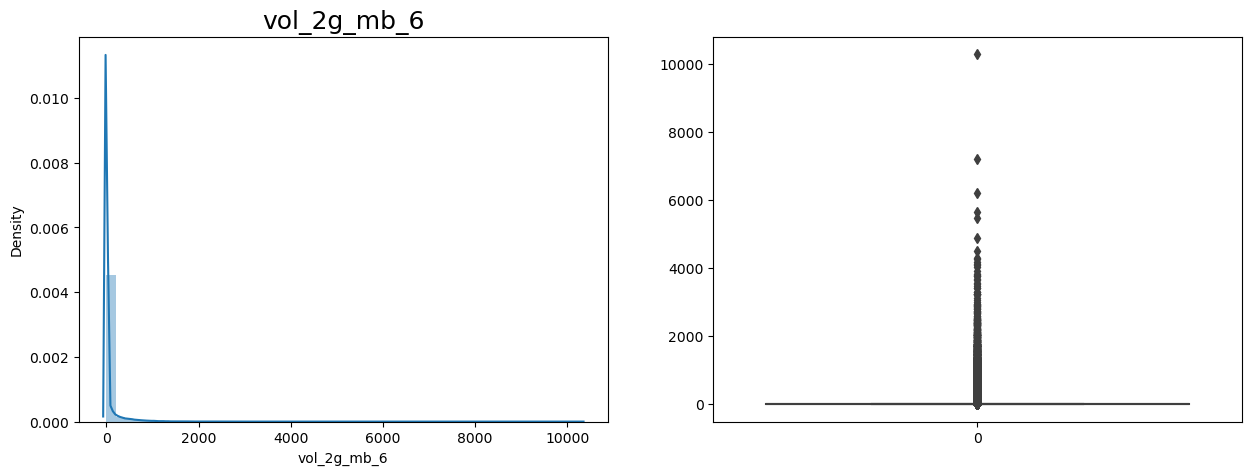

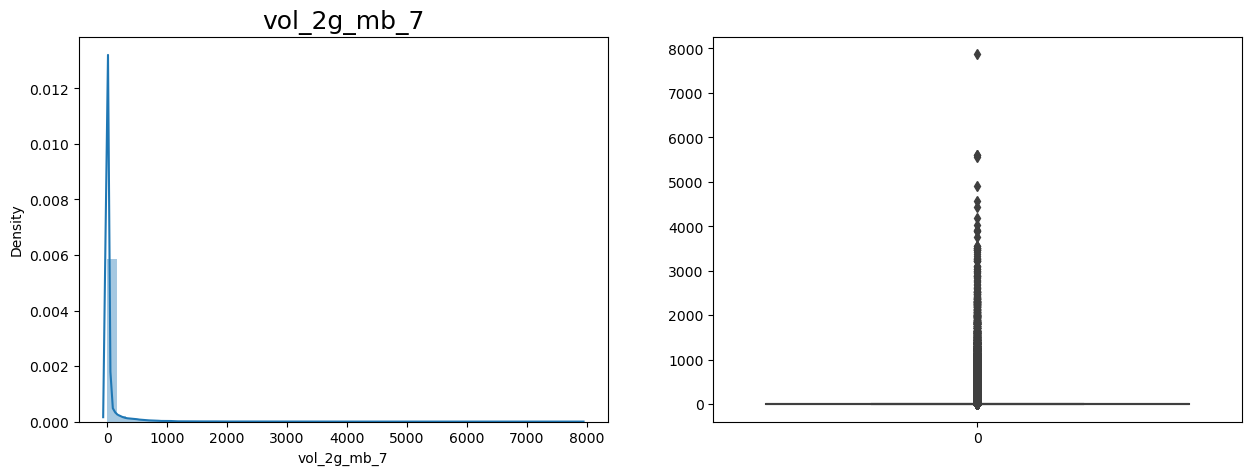

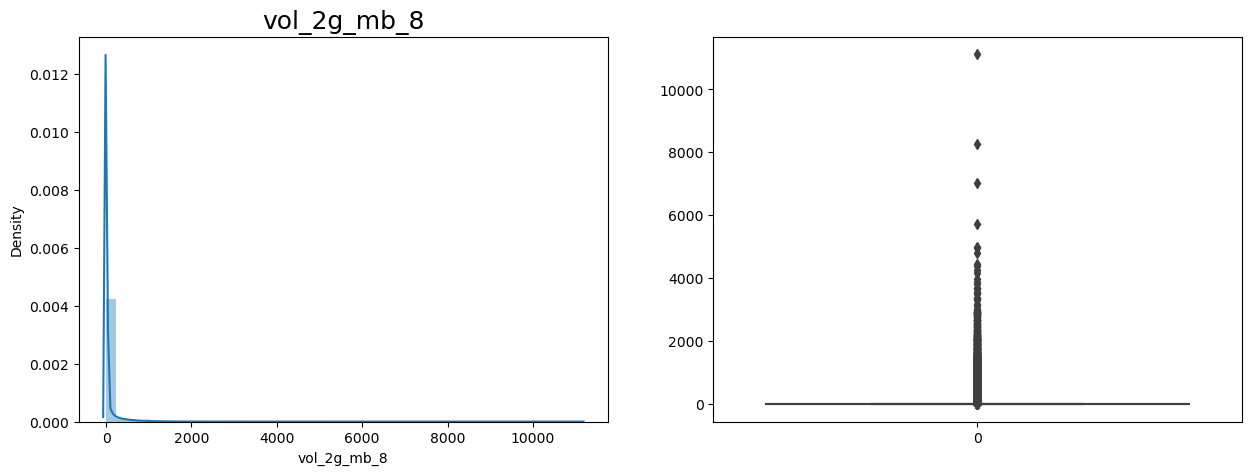

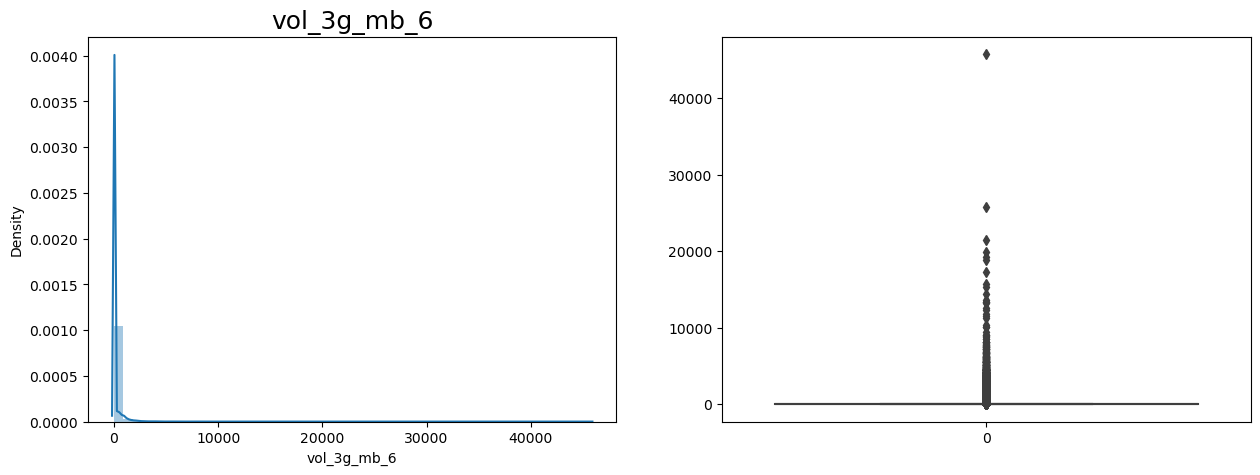

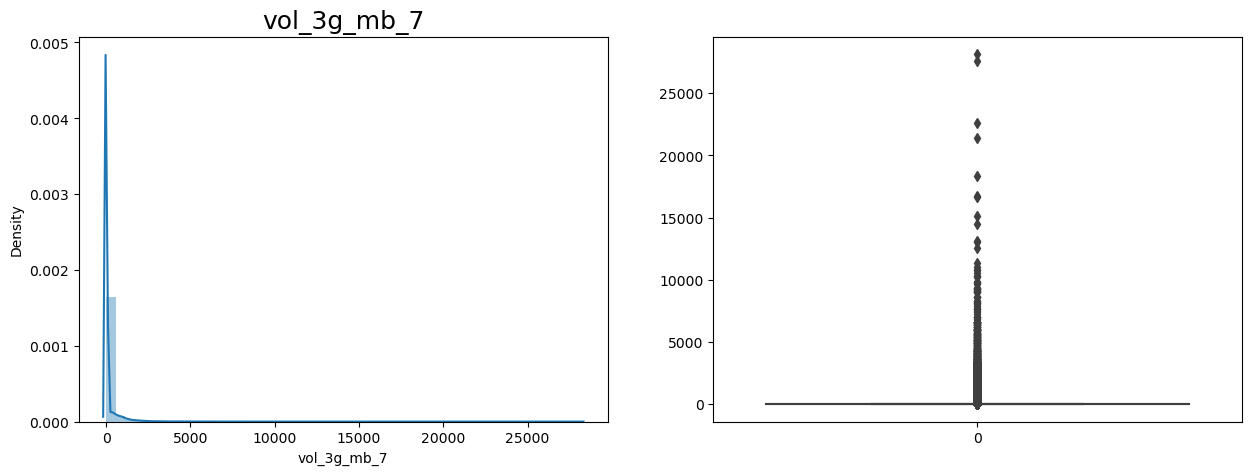

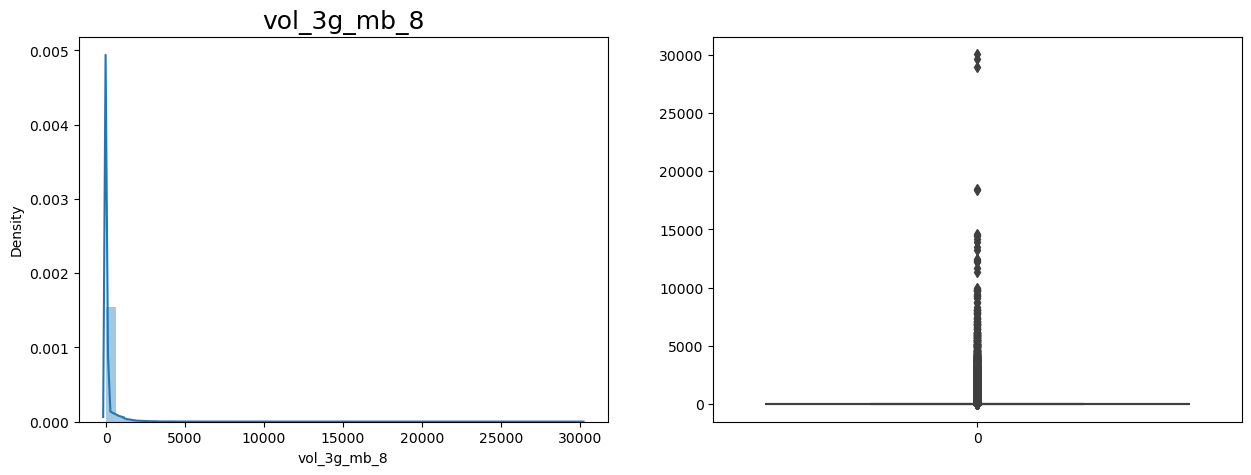

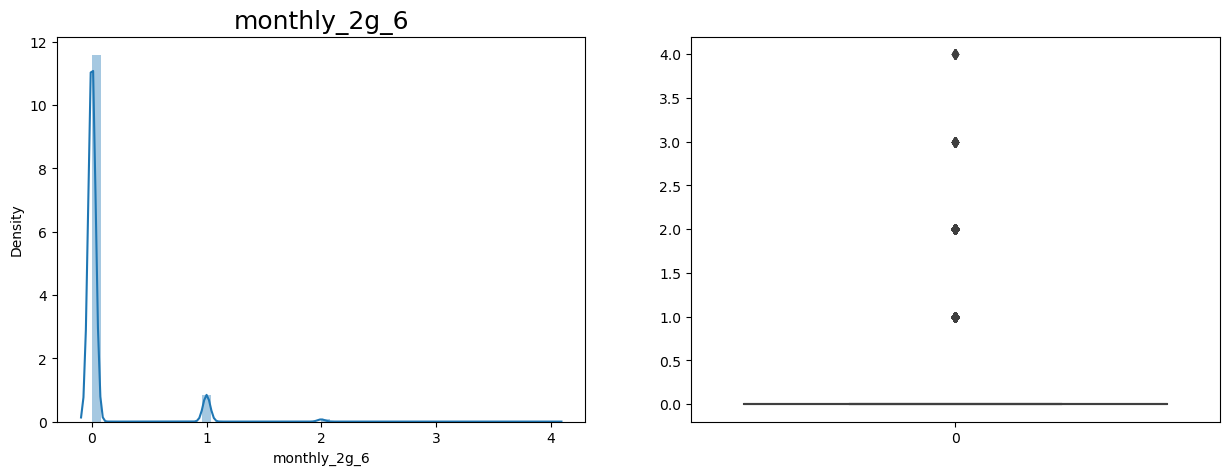

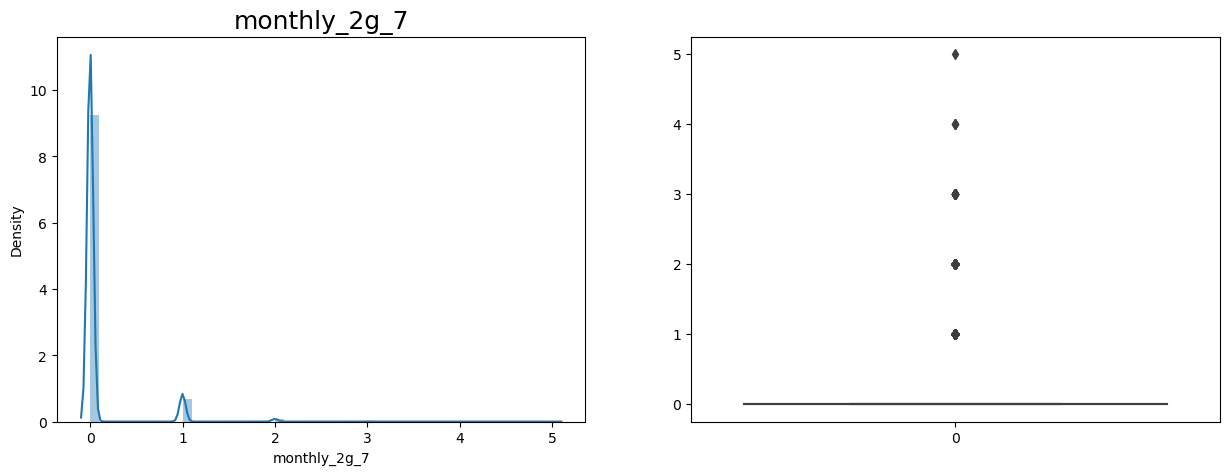

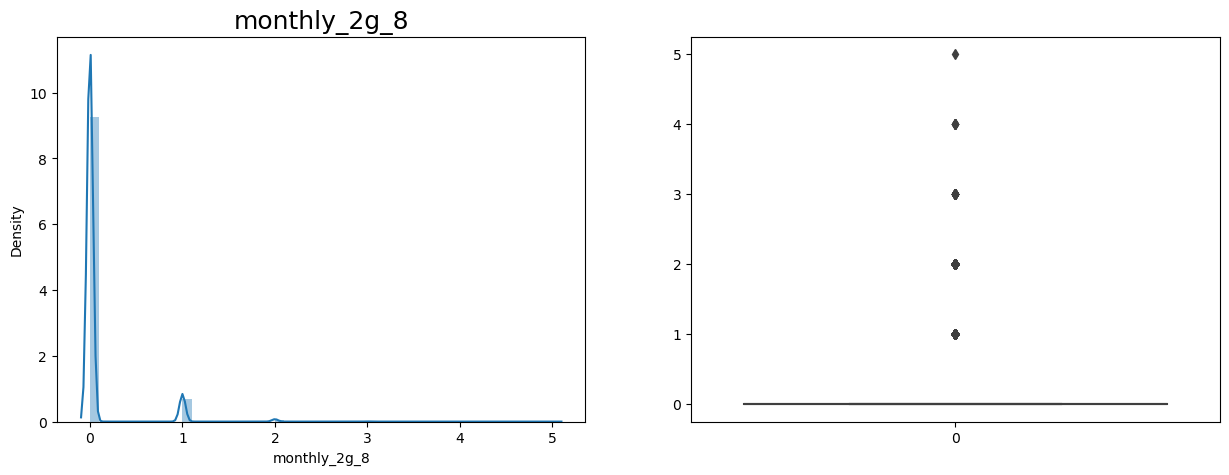

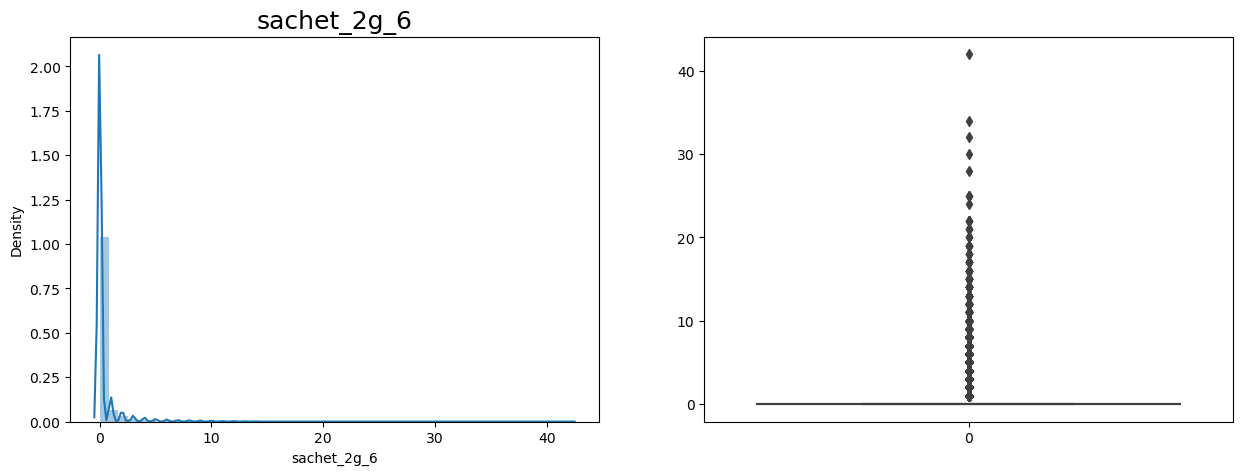

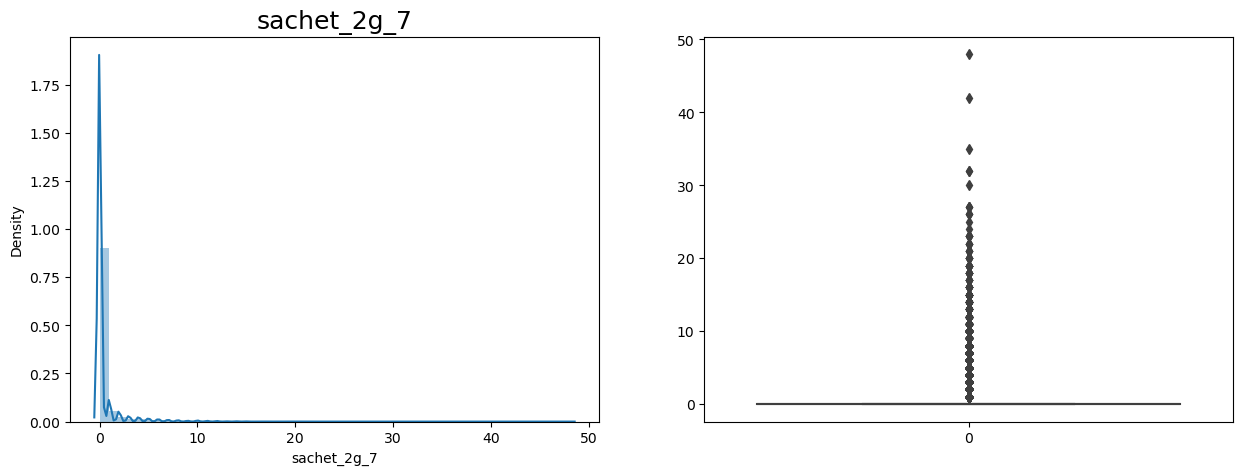

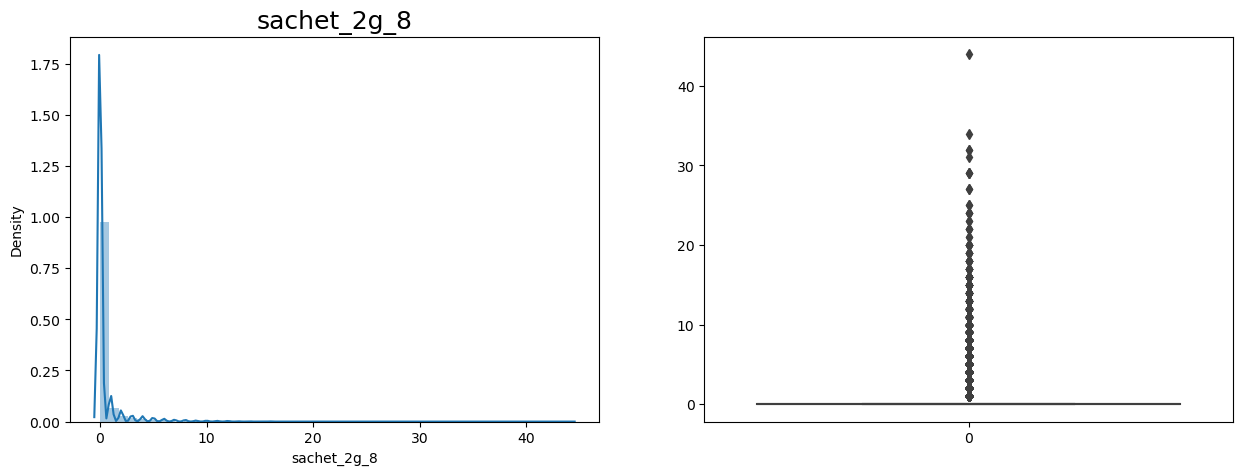

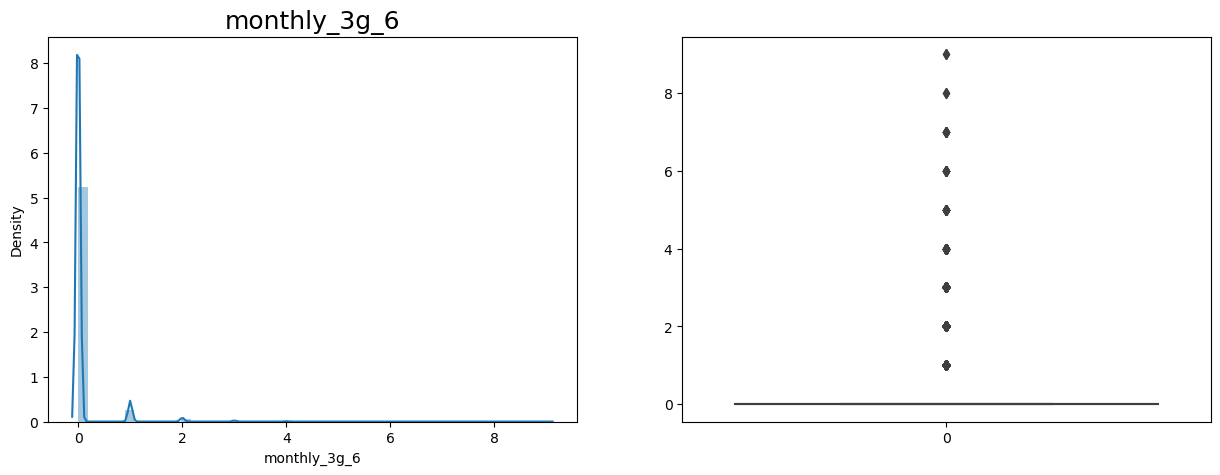

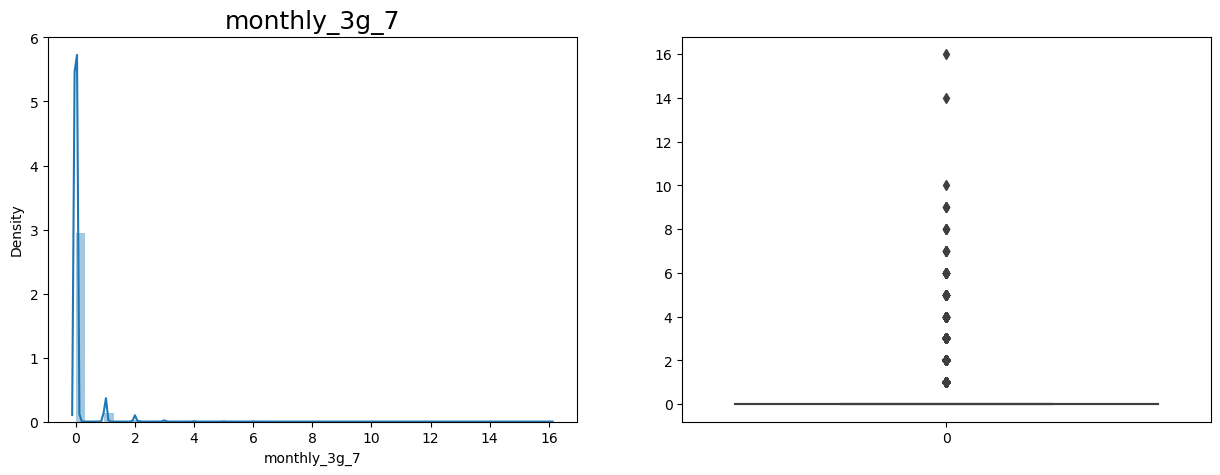

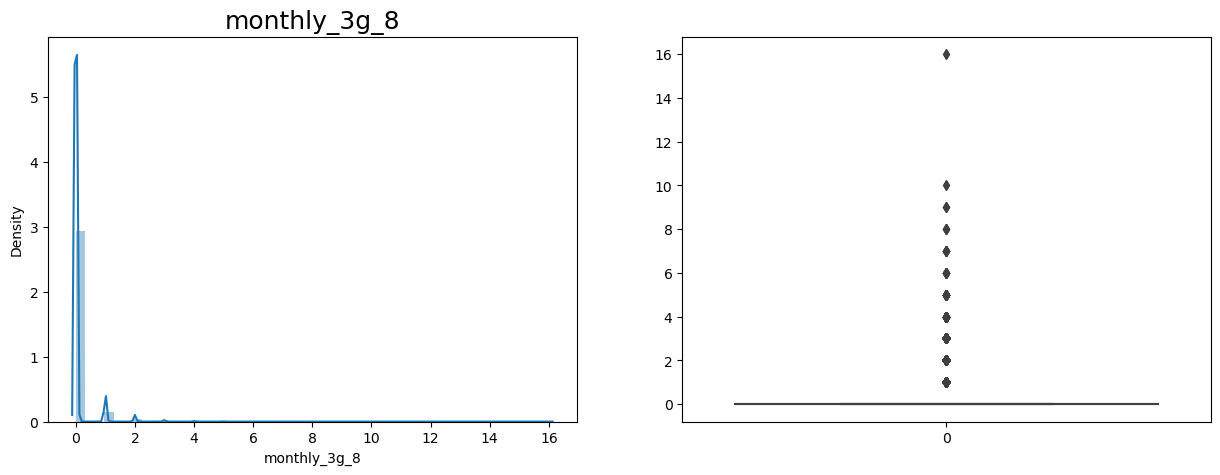

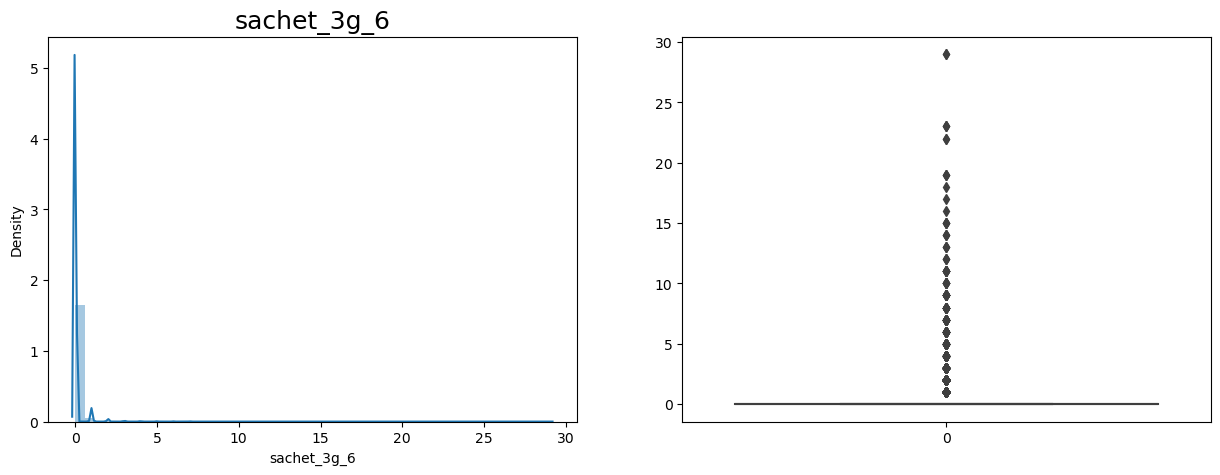

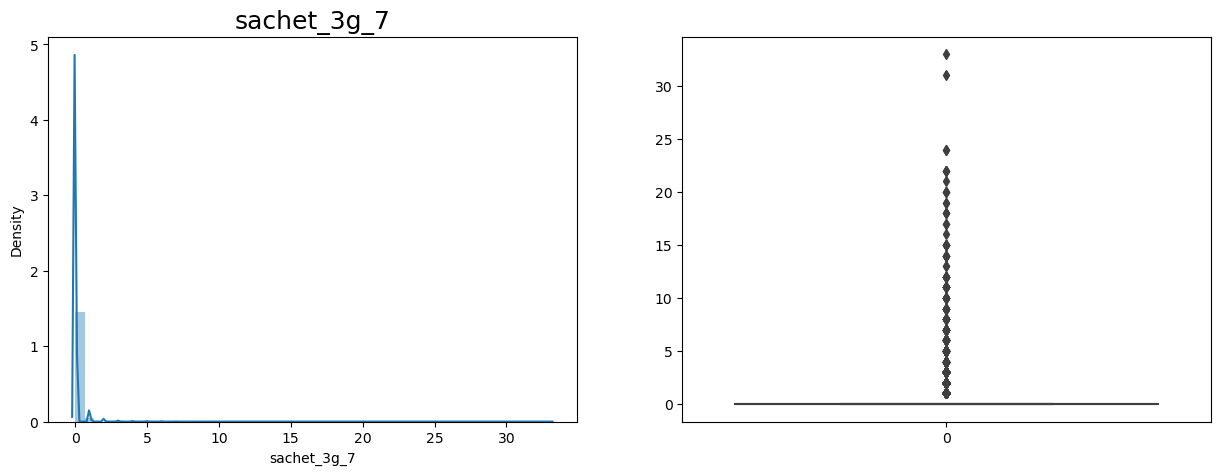

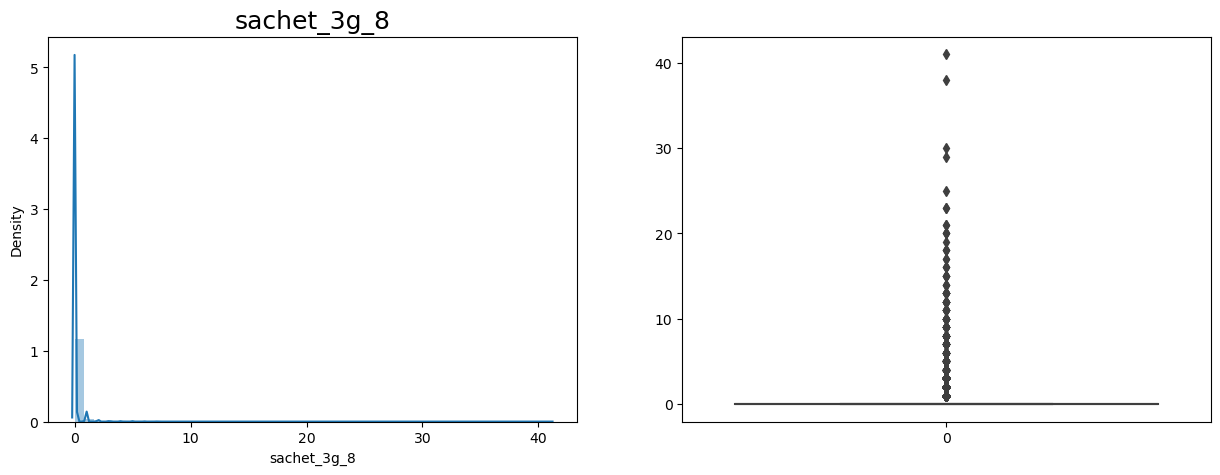

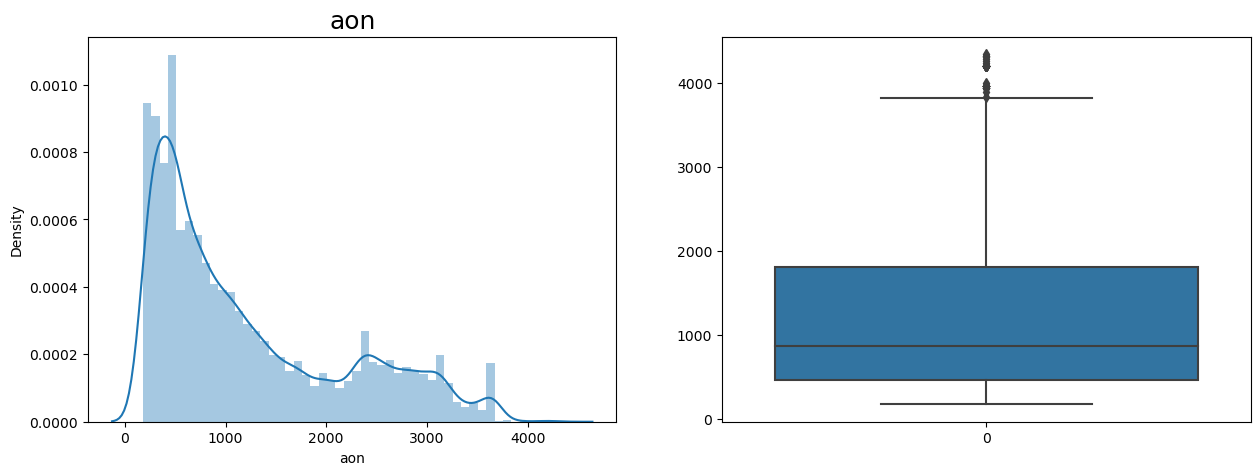

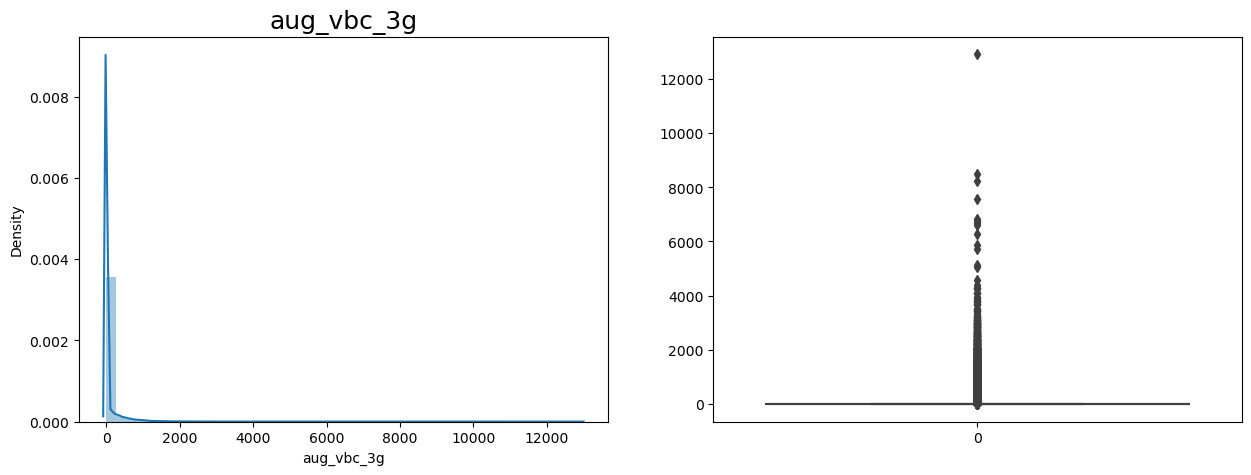

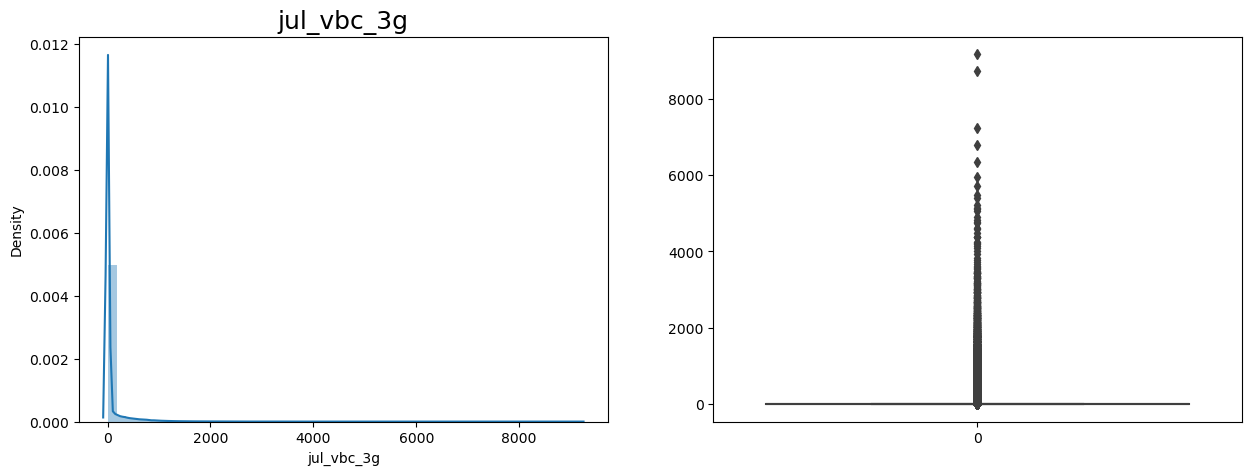

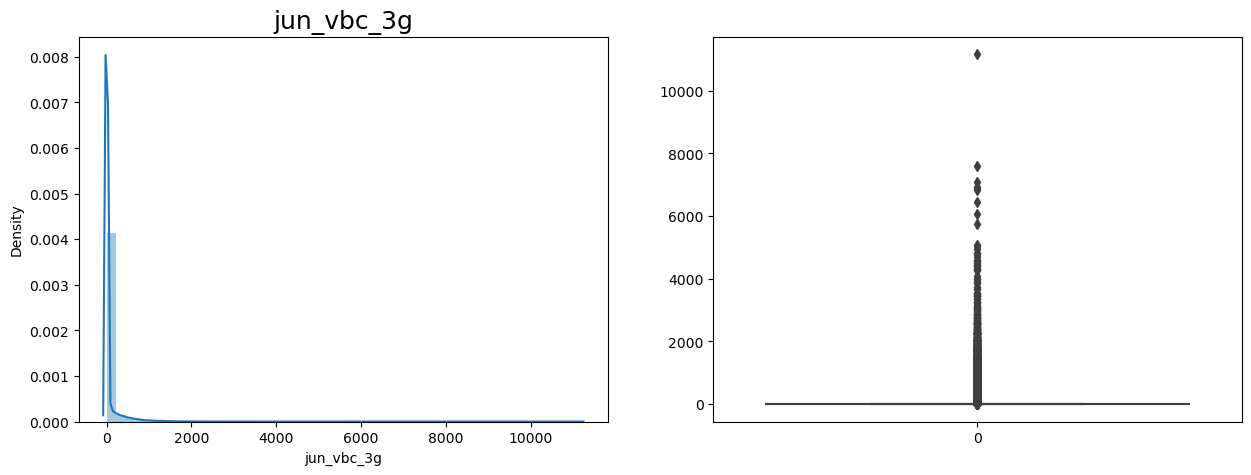

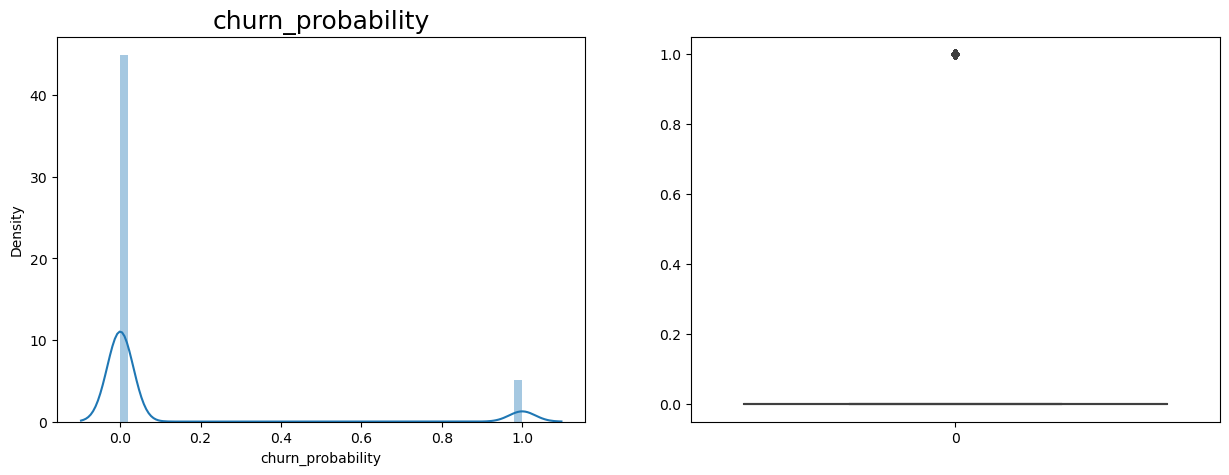

In [400]:
## View the distribution of all numeric variables using histograms and boxplots
 
for col in df_num.columns:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num[col])
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()

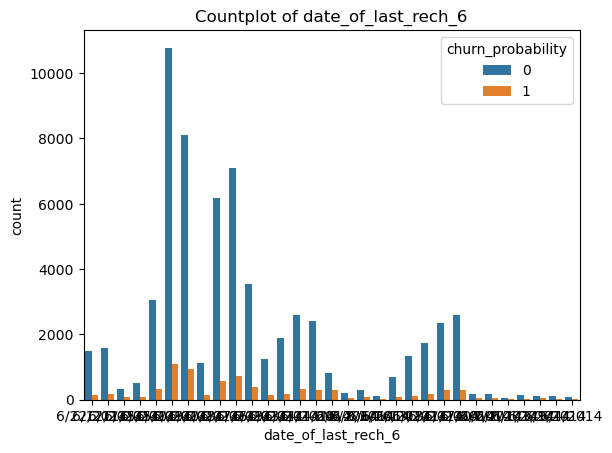

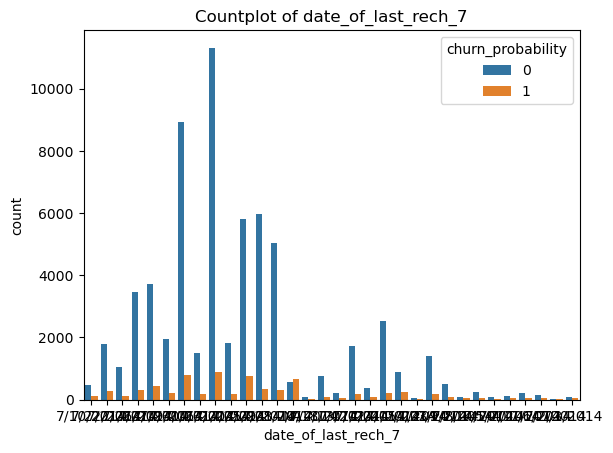

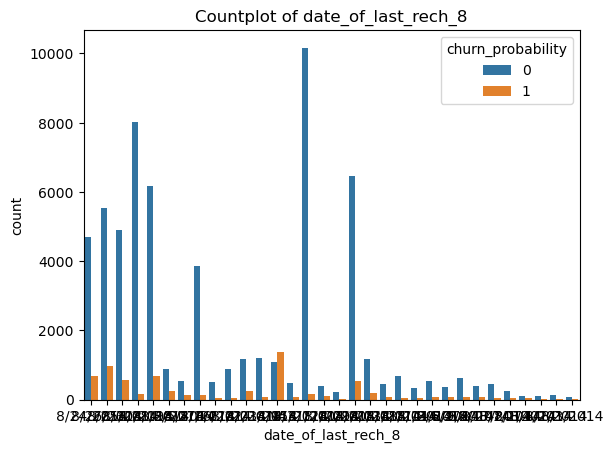

In [401]:
## Extract categorical columns

df_cat = telecomData.select_dtypes(include='object')

df_cat.head()
for column in df_cat.columns:
    sns.countplot(x= column, hue='churn_probability', data=telecomData)
    plt.title(f'Countplot of {column}')
    plt.show()

## Removing the columns which show collinearity

In [402]:
## List of Numerical columns and c columns
num_col = telecomData.select_dtypes(include=['float64', 'int64'])
c_cols= telecomData.select_dtypes(include=['object'])
telecomDataCorr = num_col.corr()
telecomDataCorr.loc[:,:] = np.tril(telecomDataCorr, k=-1)
telecomDataCorr = telecomDataCorr.stack()
telecomDataCorr
telecomDataCorr[(telecomDataCorr > 0.80) | (telecomDataCorr < -0.80)].sort_values(ascending=False)

total_rech_amt_8  arpu_8              0.958333
total_rech_amt_7  arpu_7              0.955298
total_rech_amt_6  arpu_6              0.952776
isd_og_mou_8      isd_og_mou_7        0.947006
isd_og_mou_7      isd_og_mou_6        0.934022
isd_og_mou_8      isd_og_mou_6        0.924139
total_ic_mou_6    loc_ic_mou_6        0.904457
total_ic_mou_8    loc_ic_mou_8        0.896980
total_ic_mou_7    loc_ic_mou_7        0.892899
std_og_t2t_mou_8  onnet_mou_8         0.863429
std_og_t2t_mou_7  onnet_mou_7         0.862664
std_ic_mou_7      std_ic_t2m_mou_7    0.859621
total_og_mou_8    std_og_mou_8        0.859475
std_og_t2m_mou_8  offnet_mou_8        0.857885
total_og_mou_7    std_og_mou_7        0.857320
std_og_t2m_mou_7  offnet_mou_7        0.855804
std_og_t2t_mou_6  onnet_mou_6         0.855785
std_ic_mou_8      std_ic_t2m_mou_8    0.855778
std_ic_mou_6      std_ic_t2m_mou_6    0.853522
total_og_mou_6    std_og_mou_6        0.840865
loc_og_mou_8      loc_og_mou_7        0.834978
std_og_t2m_mo

In [403]:
listOfCollinearColumnsToDrop = ['total_rech_amt_8', 'total_rech_amt_7','total_rech_amt_6','isd_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'total_ic_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_7', 'std_ic_mou_7', 'total_og_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_7', 'std_og_t2m_mou_7', 'std_og_t2t_mou_6', 'std_ic_mou_8', 'std_ic_mou_6', 'total_og_mou_6', 'loc_og_mou_8', 'std_og_t2m_mou_6', 'loc_ic_mou_8', 'loc_ic_mou_6', 'total_ic_mou_8', 'loc_ic_mou_8', 'loc_og_mou_6', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_mou_7', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
telecomData.drop(listOfCollinearColumnsToDrop, axis=1, inplace=True)
telecomData.shape

(69999, 97)

In [404]:
for columns in telecomData.columns:
    print("Columns name is %s and object is %s" %(columns, telecomData[columns].dtype))

Columns name is id and object is int64
Columns name is arpu_6 and object is float64
Columns name is arpu_7 and object is float64
Columns name is arpu_8 and object is float64
Columns name is onnet_mou_6 and object is float64
Columns name is onnet_mou_7 and object is float64
Columns name is onnet_mou_8 and object is float64
Columns name is offnet_mou_6 and object is float64
Columns name is offnet_mou_7 and object is float64
Columns name is offnet_mou_8 and object is float64
Columns name is roam_ic_mou_6 and object is float64
Columns name is roam_ic_mou_7 and object is float64
Columns name is roam_ic_mou_8 and object is float64
Columns name is roam_og_mou_6 and object is float64
Columns name is roam_og_mou_7 and object is float64
Columns name is roam_og_mou_8 and object is float64
Columns name is loc_og_t2t_mou_6 and object is float64
Columns name is loc_og_t2t_mou_7 and object is float64
Columns name is loc_og_t2m_mou_6 and object is float64
Columns name is loc_og_t2m_mou_7 and object is

## Starting to create Models

#### Starting with the normal Logistic regression 

In [405]:
df = telecomData[:].copy()

In [406]:
df.shape

(69999, 97)

In [407]:
X = df.drop(['churn_probability'], axis=1)
X.shape
y = df['churn_probability']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (48999, 96)
Dimension of X_test: (21000, 96)


In [409]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [410]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [411]:
X_train.head()

id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
18874  0.269636  0.078960  0.039661  0.032098     0.001560     0.003540   
34295  0.489943  0.081563  0.041594  0.033674     0.009644     0.004850   
42149  0.602146  0.080037  0.042006  0.036197     0.007844     0.008803   
52413  0.748779  0.090809  0.050440  0.045270     0.011120     0.007503   
4537   0.064816  0.076290  0.036771  0.029393     0.001732     0.000056   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  \
18874     0.004442      0.013600      0.023731      0.016116  ...   
34295     0.006339      0.014794      0.031655      0.012334  ...   
42149     0.012911      0.012400      0.032280      0.018072  ...   
52413     0.015351      0.073058      0.100871      0.057312  ...   
4537      0.000153      0.000830      0.004087      0.003360  ...   

       monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
18874           0.0           0.0           0.0          0.0          0.0   
34295           0.0           0.0           0.0          0.0          0.0   
42149           0.0           0.0           0.0          0.0          0.0   
52413           0.0           0.0           0.0          0.0          0.0   
4537            0.0           0.0           0.0          0.0          0.0   

       sachet_3g_8       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
18874          0.0  0.582151         0.0         0.0         0.0  
34295          0.0  0.133269         0.0         0.0         0.0  
42149          0.0  0.280010         0.0         0.0         0.0  
52413          0.0  0.626894         0.0         0.0         0.0  
4537           0.0  0.152273         0.0         0.0         0.0  

[5 rows x 96 columns]

In [412]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (88086, 96)
Dimension of y_train_sm Shape: (88086,)


### Logistic Regression

In [413]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                88086
Model:                            GLM   Df Residuals:                    87989
Model Family:                Binomial   Df Model:                           96
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35335.
Date:                Wed, 03 Apr 2024   Deviance:                       70669.
Time:                        22:38:58   Pearson chi2:                 2.25e+15
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4423
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.3952      0.263    -12.902      0.000      -3.911      -2.879
id                    -0.0220      0.033     -0.669      0.503      -0.086       0.042
arpu_6                46.5147      3.666     12.688      0.000      39.329      53.700
arpu_7                25.5524      3.978      6.424      0.000      17.757      33.348
arpu_8                34.2447      4.381      7.816      0.000      25.657      42.832
onnet_mou_6           65.9156     20.881      3.157      0.002      24.990     106.842
onnet_mou_7          -74.0363     12.372     -5.984      0.000     -98.284     -49.789
onnet_mou_8          -46.4712      2.692    -17.264      0.000     -51.747     -41.195
offnet_mou_6          73.8141     23.664      3.119      0.002      27.434     120.195
offnet_mou_7         -64.3055     10.857     -5.923      0.000     -85.585     -43.026
offnet_mou_8         -60.1117      3.417    -17.593      0.000     -66.808     -53.415
roam_ic_mou_6          1.1728      0.740      1.584      0.113      -0.278       2.624
roam_ic_mou_7          3.0046      1.303      2.306      0.021       0.450       5.559
roam_ic_mou_8         -0.1523      0.843     -0.181      0.857      -1.804       1.499
roam_og_mou_6        -35.5729     10.716     -3.320      0.001     -56.576     -14.570
roam_og_mou_7         24.9867      4.307      5.802      0.000      16.546      33.427
roam_og_mou_8         41.7631      1.804     23.152      0.000      38.228      45.299
loc_og_t2t_mou_6     -59.3559     18.225     -3.257      0.001     -95.076     -23.635
loc_og_t2t_mou_7      72.4501     11.457      6.324      0.000      49.995      94.905
loc_og_t2m_mou_6     -46.0125     13.326     -3.453      0.001     -72.132     -19.893
loc_og_t2m_mou_7      43.0065      7.002      6.142      0.000      29.282      56.731
loc_og_t2f_mou_6      -7.1015      2.221     -3.198      0.001     -11.454      -2.749
loc_og_t2f_mou_7       4.3729      2.366      1.848      0.065      -0.265       9.011
loc_og_t2f_mou_8      -0.0148      1.663     -0.009      0.993      -3.275       3.245
loc_og_t2c_mou_6      -3.6093      1.026     -3.519      0.000      -5.620      -1.599
loc_og_t2c_mou_7       5.7601      2.328      2.474      0.013       1.197      10.323
loc_og_t2c_mou_8       2.3892      1.245      1.920      0.055      -0.050       4.828
std_og_t2f_mou_6      -0.0662      1.484     -0.045      0.964      -2.974       2.842
std_og_t2f_mou_7      -0.0174      1.364     -0.013      0.990      -2.690       2.655
std_og_t2f_mou_8      -8.2683      1.581     -5.229      0.000     -11.368      -5.169
std_og_mou_6         -76.2675     23.874     -3.195      0.001    -123.061     -29.474
std_og_mou_7          76.6025     12.378      6.188      0.000      52.341     100.864
std_og_mou_8          46.0900      3.3

Logistic Regression using the RFE method

In [414]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 30 variables as output
rfe = RFE(logreg, n_features_to_select=30)
rfe = rfe.fit(X_train_sm, y_train_sm)

In [415]:
rfe.support_

array([False,  True,  True, False, False, False,  True, False, False,
        True, False, False,  True, False,  True,  True, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False,  True, False, False,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False])

In [416]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_6', 'spl_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'aug_vbc_3g'],
      dtype='object')


In [417]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('id', False, 67),
 ('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', False, 52),
 ('onnet_mou_6', False, 39),
 ('onnet_mou_7', False, 56),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 55),
 ('offnet_mou_7', False, 49),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 40),
 ('roam_ic_mou_7', False, 53),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 7),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 33),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2m_mou_6', False, 29),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2f_mou_6', False, 51),
 ('loc_og_t2f_mou_7', False, 27),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 15),
 ('loc_og_t2c_mou_7', False, 14),
 ('loc_og_t2c_mou_8', False, 13),
 ('std_og_t2f_mou_6', False, 45),
 ('std_og_t2f_mou_7', False, 38),
 ('std_og_t2f_mou_8', True, 1),
 ('std_og_mou_6', True, 1),
 ('std_og_mou_7', False, 3),
 ('std_og_mou_8', False, 4),
 ('isd_og_mou_6', False, 43),
 ('spl_og_

In [418]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                88086
Model:                            GLM   Df Residuals:                    88055
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36583.
Date:                Wed, 03 Apr 2024   Deviance:                       73167.
Time:                        22:40:03   Pearson chi2:                 3.23e+14
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4263
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9626      0.147     -6.562      0.000      -1.250      -0.675
arpu_6                22.6300      1.835     12.334      0.000      19.034      26.226
arpu_7                21.7895      2.413      9.030      0.000      17.060      26.519
onnet_mou_8           -8.7000      0.702    -12.388      0.000     -10.076      -7.324
offnet_mou_8         -10.5937      0.964    -10.990      0.000     -12.483      -8.704
roam_ic_mou_8          2.5442      0.658      3.869      0.000       1.255       3.833
roam_og_mou_7         -1.0632      0.654     -1.625      0.104      -2.346       0.219
roam_og_mou_8         26.1193      1.207     21.647      0.000      23.754      28.484
loc_og_t2t_mou_7      -7.2698      1.117     -6.507      0.000      -9.460      -5.080
loc_og_t2m_mou_7      -4.3565      0.691     -6.302      0.000      -5.711      -3.002
loc_og_t2f_mou_8     -10.2611      1.462     -7.017      0.000     -13.127      -7.395
std_og_t2f_mou_8      -9.7627      1.450     -6.733      0.000     -12.604      -6.921
std_og_mou_6           3.3771      0.350      9.655      0.000       2.692       4.063
spl_og_mou_8         -12.5743      1.379     -9.118      0.000     -15.277      -9.871
loc_ic_t2m_mou_8     -56.6259      1.063    -53.265      0.000     -58.709     -54.542
loc_ic_t2f_mou_7       4.9852      1.176      4.239      0.000       2.680       7.290
loc_ic_t2f_mou_8     -50.3009      2.729    -18.433      0.000     -55.649     -44.952
std_ic_t2t_mou_8      -7.7812      1.511     -5.151      0.000     -10.742      -4.820
std_ic_t2m_mou_8     -14.6132      1.758     -8.312      0.000     -18.059     -11.167
std_ic_t2f_mou_8     -79.6467      6.575    -12.113      0.000     -92.534     -66.759
spl_ic_mou_6         -11.4641      1.588     -7.221      0.000     -14.576      -8.352
spl_ic_mou_7         -13.0630      1.386     -9.427      0.000     -15.779     -10.347
spl_ic_mou_8        -111.6759      3.479    -32.103      0.000    -118.494    -104.858
total_rech_num_7       4.4336      0.358     12.386      0.000       3.732       5.135
total_rech_num_8     -15.2876      0.459    -33.292      0.000     -16.188     -14.388
max_rech_amt_8        -5.7062      0.504    -11.322      0.000      -6.694      -4.718
last_day_rch_amt_8   -21.3567      0.689    -30.990      0.000     -22.707     -20.006
vol_2g_mb_8           -9.7413      1.161     -8.394      0.000     -12.016      -7.467
monthly_2g_8          -4.0274      0.254    -15.870      0.000      -4.525      -3.530
sachet_2g_8          -10.9385      0.635    -17.225      0.000     -12.183      -9.694
aug_vbc_3g            -6.9558      0.668    -10.418      0.000      -8.264      -5.647
======================================================================================
"""

In [419]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.07816201, 0.28357238, 0.06374704, 0.00868831, 0.66114866,
       0.82042141, 0.34893905, 0.08099658, 0.58657415, 0.42869732])

In [420]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

Converted  Converted_prob
0          0        0.078162
1          0        0.283572
2          0        0.063747
3          0        0.008688
4          0        0.661149

In [421]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred
0          0        0.078162           0
1          0        0.283572           0
2          0        0.063747           0
3          0        0.008688           0
4          0        0.661149           1

#### Calculating the accuracy with the help of confusion matrix

In [422]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[34677  9366]
 [ 5418 38625]]


In [423]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8321640215244194


In [424]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[34677  9366]
 [ 5418 38625]]


In [425]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [426]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8769838566855119
Specificity =  0.7873441863633267
False Positive Rate =  0.21265581363667324
Precision =  0.8048384072013502
True Negative Prediction Rate =  0.8648709315375982


In [427]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [428]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

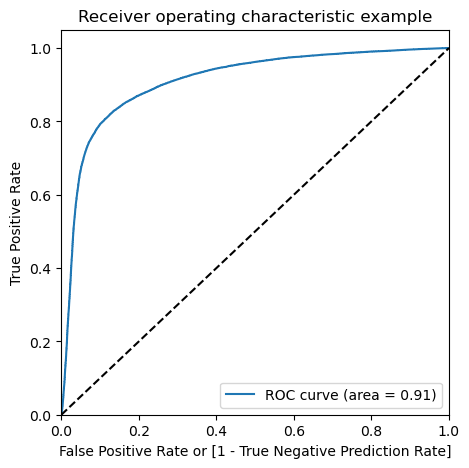

In [429]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [430]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.078162           0    1    0    0    0    0    0    0   
1          0        0.283572           0    1    1    1    0    0    0    0   
2          0        0.063747           0    1    0    0    0    0    0    0   
3          0        0.008688           0    1    0    0    0    0    0    0   
4          0        0.661149           1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [431]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.700440     0.972254     0.428627
0.2          0.2  0.750505     0.954726     0.546284
0.3          0.3  0.786300     0.934178     0.638422
0.4          0.4  0.812445     0.909248     0.715642
0.5          0.5  0.832164     0.876984     0.787344
0.6          0.6  0.845197     0.837840     0.852553
0.7          0.7  0.843426     0.776082     0.910769
0.8          0.8  0.783711     0.608701     0.958722
0.9          0.9  0.544899     0.098222     0.991576


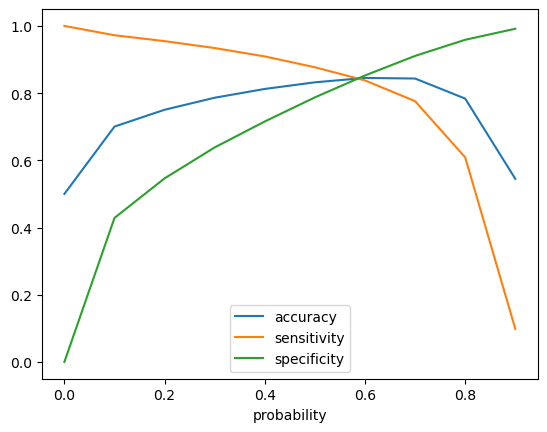

In [432]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [433]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.078162           0    1    0    0    0    0    0    0   
1          0        0.283572           0    1    1    1    0    0    0    0   
2          0        0.063747           0    1    0    0    0    0    0    0   
3          0        0.008688           0    1    0    0    0    0    0    0   
4          0        0.661149           1    1    1    1    1    1    1    1   

   ...  0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  
0  ...    0     0     0     0     0     0     0     0     0     0  
1  ...    0     0     0     0     0     0     0     0     0     0  
2  ...    0     0     0     0     0     0     0     0     0     0  
3  ...    0     0     0     0     0     0     0     0     0     0  
4  ...    0     1     1     1     1     1     1     1     1     1  

[5 rows x 22 columns]

In [434]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.832164     0.876984     0.787344
0.51         0.51  0.834162     0.873782     0.794542
0.52         0.52  0.835717     0.870490     0.800945
0.53         0.53  0.837534     0.866903     0.808165
0.54         0.54  0.838476     0.862884     0.814068
0.55         0.55  0.839918     0.859297     0.820539
0.56         0.56  0.841291     0.855618     0.826965
0.57         0.57  0.842881     0.851940     0.833821
0.58         0.58  0.843948     0.847422     0.840474
0.59         0.59  0.844425     0.842835     0.846014


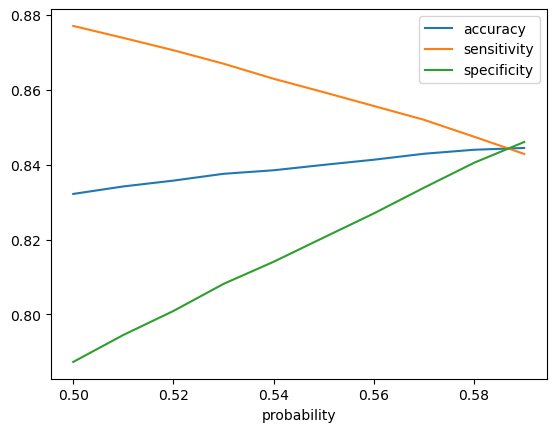

In [435]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [436]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.59 else 0)

y_train_sm_pred_final.head()

Converted  Converted_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.078162           0    1    0    0    0    0    0    0   
1          0        0.283572           0    1    1    1    0    0    0    0   
2          0        0.063747           0    1    0    0    0    0    0    0   
3          0        0.008688           0    1    0    0    0    0    0    0   
4          0        0.661149           1    1    1    1    1    1    1    1   

   ...  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  final_churn_pred  
0  ...     0     0     0     0     0     0     0     0     0                 0  
1  ...     0     0     0     0     0     0     0     0     0                 0  
2  ...     0     0     0     0     0     0     0     0     0                 0  
3  ...     0     0     0     0     0     0     0     0     0                 0  
4  ...     1     1     1     1     1     1     1     1     1                 1  

[5 rows x 23 columns]

In [437]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[37261  6782]
 [ 6922 37121]]


In [438]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.842835410848489
Specificity =  0.8460141225620417
False Positive Rate =  0.15398587743795836
Precision =  0.845523084982803
True Negative Prediction Rate =  0.8433334087771315


In [439]:
from sklearn.metrics import precision_recall_curve

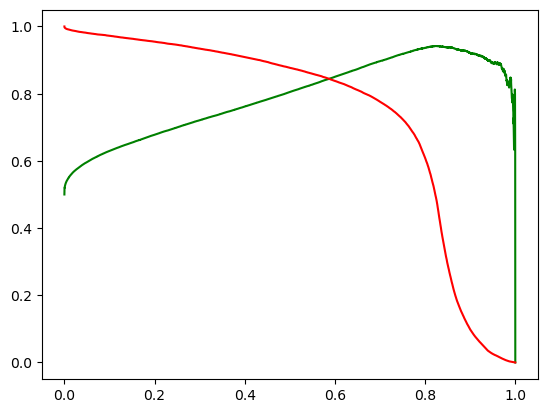

In [440]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [441]:
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
59030  0.843310  0.099547  0.056187  0.035738     0.015083     0.010142   
38151  0.545030  0.088657  0.040934  0.027703     0.022048     0.009834   
69572  0.993914  0.085908  0.045771  0.037762     0.006287     0.004317   
62590  0.894168  0.079889  0.035397  0.027423     0.003309     0.000000   
57208  0.817280  0.080656  0.039762  0.033370     0.011852     0.026127   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  \
59030     0.000086      0.037793      0.037114      0.000791  ...   
38151     0.000091      0.065838      0.037476      0.000814  ...   
69572     0.003287      0.014874      0.012490      0.012478  ...   
62590     0.000000      0.000808      0.000000      0.000000  ...   
57208     0.036293      0.009768      0.011995      0.005012  ...   

       monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
59030           0.0        0.0625           0.0          0.0     0.193548   
38151           0.0        0.0000           0.0          0.0     0.000000   
69572           0.0        0.0000           0.0          0.0     0.000000   
62590           0.0        0.0000           0.0          0.0     0.000000   
57208           0.0        0.0000           0.0          0.0     0.000000   

       sachet_3g_8       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
59030          0.0  0.110176    0.050447    0.435911     0.16223  
38151          0.0  0.191244    0.000000    0.000000     0.00000  
69572          0.0  0.044744    0.000000    0.000000     0.00000  
62590          0.0  0.008901    0.000000    0.000000     0.00000  
57208          0.0  0.530671    0.000000    0.000000     0.00000  

[5 rows x 96 columns]

In [442]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

arpu_6    arpu_7  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
59030  0.099547  0.056187     0.000086      0.000791       0.005696   
38151  0.088657  0.040934     0.000091      0.000814       0.000252   
69572  0.085908  0.045771     0.003287      0.012478       0.000000   
62590  0.079889  0.035397     0.000000      0.000000       0.000000   
57208  0.080656  0.039762     0.036293      0.005012       0.006324   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_7  loc_og_t2m_mou_7  \
59030       0.000000       0.001405          0.001276          0.005571   
38151       0.000743       0.000184          0.002434          0.002673   
69572       0.000000       0.000000          0.004674          0.018571   
62590       0.000000       0.000000          0.000000          0.000000   
57208       0.000213       0.007570          0.001616          0.005901   

       loc_og_t2f_mou_8  ...  spl_ic_mou_7  spl_ic_mou_8  total_rech_num_7  \
59030          0.001122  ...           0.0           0.0          0.130435   
38151          0.000000  ...           0.0           0.0          0.079710   
69572          0.000867  ...           0.0           0.0          0.282609   
62590          0.000000  ...           0.0           0.0          0.014493   
57208          0.000000  ...           0.0           0.0          0.050725   

       total_rech_num_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  \
59030          0.028986        0.058252             0.02942     0.179409   
38151          0.028986        0.008826             0.00000     0.000000   
69572          0.282609        0.009709             0.00000     0.022971   
62590          0.000000        0.000000             0.00000     0.000000   
57208          0.079710        0.012945             0.00000     0.000000   

       monthly_2g_8  sachet_2g_8  aug_vbc_3g  
59030          0.25     0.000000    0.050447  
38151          0.00     0.000000    0.000000  
69572          0.00     0.090909    0.000000  
62590          0.00     0.000000    0.000000  
57208          0.00     0.000000    0.000000  

[5 rows x 30 columns]

In [443]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [444]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 59030    0.106139
38151    0.878048
69572    0.053224
62590    0.843015
57208    0.469412
31407    0.835960
60248    0.424214
63998    0.253200
11391    0.874805
8644     0.220553
dtype: float64


In [445]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

0
59030  0.106139
38151  0.878048
69572  0.053224
62590  0.843015
57208  0.469412

In [446]:
y_pred=y_pred.rename(columns = {0:"Churn_prob"})


In [447]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn_probability
59030                  1
38151                  1
69572                  0
62590                  1
57208                  1

In [448]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

churn_probability  Churn_prob
59030                  1    0.106139
38151                  1    0.878048
69572                  0    0.053224
62590                  1    0.843015
57208                  1    0.469412

In [449]:
y_pred_final['test_churn_pred'] = y_pred_final.Churn_prob.map(lambda x: 1 if x>0.58 else 0)
y_pred_final.head()

churn_probability  Churn_prob  test_churn_pred
59030                  1    0.106139                0
38151                  1    0.878048                1
69572                  0    0.053224                0
62590                  1    0.843015                1
57208                  1    0.469412                0

In [450]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred)

0.8411904761904762

In [451]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[15881  2943]
 [  392  1784]]


In [452]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [453]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8198529411764706
Specificity =  0.8436570335741607
False Positive Rate =  0.15634296642583936
Precision =  0.37740638883012484
True Negative Prediction Rate =  0.9759110182510907


In [454]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  84.0 %
The sensitivity of the predicted model is:  82.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



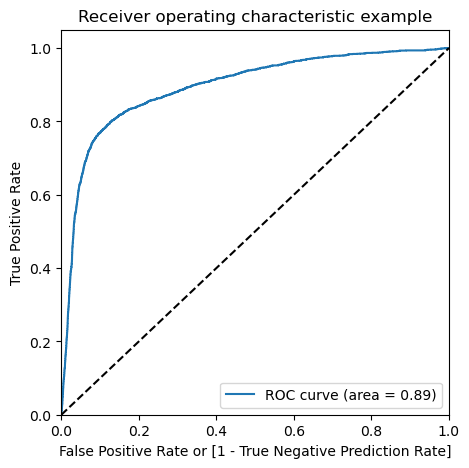

In [455]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn_probability,y_pred_final.Churn_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_probability,y_pred_final.Churn_prob)

## Starting the prediction on the REAL data

In [456]:
## Real test data 
X_test = pd.read_csv('test.csv')
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  1.000014        109             0.0             0.0             0.0   
1  1.000029        109             0.0             0.0             0.0   
2  1.000043        109             0.0             0.0             0.0   
3  1.000057        109             0.0             0.0             0.0   
4  1.000071        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014  0.078380   
1            6/30/2014            7/31/2014            8/31/2014  0.089126   
2            6/30/2014            7/31/2014            8/31/2014  0.086314   
3            6/30/2014            7/31/2014            8/31/2014  0.076768   
4            6/30/2014            7/31/2014            8/31/2014  0.085548   

     arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0  0.037190  ...          0.0          0.0          0.0        NaN        NaN   
1  0.049547  ...          0.0          0.0          0.0        NaN        NaN   
2  0.047333  ...          0.0          0.0          0.0        NaN        NaN   
3  0.040101  ...          0.0          0.0          0.0        NaN        NaN   
4  0.046548  ...          0.0          0.0          0.0        NaN        NaN   

   fb_user_8       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  0.363724     0.00000    0.000000    0.000000  
1        NaN  0.566033     0.00000    0.000000    0.000000  
2        NaN  0.023334     0.06201    0.119405    0.021658  
3        NaN  0.255954     0.00000    0.000000    0.000000  
4        NaN  0.067837     0.00000    0.000000    0.000000  

[5 rows x 171 columns]

In [457]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()
X_test.shape

(30000, 30)

In [458]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_SM)

In [459]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

0
0  0.105136
1  0.093213
2  0.671452
3  0.002811
4  0.327156

In [460]:
y_pred=y_pred.rename(columns = {0:"churn_probability"})
y_pred.head()

churn_probability
0           0.105136
1           0.093213
2           0.671452
3           0.002811
4           0.327156

In [461]:
y_pred['test_churn_pred'] = y_pred['churn_probability'].map(lambda x: 1 if x>0.58 else 0)
y_pred.head()
y_pred.shape

(30000, 2)

In [462]:
trialFrame =  pd.read_csv('test.csv')
trialFrame.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

In [463]:
trialFrame['churn_probability'] = y_pred['test_churn_pred']
output = trialFrame[['id', 'churn_probability']]
output.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [464]:
output.to_csv('KanikaGupta_KedarKawadkar_1.csv',index=False)

### Displaying the most important columns based on coeffiecients

In [465]:
## Most important columns 
lr_summary_html = res.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



spl_ic_mou_8         -111.6759
std_ic_t2f_mou_8      -79.6467
loc_ic_t2m_mou_8      -56.6259
loc_ic_t2f_mou_8      -50.3009
roam_og_mou_8          26.1193
arpu_6                 22.6300
arpu_7                 21.7895
last_day_rch_amt_8    -21.3567
total_rech_num_8      -15.2876
std_ic_t2m_mou_8      -14.6132
spl_ic_mou_7          -13.0630
spl_og_mou_8          -12.5743
spl_ic_mou_6          -11.4641
sachet_2g_8           -10.9385
offnet_mou_8          -10.5937
loc_og_t2f_mou_8      -10.2611
std_og_t2f_mou_8       -9.7627
vol_2g_mb_8            -9.7413
onnet_mou_8            -8.7000
std_ic_t2t_mou_8       -7.7812
loc_og_t2t_mou_7       -7.2698
aug_vbc_3g             -6.9558
max_rech_amt_8         -5.7062
loc_ic_t2f_mou_7        4.9852
total_rech_num_7        4.4336
loc_og_t2m_mou_7       -4.3565
monthly_2g_8           -4.0274
std_og_mou_6            3.3771
roam_ic_mou_8           2.5442
roam_og_mou_7          -1.0632
const                  -0.9626
Name: coef, dtype: float64

# Starting to create the model with PCA

In [466]:
from sklearn.decomposition import PCA 

####

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.fit_transform(X_test[num_col])
####



pca = PCA(random_state = 42) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

Dimension of X_train: (48999, 96)
Dimension of X_test: (21000, 96)


array([[-9.99991220e-01, -1.95779227e-05, -8.05887419e-05, ...,
        -8.37563380e-04, -4.02601938e-04, -1.23032629e-04],
       [ 2.04904880e-04,  1.29122882e-03,  1.04506852e-03, ...,
         2.06710019e-03,  3.08057646e-03,  9.47255286e-04],
       [-2.08537850e-03,  2.02656943e-02,  1.81385848e-02, ...,
         1.24343930e-01,  1.65489410e-01,  8.16210984e-02],
       ...,
       [ 6.85785217e-06,  2.08948859e-02,  3.93550599e-02, ...,
         4.77955168e-04, -3.20380155e-04, -1.07658495e-04],
       [ 3.33706988e-06, -3.54248295e-02,  4.88782709e-02, ...,
        -2.55210593e-04,  2.41015127e-04,  7.82116520e-06],
       [-1.23047257e-06,  1.67033405e-06, -8.27285400e-03, ...,
         8.83239904e-05, -1.55277495e-05,  1.52131453e-04]])

In [467]:
pca.explained_variance_ratio_

array([3.95982776e-01, 2.53003288e-01, 5.19871727e-02, 4.91625907e-02,
       2.59437269e-02, 2.32740992e-02, 1.90850316e-02, 1.37107512e-02,
       1.27977176e-02, 1.16084372e-02, 9.80933644e-03, 9.33084457e-03,
       8.06737164e-03, 7.36879833e-03, 6.00215635e-03, 5.42910449e-03,
       5.06827963e-03, 4.29153759e-03, 4.19460230e-03, 4.10613319e-03,
       4.04870090e-03, 3.94423036e-03, 3.58463014e-03, 3.35953993e-03,
       3.16328331e-03, 3.12523305e-03, 3.04687557e-03, 2.89394525e-03,
       2.75328240e-03, 2.38780793e-03, 2.35075340e-03, 2.03571682e-03,
       1.97396148e-03, 1.92936820e-03, 1.84460735e-03, 1.82834628e-03,
       1.80135676e-03, 1.74850628e-03, 1.64172365e-03, 1.48208512e-03,
       1.44004956e-03, 1.38175788e-03, 1.28532789e-03, 1.26459437e-03,
       1.23716389e-03, 1.07432685e-03, 9.99566565e-04, 9.62394707e-04,
       9.55156776e-04, 9.05718459e-04, 8.94416396e-04, 8.82024820e-04,
       8.15981042e-04, 8.05906338e-04, 8.00912451e-04, 7.69348028e-04,
      

## Scree Plot

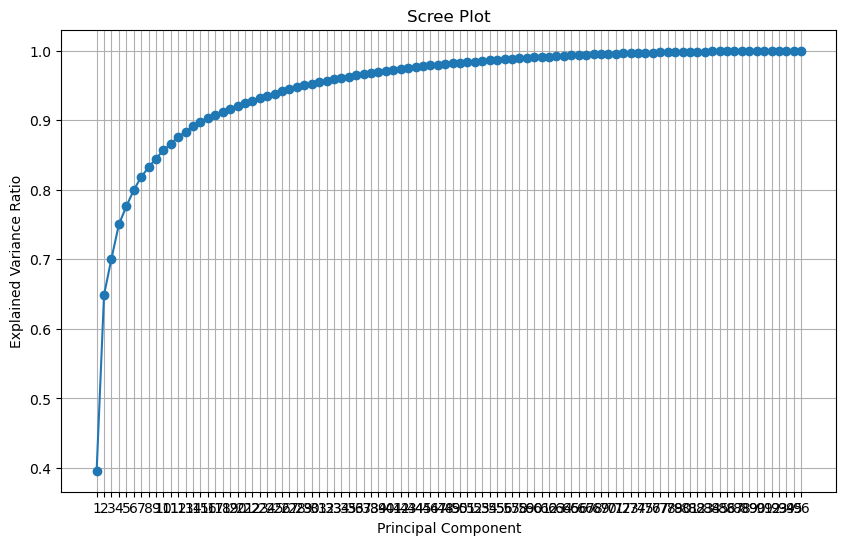

In [468]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(var_cum) + 1), var_cum, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(var_cum) + 1))
plt.grid(True)
plt.show()


In [469]:
# Perform PCA using the first 45 components
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
18874  0.232209  0.334696 -0.041761 -0.026994  0.011798  0.001005 -0.014494   
34295  0.011703 -0.113495 -0.028357 -0.022218  0.037838  0.006665 -0.024936   
42149 -0.100403  0.032296 -0.034457 -0.025620  0.027751 -0.022739 -0.010733   
52413 -0.246700  0.378613 -0.034150  0.101389  0.032654  0.006414 -0.043193   
4537   0.436878 -0.098521 -0.042562 -0.083856 -0.001788 -0.023590  0.001090   

           PC_8      PC_9     PC_10  ...     PC_37     PC_38     PC_39  \
18874 -0.002917 -0.009576 -0.000861  ...  0.001353 -0.002499  0.001045   
34295 -0.003226 -0.005680  0.004584  ...  0.011030  0.006909  0.007601   
42149 -0.006758 -0.006406  0.009149  ...  0.002507  0.001151  0.000447   
52413 -0.009253 -0.070487 -0.003763  ...  0.010417 -0.020134 -0.004253   
4537  -0.002544 -0.005612 -0.003407  ... -0.004984 -0.000904  0.001661   

          PC_40     PC_41     PC_42     PC_43     PC_44     PC_45  \
18874  0.001214  0.002276 -0.001035 -0.000643 -0.000336 -0.003746   
34295  0.000116  0.010064 -0.003516 -0.000163 -0.002712 -0.012675   
42149  0.001365  0.004378  0.001881  0.000780  0.001288 -0.004363   
52413  0.000057  0.015389  0.004235 -0.002744 -0.004183  0.002932   
4537  -0.000497  0.008503  0.015699  0.000476 -0.004712  0.003936   

       churn_probability  
18874                  0  
34295                  0  
42149                  0  
52413                  0  
4537                   0  

[5 rows x 46 columns]

## Combining the PCA with Logistic regression

In [470]:
# X,y Split
y_train_pca = data_train_pca.pop('churn_probability')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
#X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [471]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]


array([0, 0, 0, 0, 1])

In [472]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([1, 1, 0, 1, 0])

In [473]:
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.761
Sensitivity / True Positive Rate / Recall : 0.835
Specificity / True Negative Rate :  0.753
Precision / Positive Predictive Value : 0.275
F1-score : 0.414

Test Performance :

Accuracy : 0.765
Sensitivity / True Positive Rate / Recall : 0.83
Specificity / True Negative Rate :  0.758
Precision / Positive Predictive Value : 0.284
F1-score : 0.423


In [474]:
# Creating a Logistic regression model using pca transformed train set
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [475]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


/Users/kkawadkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kkawadkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kkawadkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kkawadkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/kkawa

/Users/kkawadkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kkawadkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [476]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)

Best ROC-AUC score : 0.876879629817467
Best Parameters : {'C': 1, 'penalty': 'none'}


In [477]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([0, 0, 0, 0, 1])

In [478]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([1, 1, 0, 1, 0])

In [479]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.769
Sensitivity / True Positive Rate / Recall : 0.846
Specificity / True Negative Rate :  0.76
Precision / Positive Predictive Value : 0.284
F1-score : 0.425

Test Performance :

Accuracy : 0.756
Sensitivity / True Positive Rate / Recall : 0.844
Specificity / True Negative Rate :  0.746
Precision / Positive Predictive Value : 0.277
F1-score : 0.417


## Predicting on the unseen data

In [480]:
X_unseen = pd.read_csv('test.csv')
X_unseen_new = X_unseen[num_col]
X_unseen_new.shape

(30000, 96)

In [481]:
## Displaying the columns with the missing data
round(100*(X_unseen_new.isnull().sum()/len(X_unseen_new.index)), 2)
notFilled_numerical_columns = X_unseen_new.select_dtypes(include=['float']).columns
X_unseen_new[notFilled_numerical_columns] = X_unseen_new[notFilled_numerical_columns].fillna(0)
X_unseen_pca = pca_final.transform(X_unseen_new)


In [482]:
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_unseen_pca)
y_test_pred_lr_pca_best

array([0, 0, 1, ..., 0, 1, 0])

In [483]:
y_pred = pd.DataFrame(y_test_pred_lr_pca_best)
y_pred.head()

0
0  0
1  0
2  1
3  0
4  0

In [484]:
y_pred=y_pred.rename(columns = {0:"churn_probability"})
y_pred.head()

churn_probability
0                  0
1                  0
2                  1
3                  0
4                  0

In [485]:
trialFrame =  pd.read_csv('test.csv')
trialFrame['churn_probability'] = y_pred['churn_probability']
output = trialFrame[['id', 'churn_probability']]
output.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [486]:
output.to_csv('KanikaGupta_KedarKawadkar_2.csv',index=False)

## Analysis for the Churn 

Based on the indicators below is the analysis for Churn:

1) Concentrate on users with minutes of usage  decreasing for Special calls / STD / Local calls . They are most likely to churn.
2) Users with higher outgoing Roaming usage are less like to churn.
3) A higher Average revenue per user indicates that user is less likely to churn.
4) Concentrate on users who recharge less number of times ( less than 15 std deviations compared to avg) in the 8th month. They are most likely to churn. 
